3.1

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('new_customers.csv')
data = data.drop(['CustomerID'], axis=1)

label_encoder = LabelEncoder()
data['Genre'] = label_encoder.fit_transform(data['Genre'])

data = data.to_numpy()
print(data.shape)

def preprocess(data):
    minimum = np.min(data, axis=0)
    maximum = np.max(data, axis=0)
    return (data - minimum) / (maximum - minimum)

data = preprocess(data) 

(200, 4)


HC Class

In [26]:
class HC:
    def __init__(self, data):
        self.labels = None
        self.linkage_matrix = None
        self.data = data

    def linkages(self, method, metric):
        self.linkage_matrix = linkage(self.data, method=method, metric=metric)

    def dendrogram(self, method):
        fig = plt.figure(figsize=(50, 30))
        dendrogram(self.linkage_matrix)
        
        plt.title(method + ' linkage')
        plt.show()

    def fit(self, method, metric):
        self.linkages(method, metric)
        self.dendrogram(method)

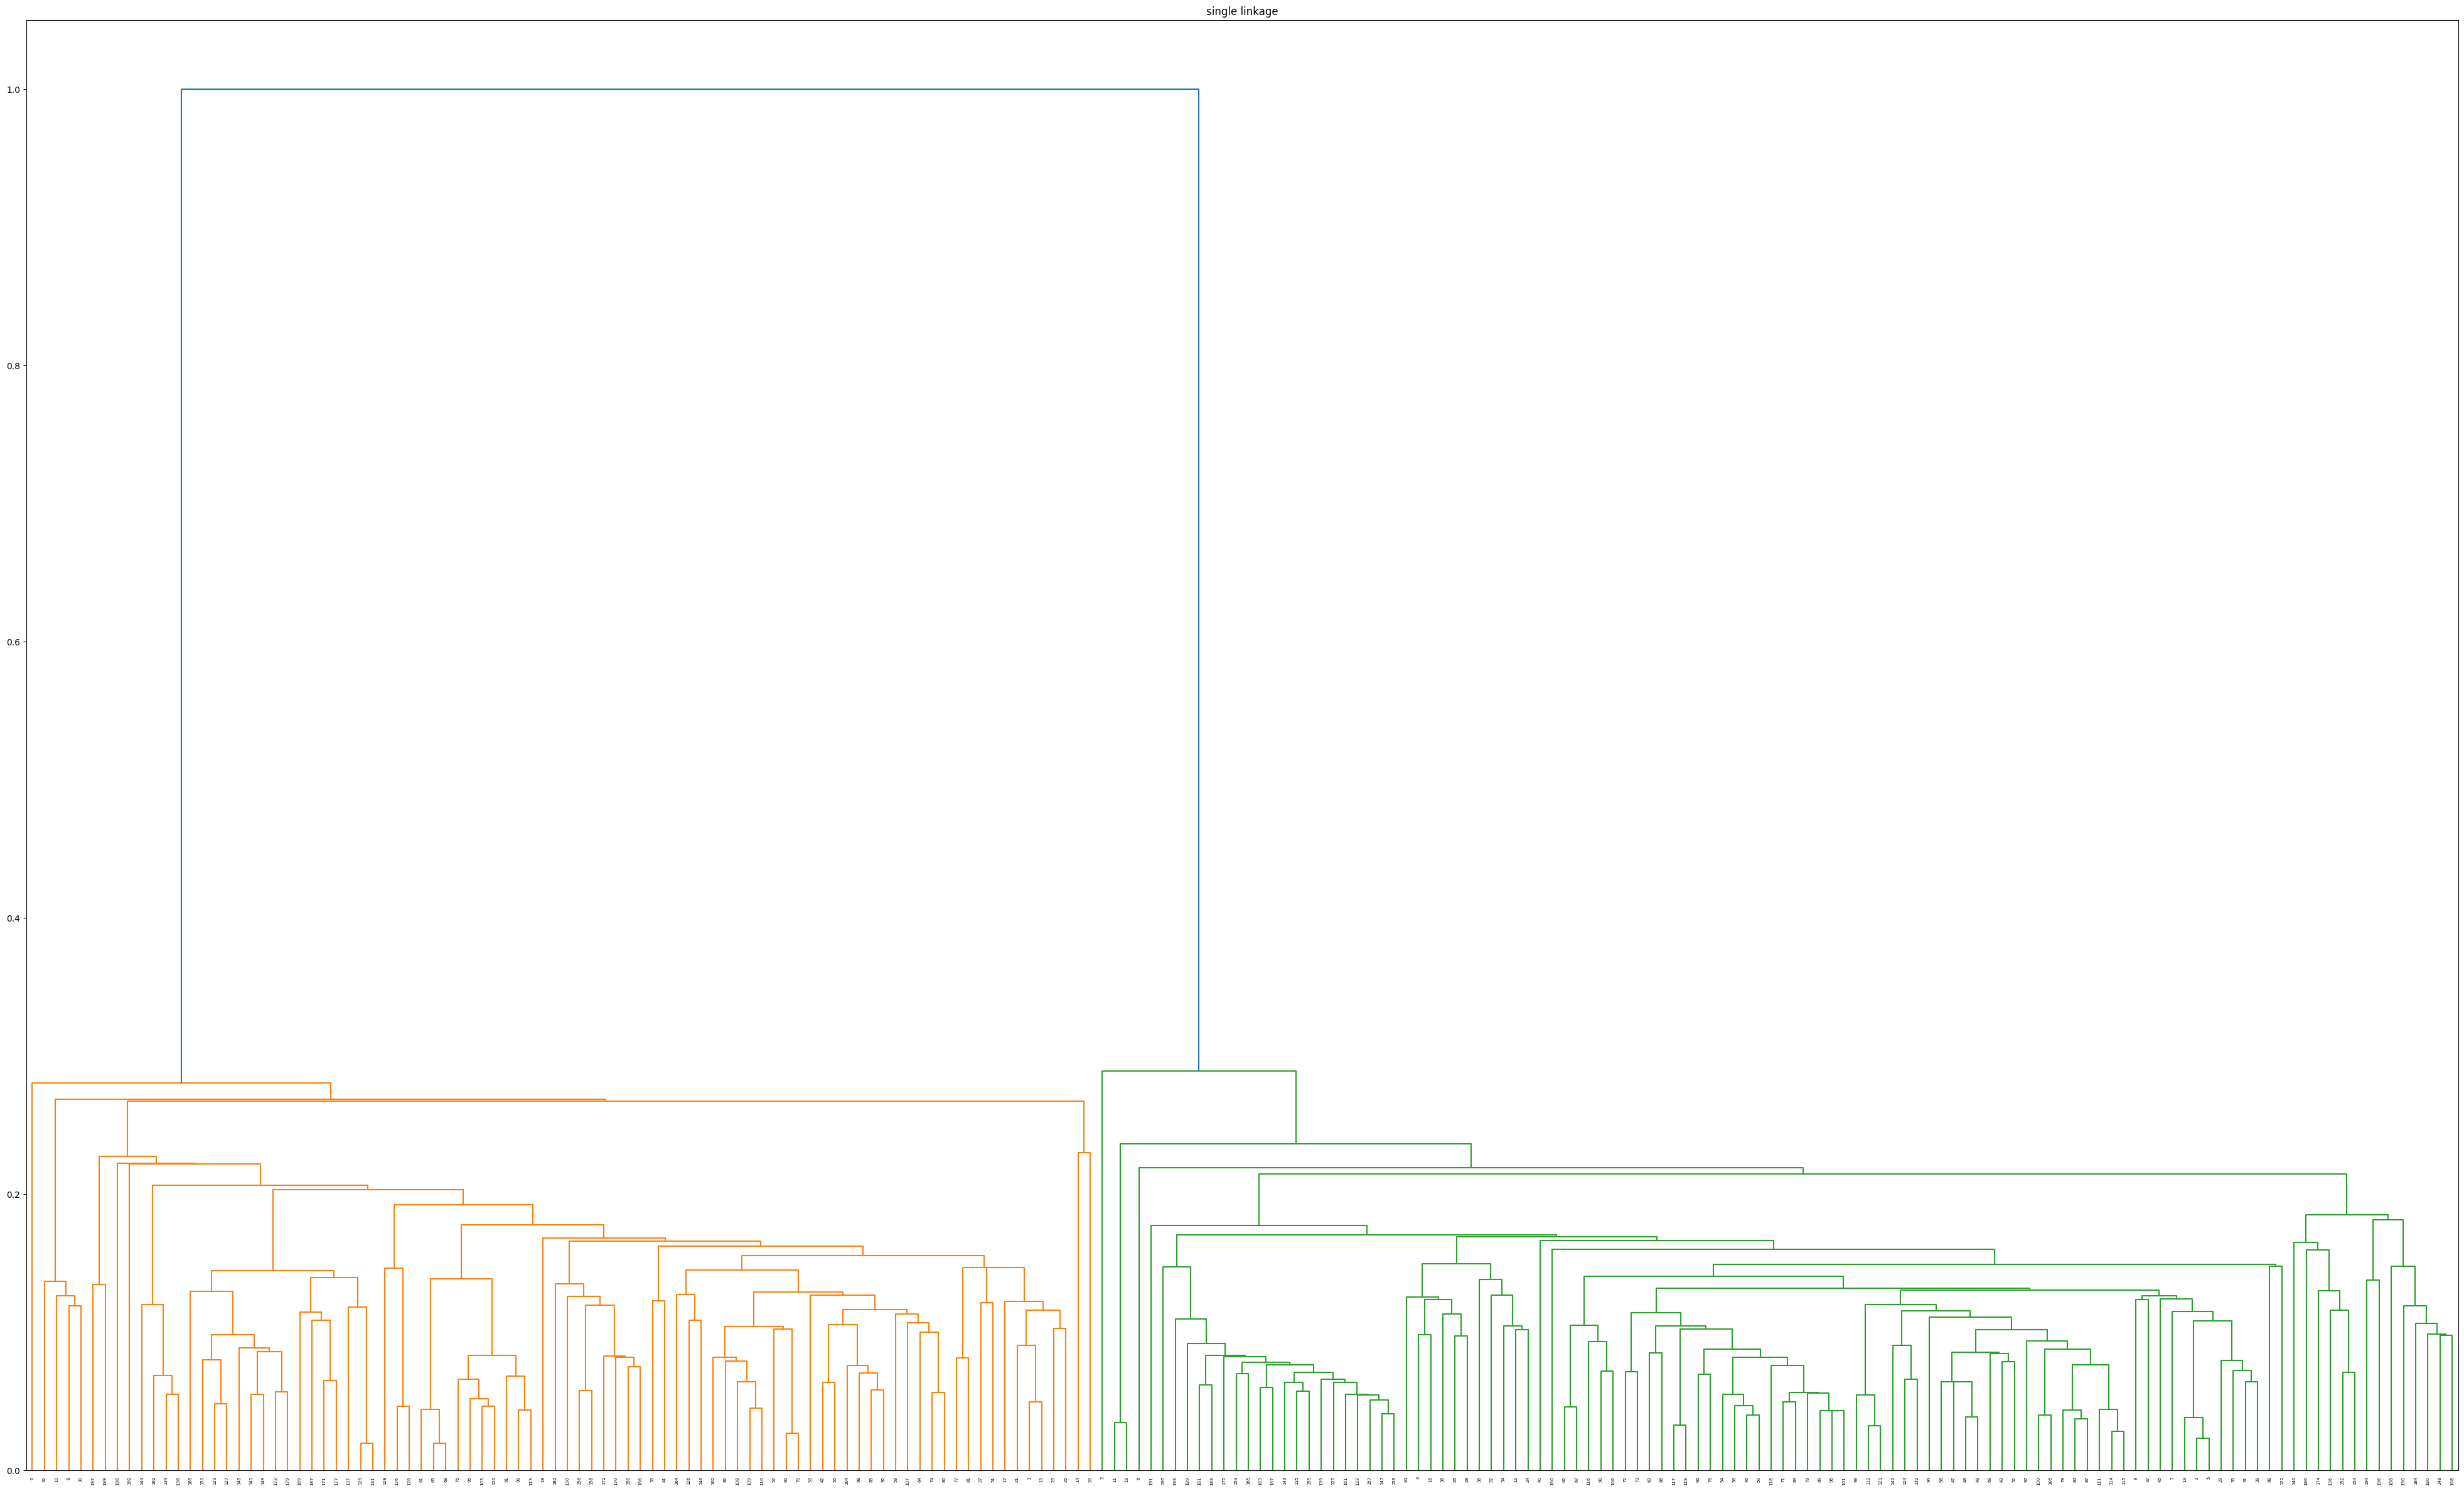

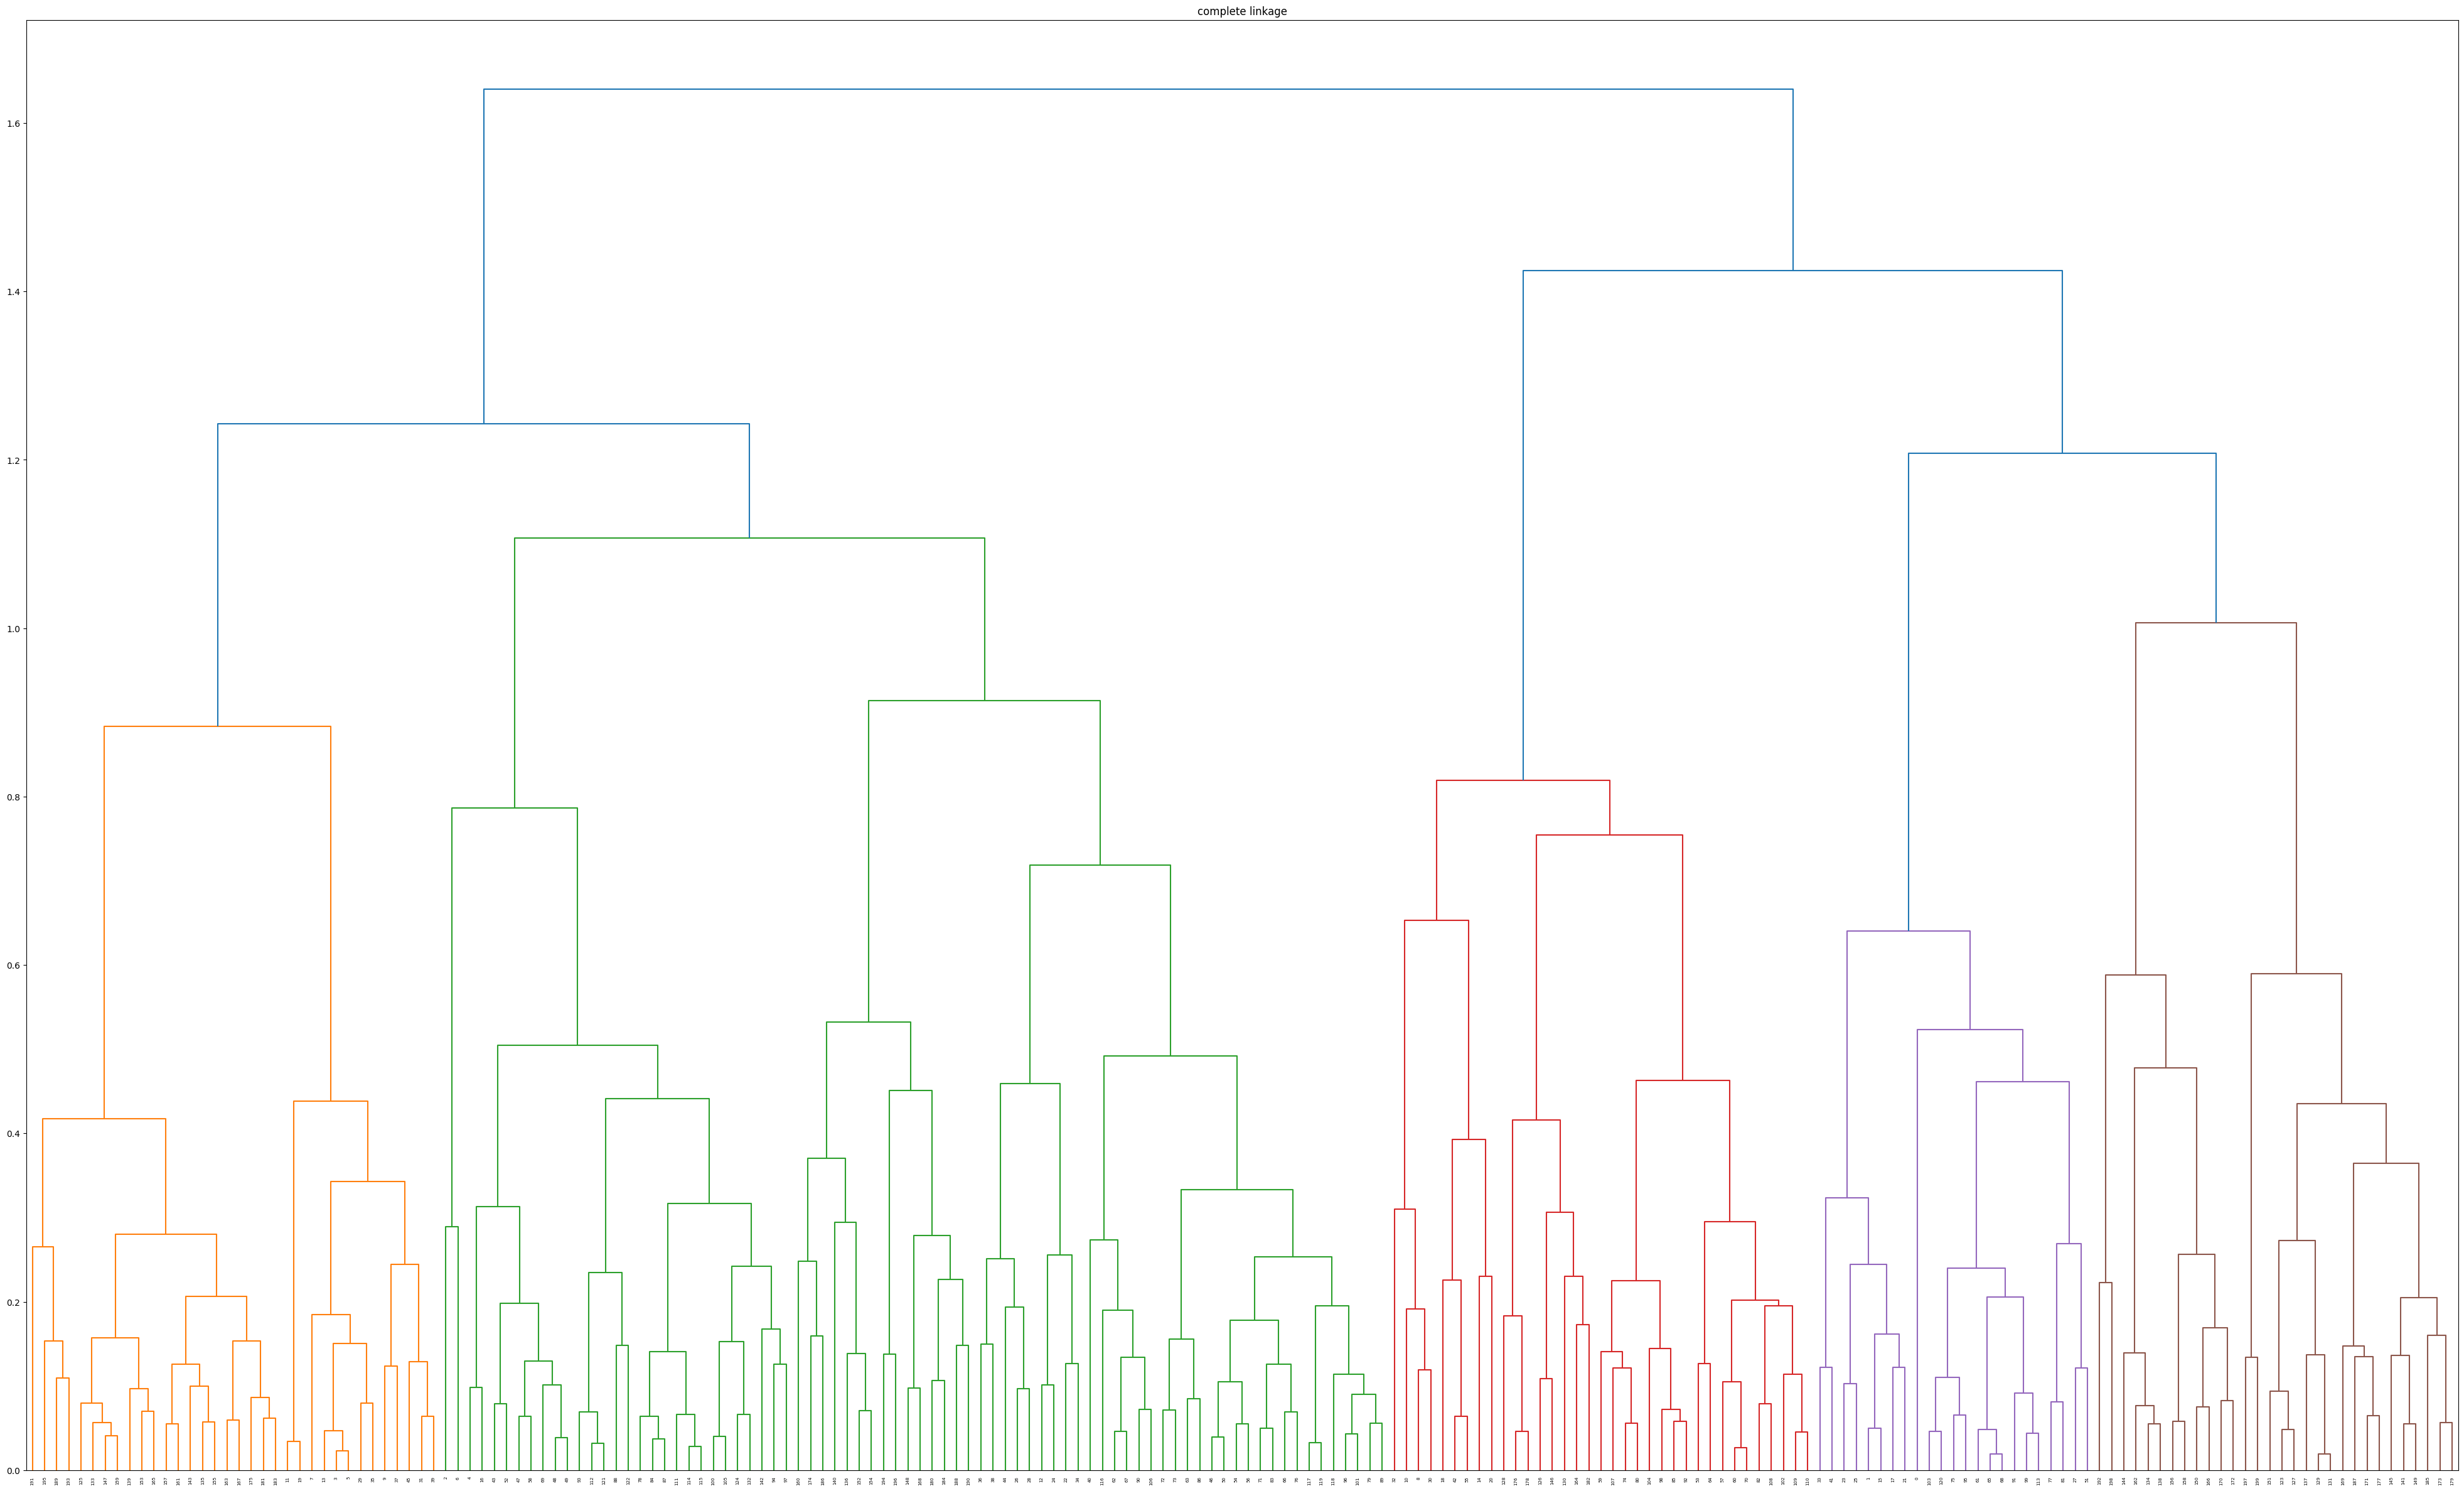

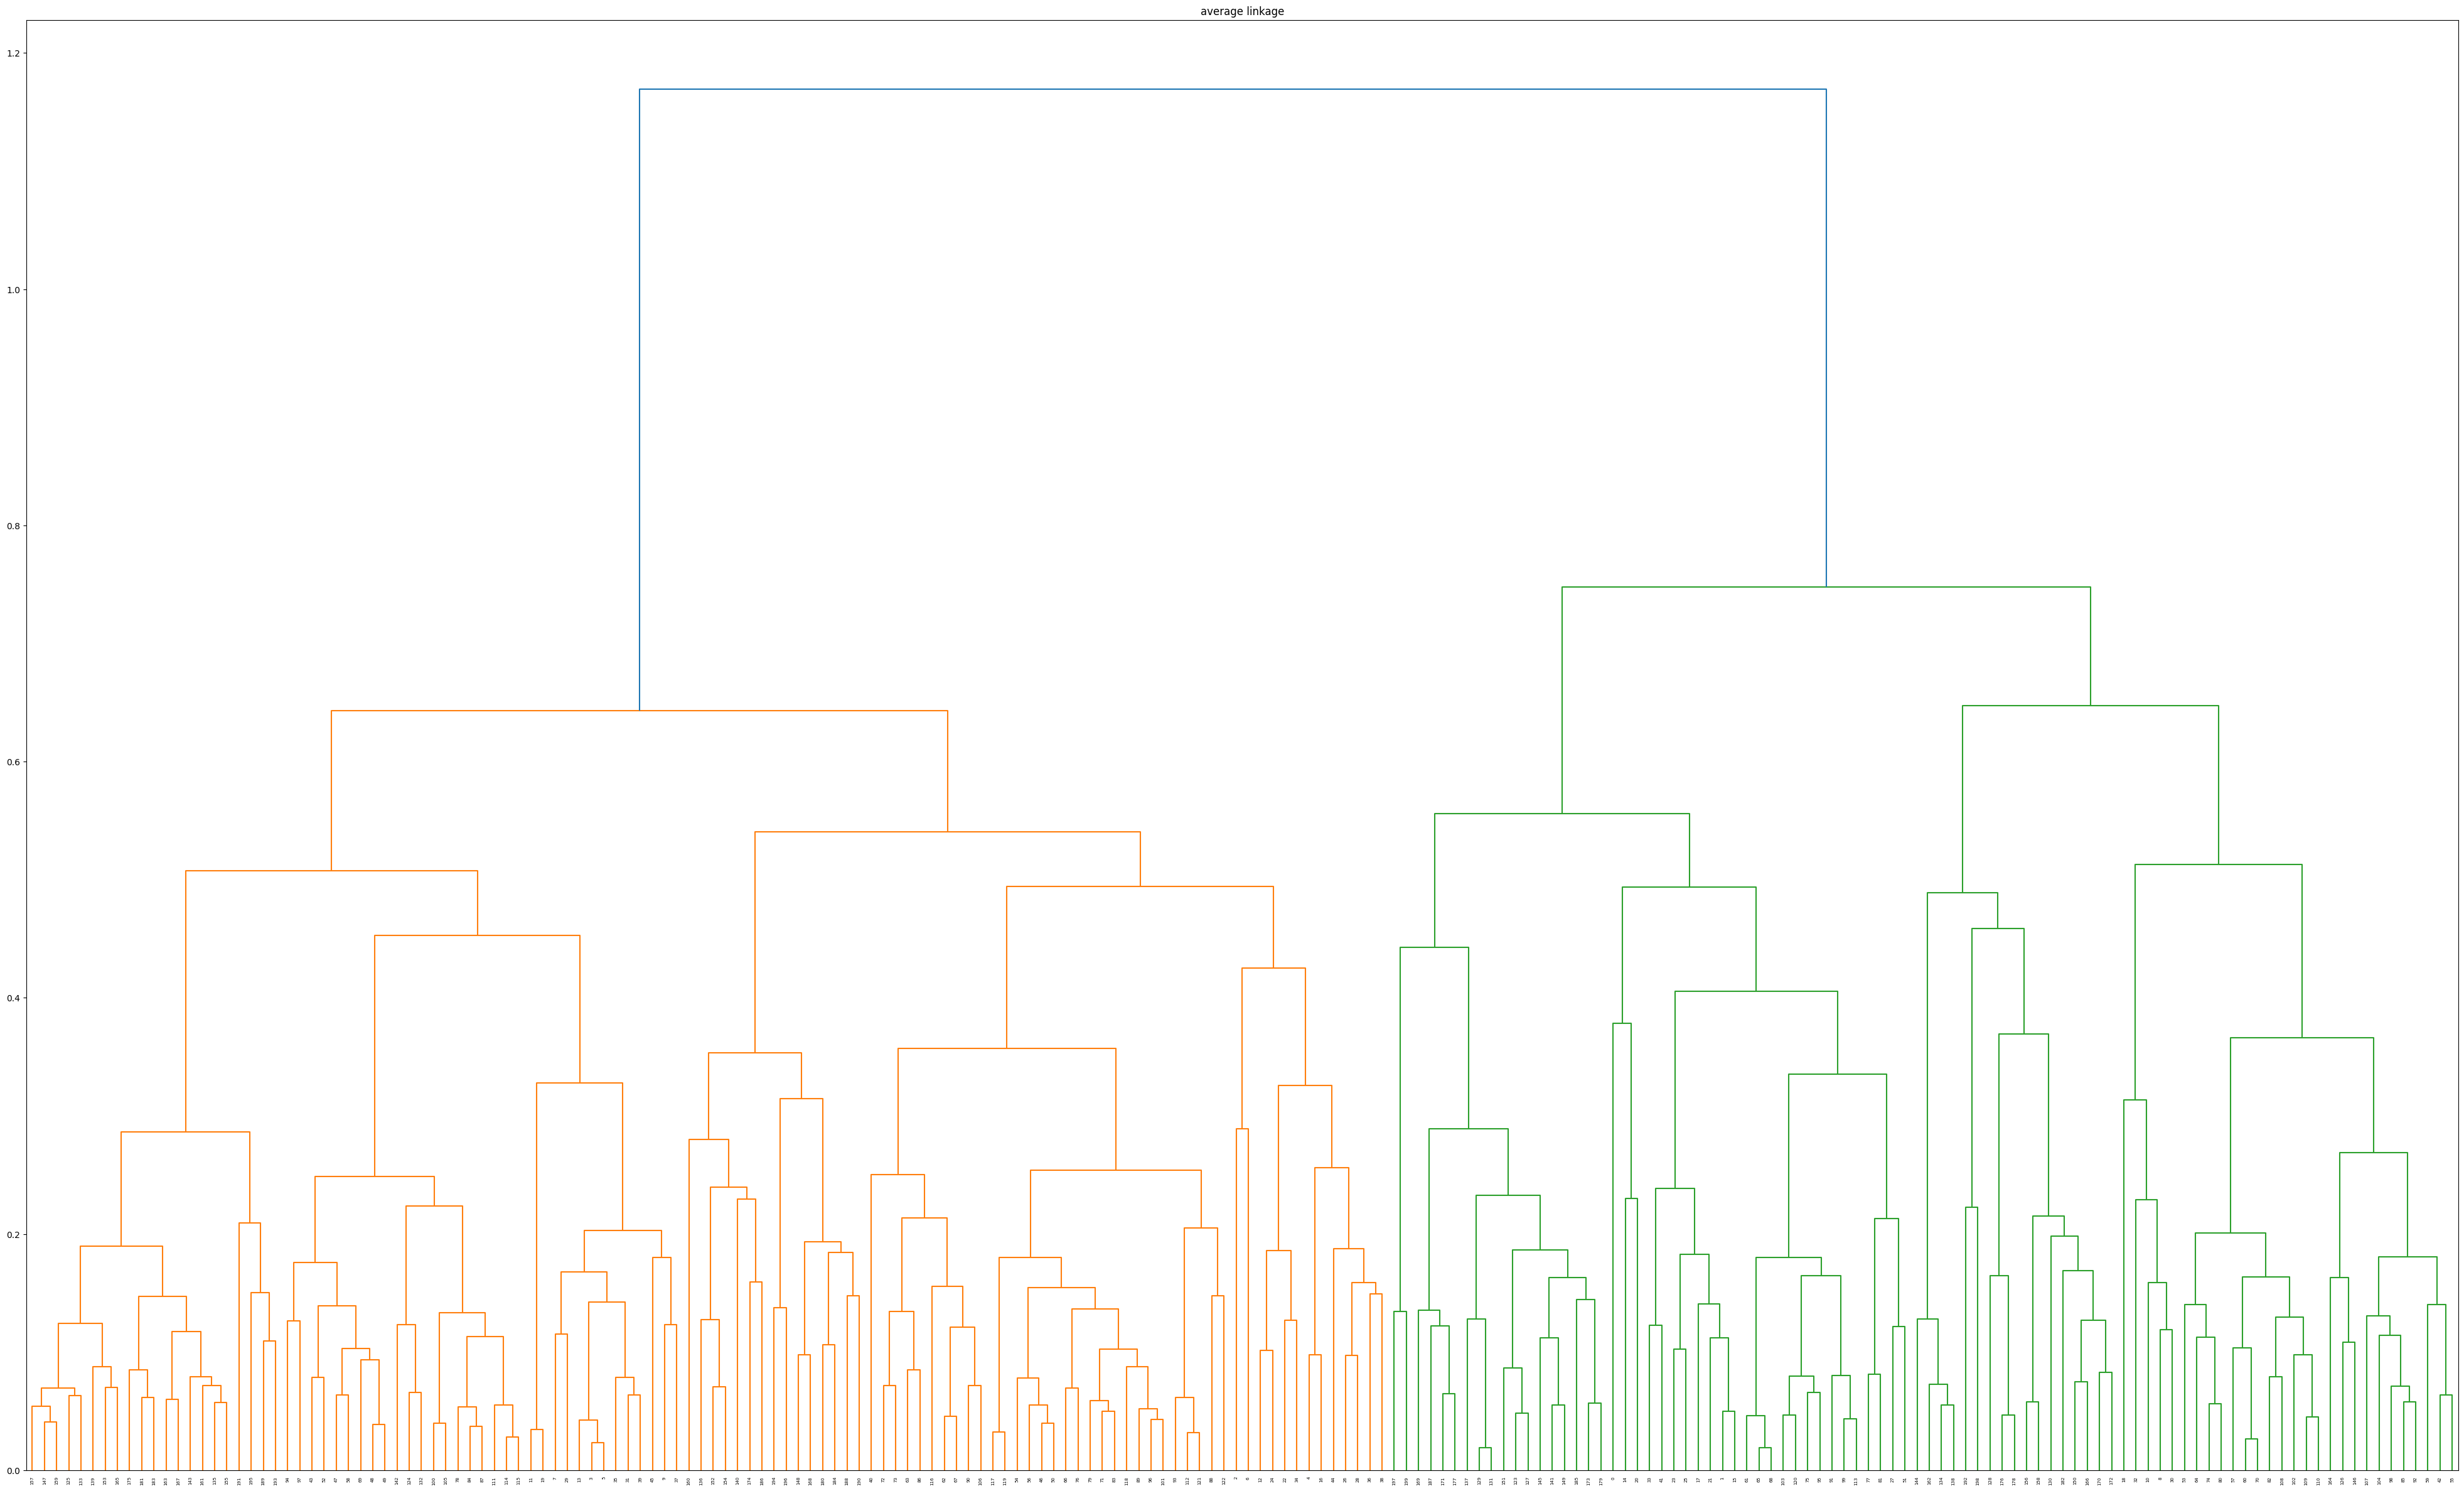

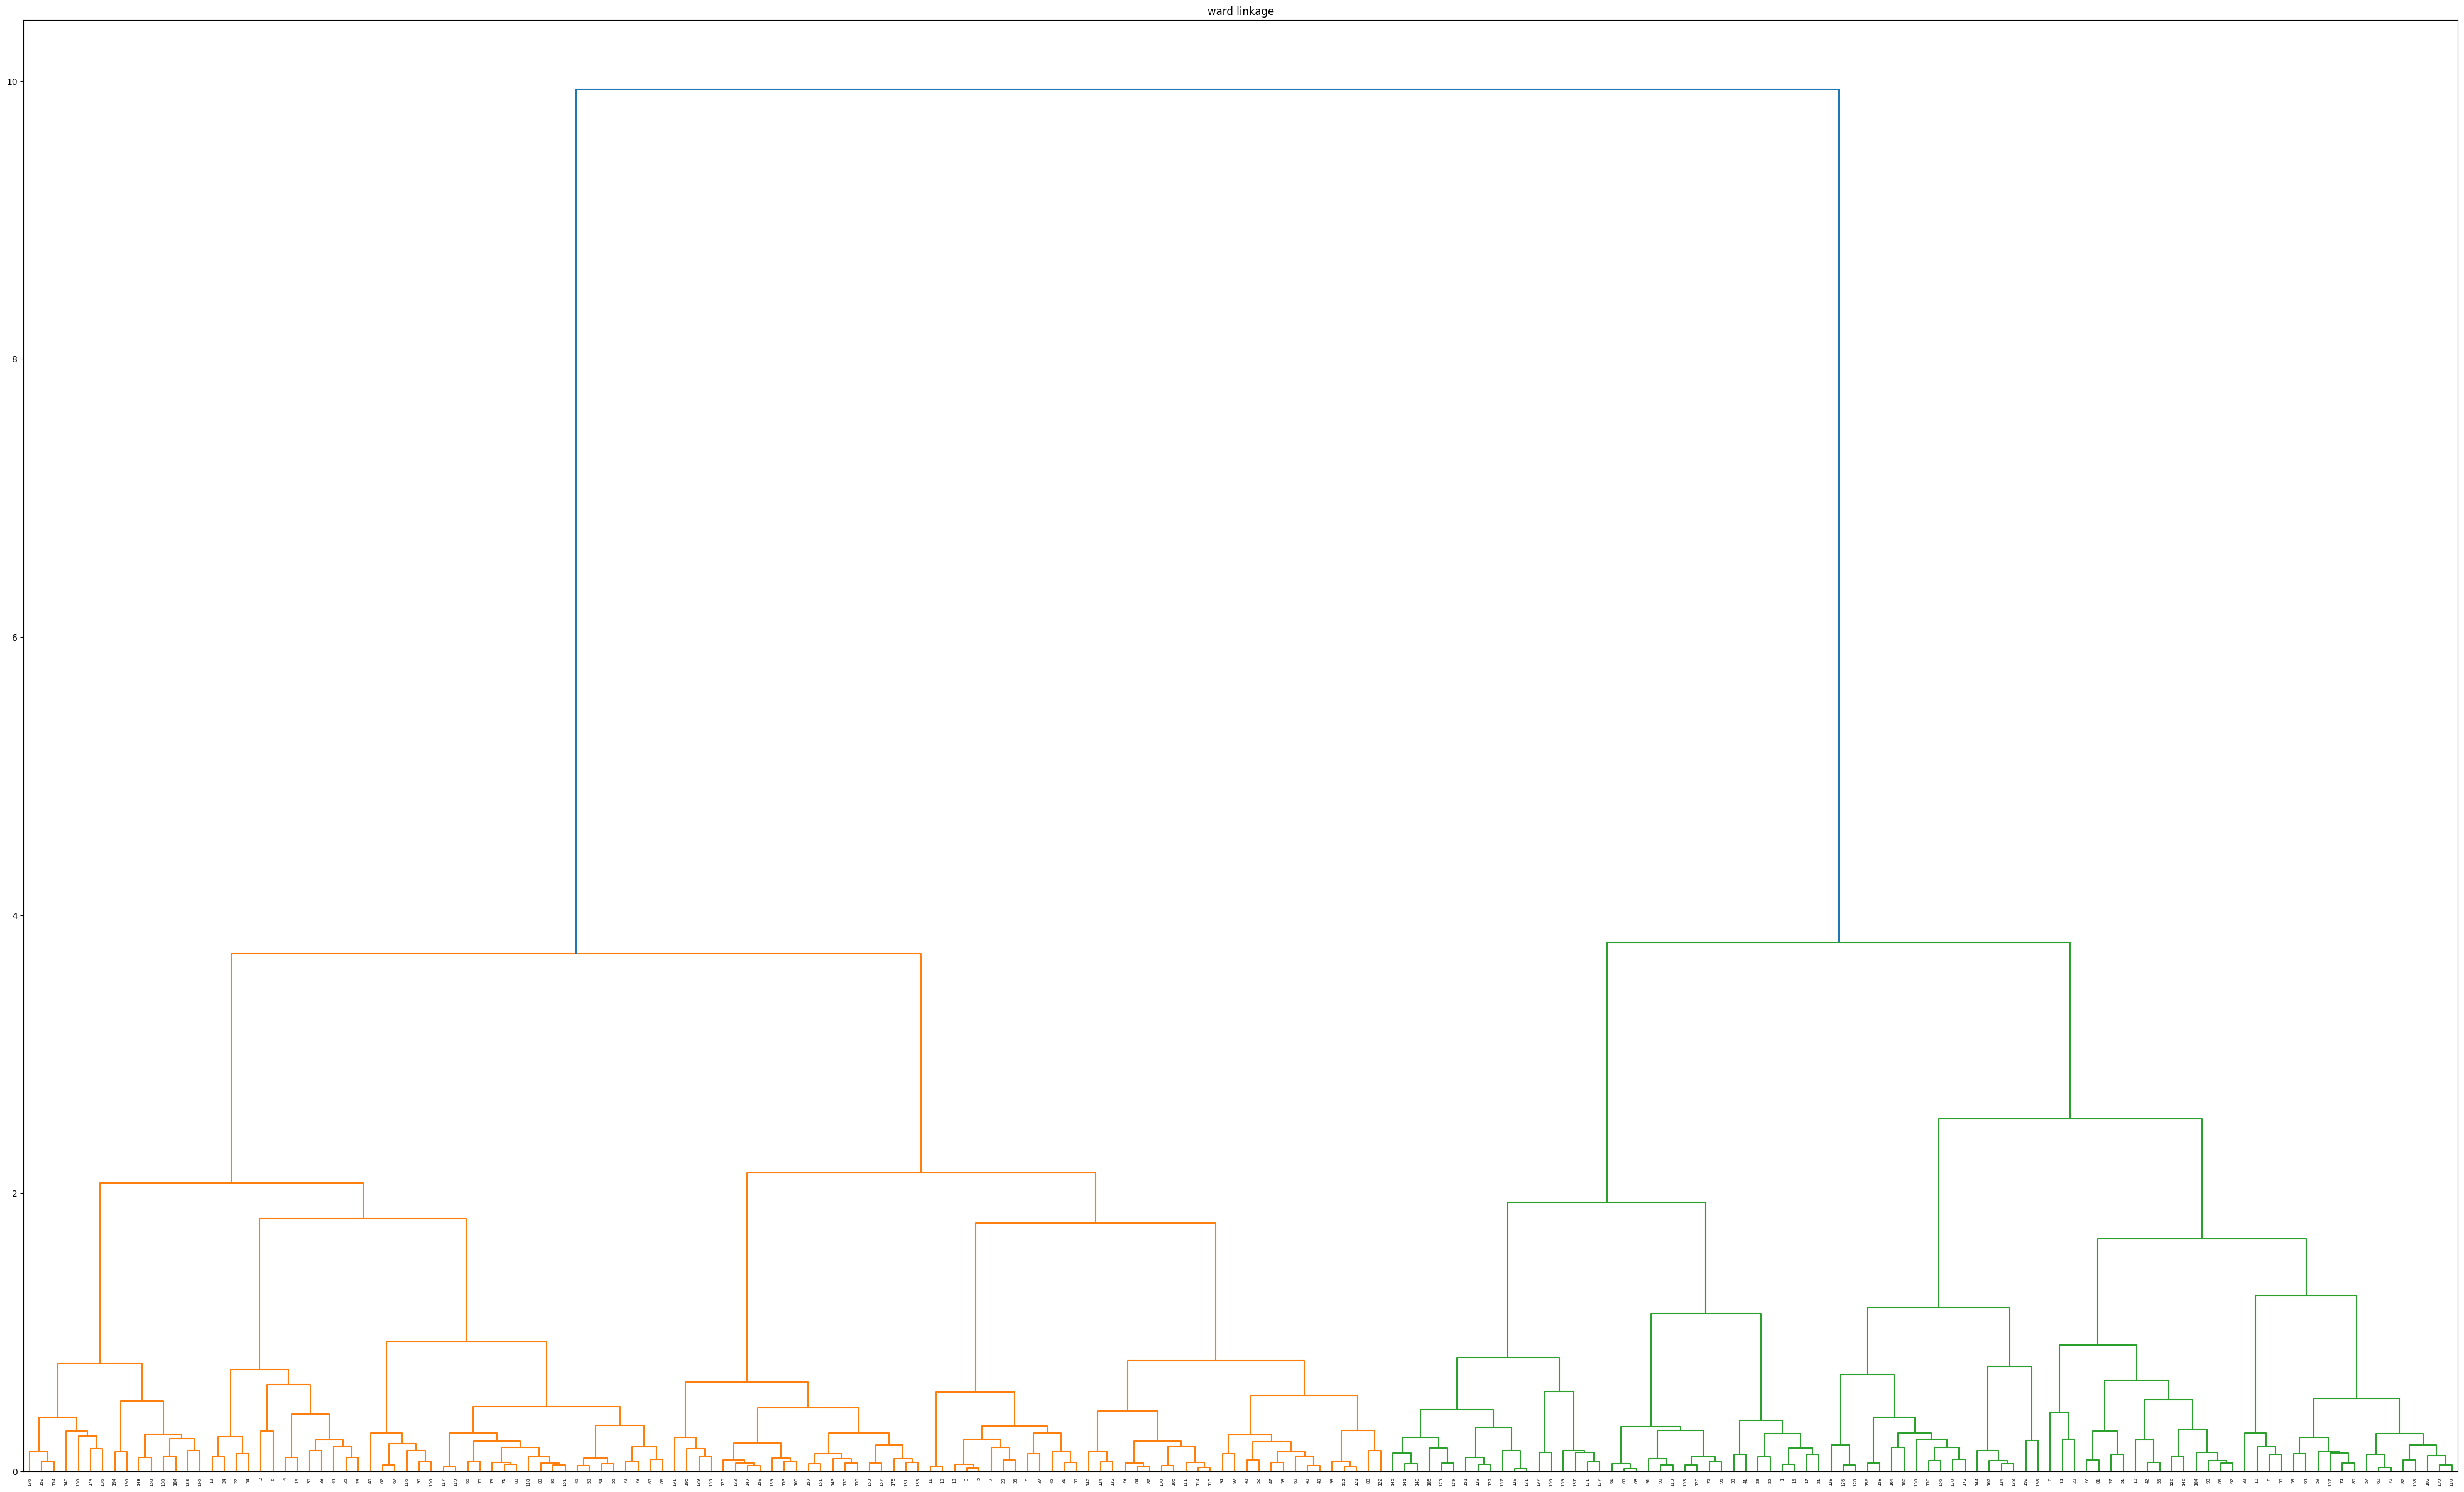

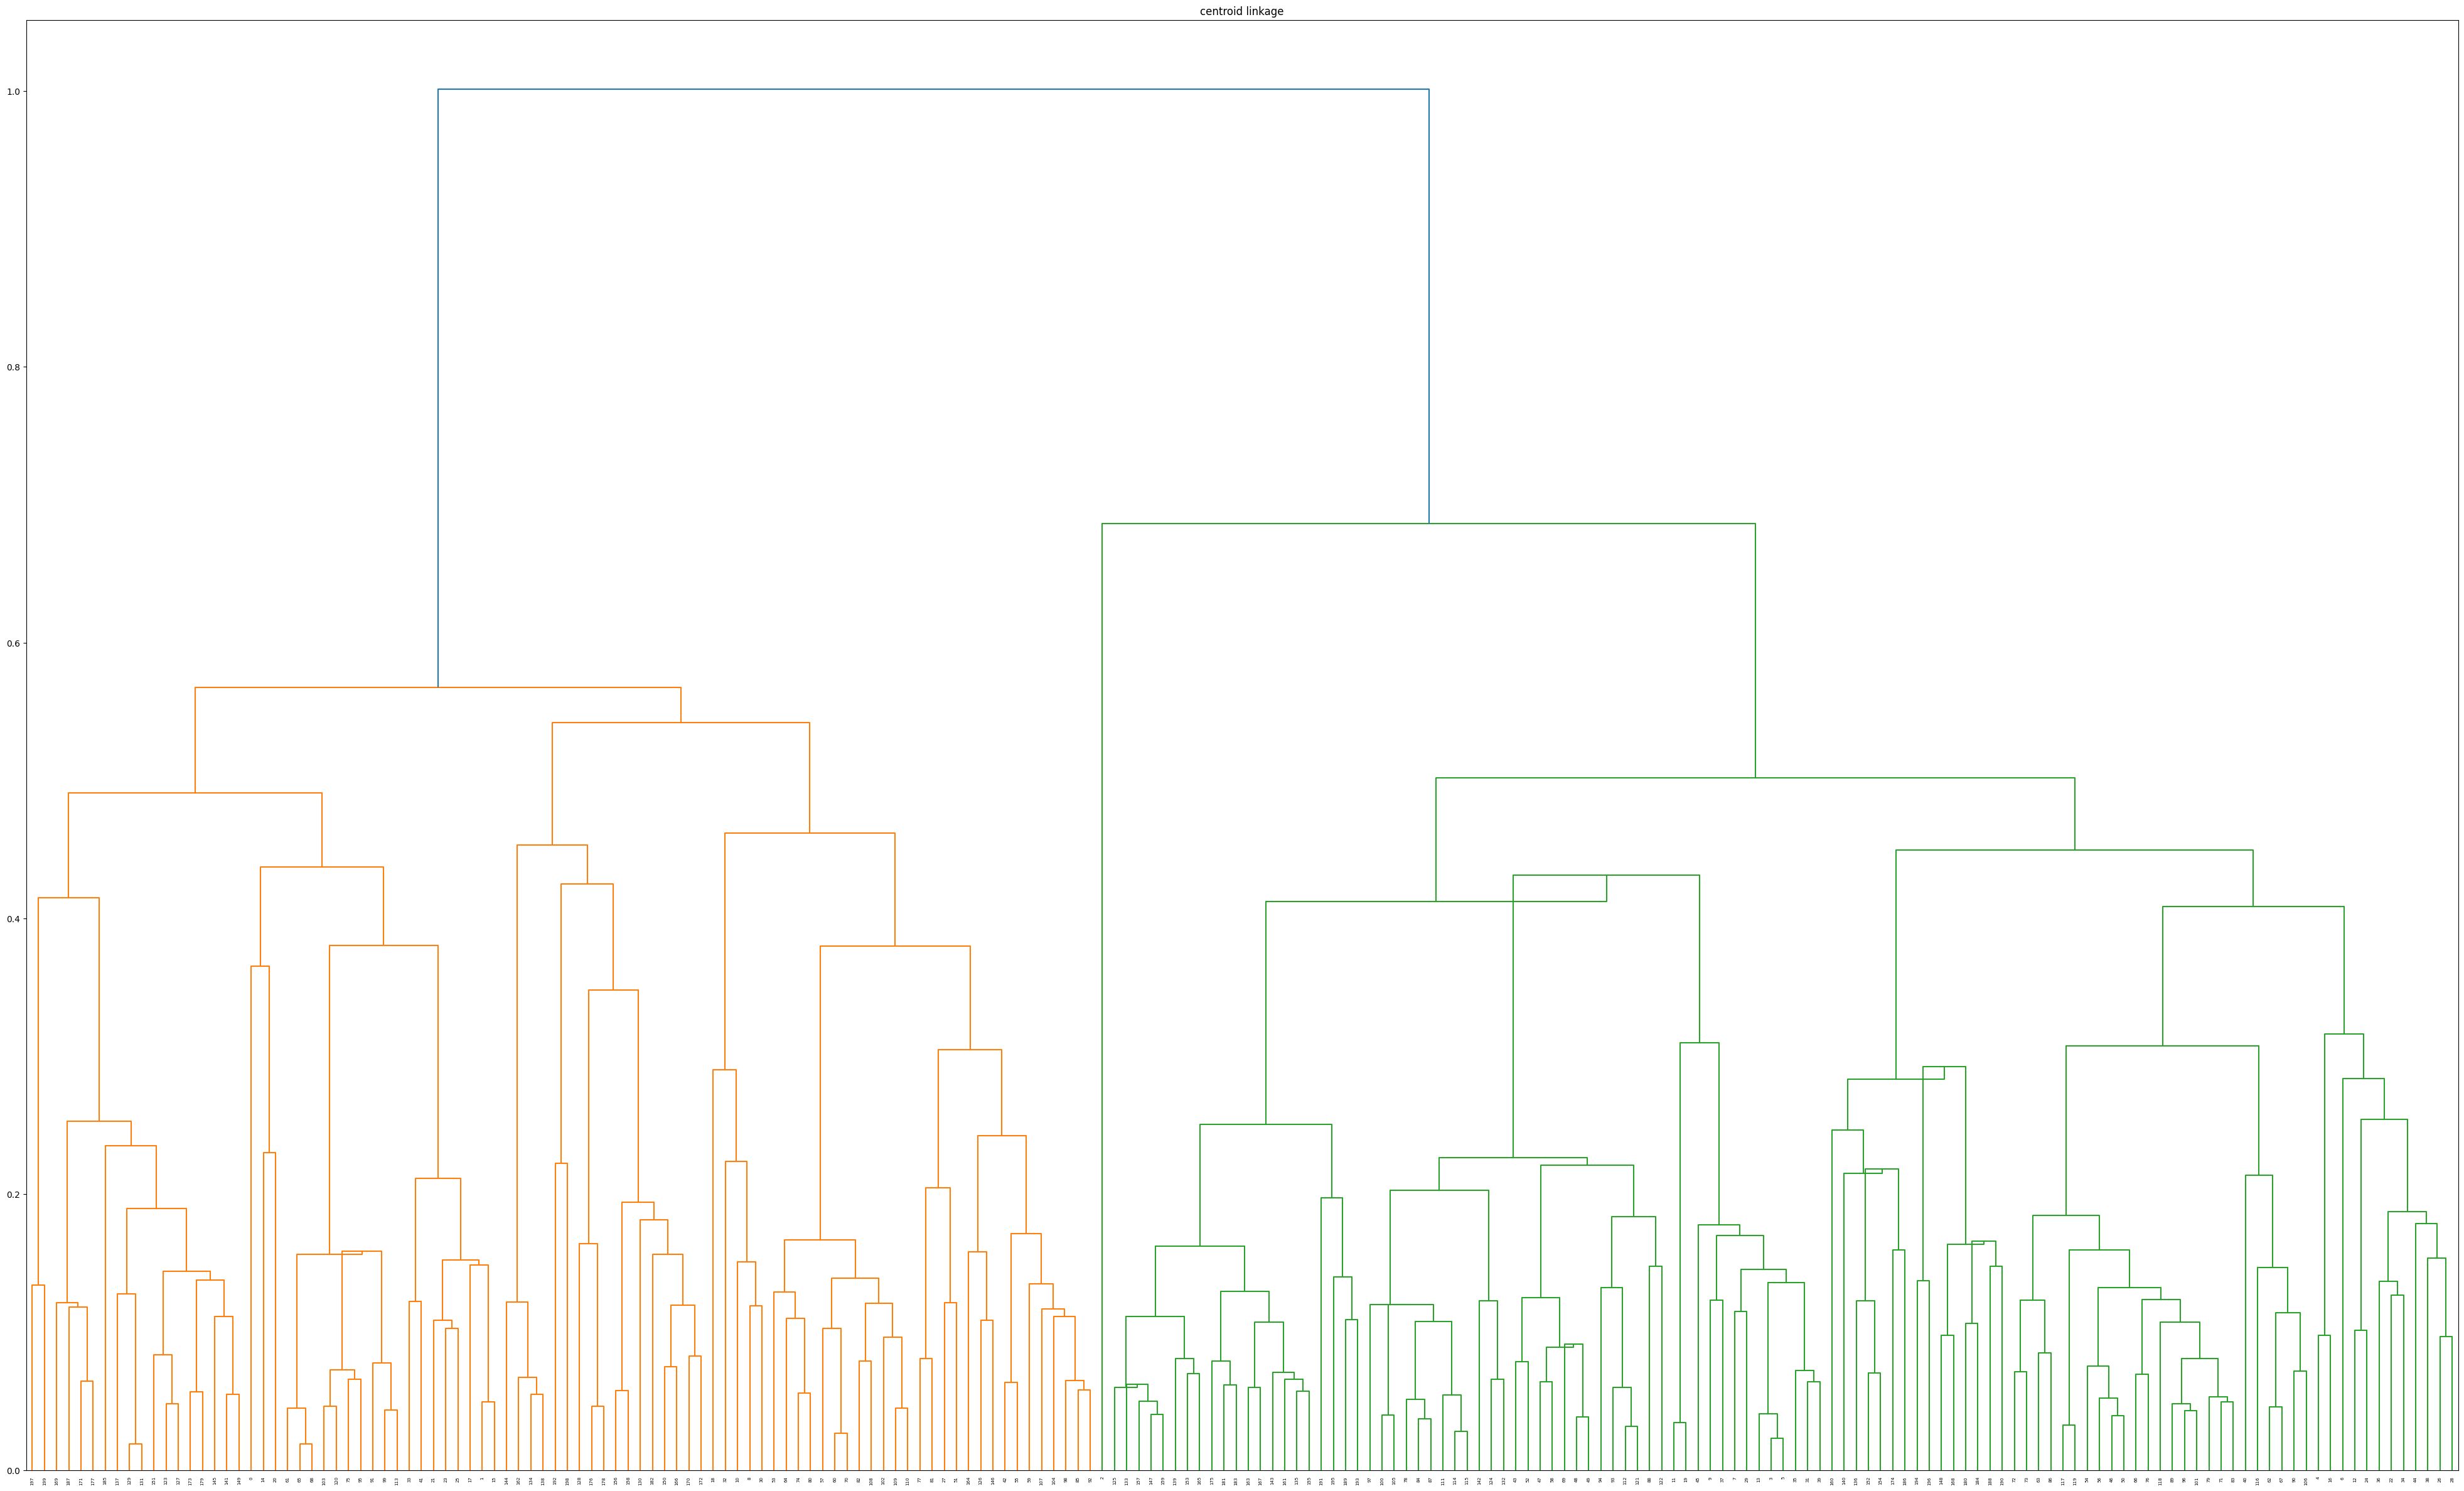

In [29]:
hc = HC(data)
hc.fit('single', 'euclidean')
hc.fit('complete', 'euclidean')
hc.fit('average', 'euclidean')
hc.fit('ward', 'euclidean')
hc.fit('centroid', 'euclidean')

Varying Features

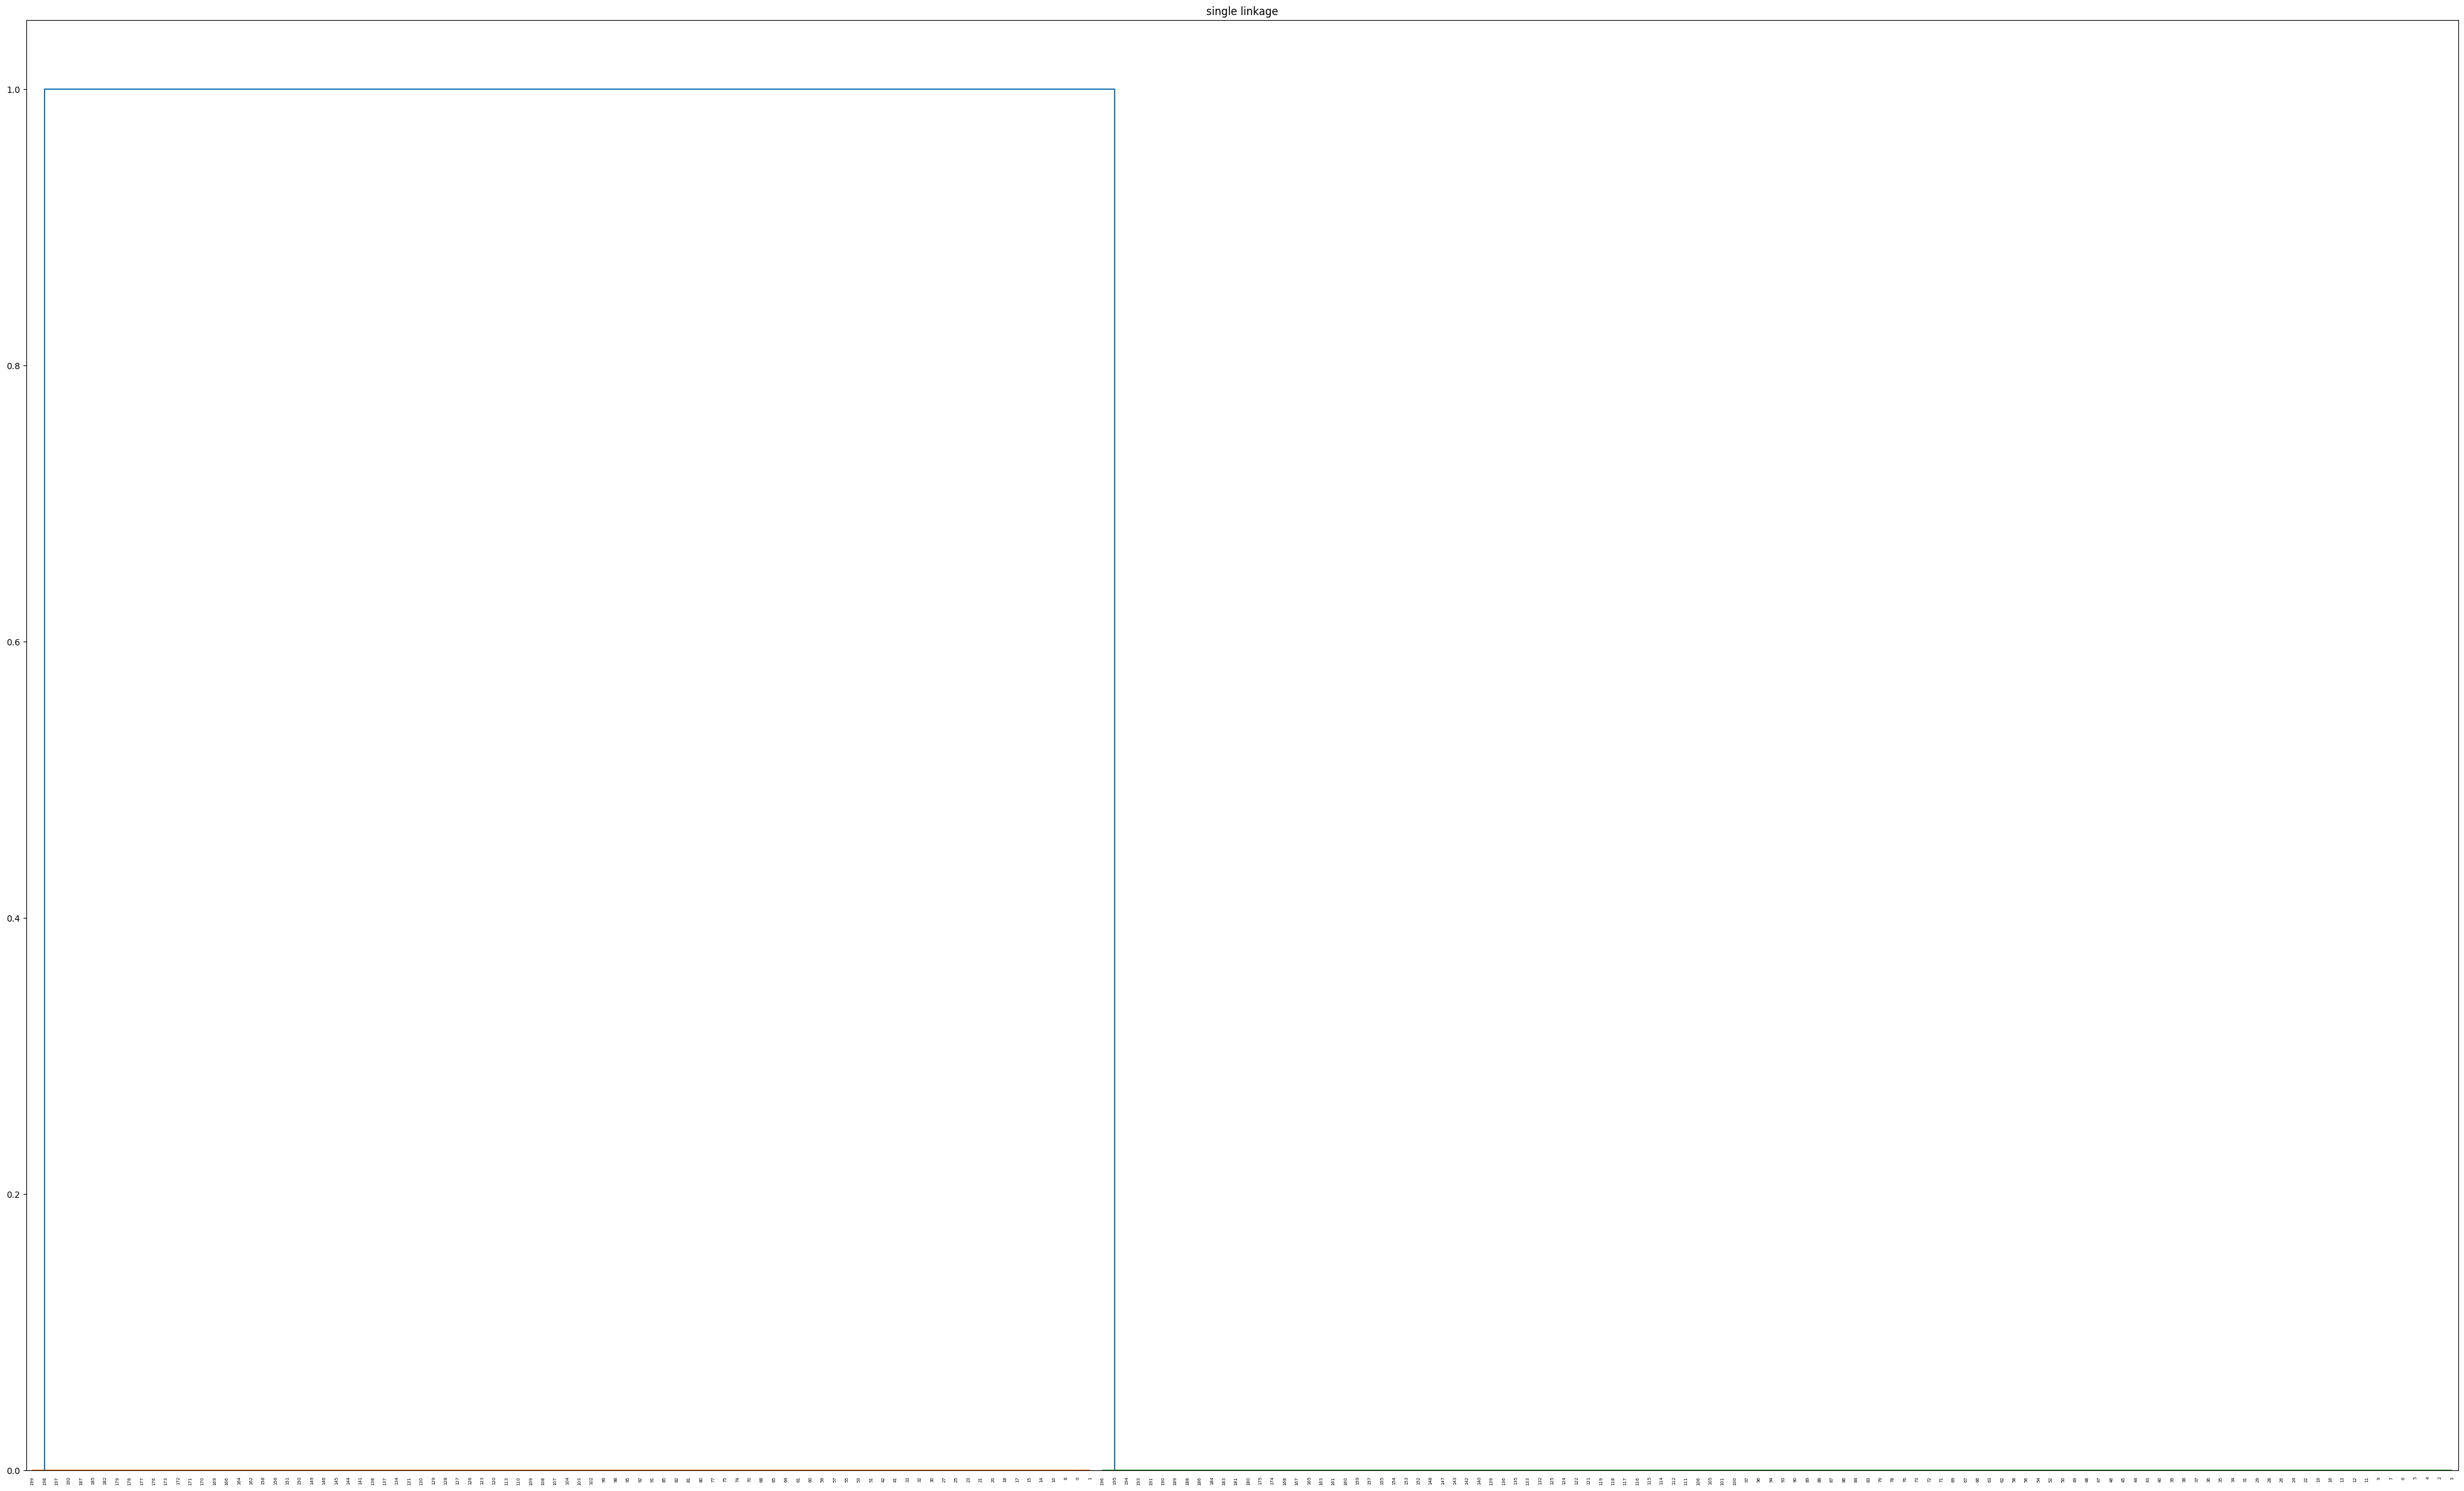

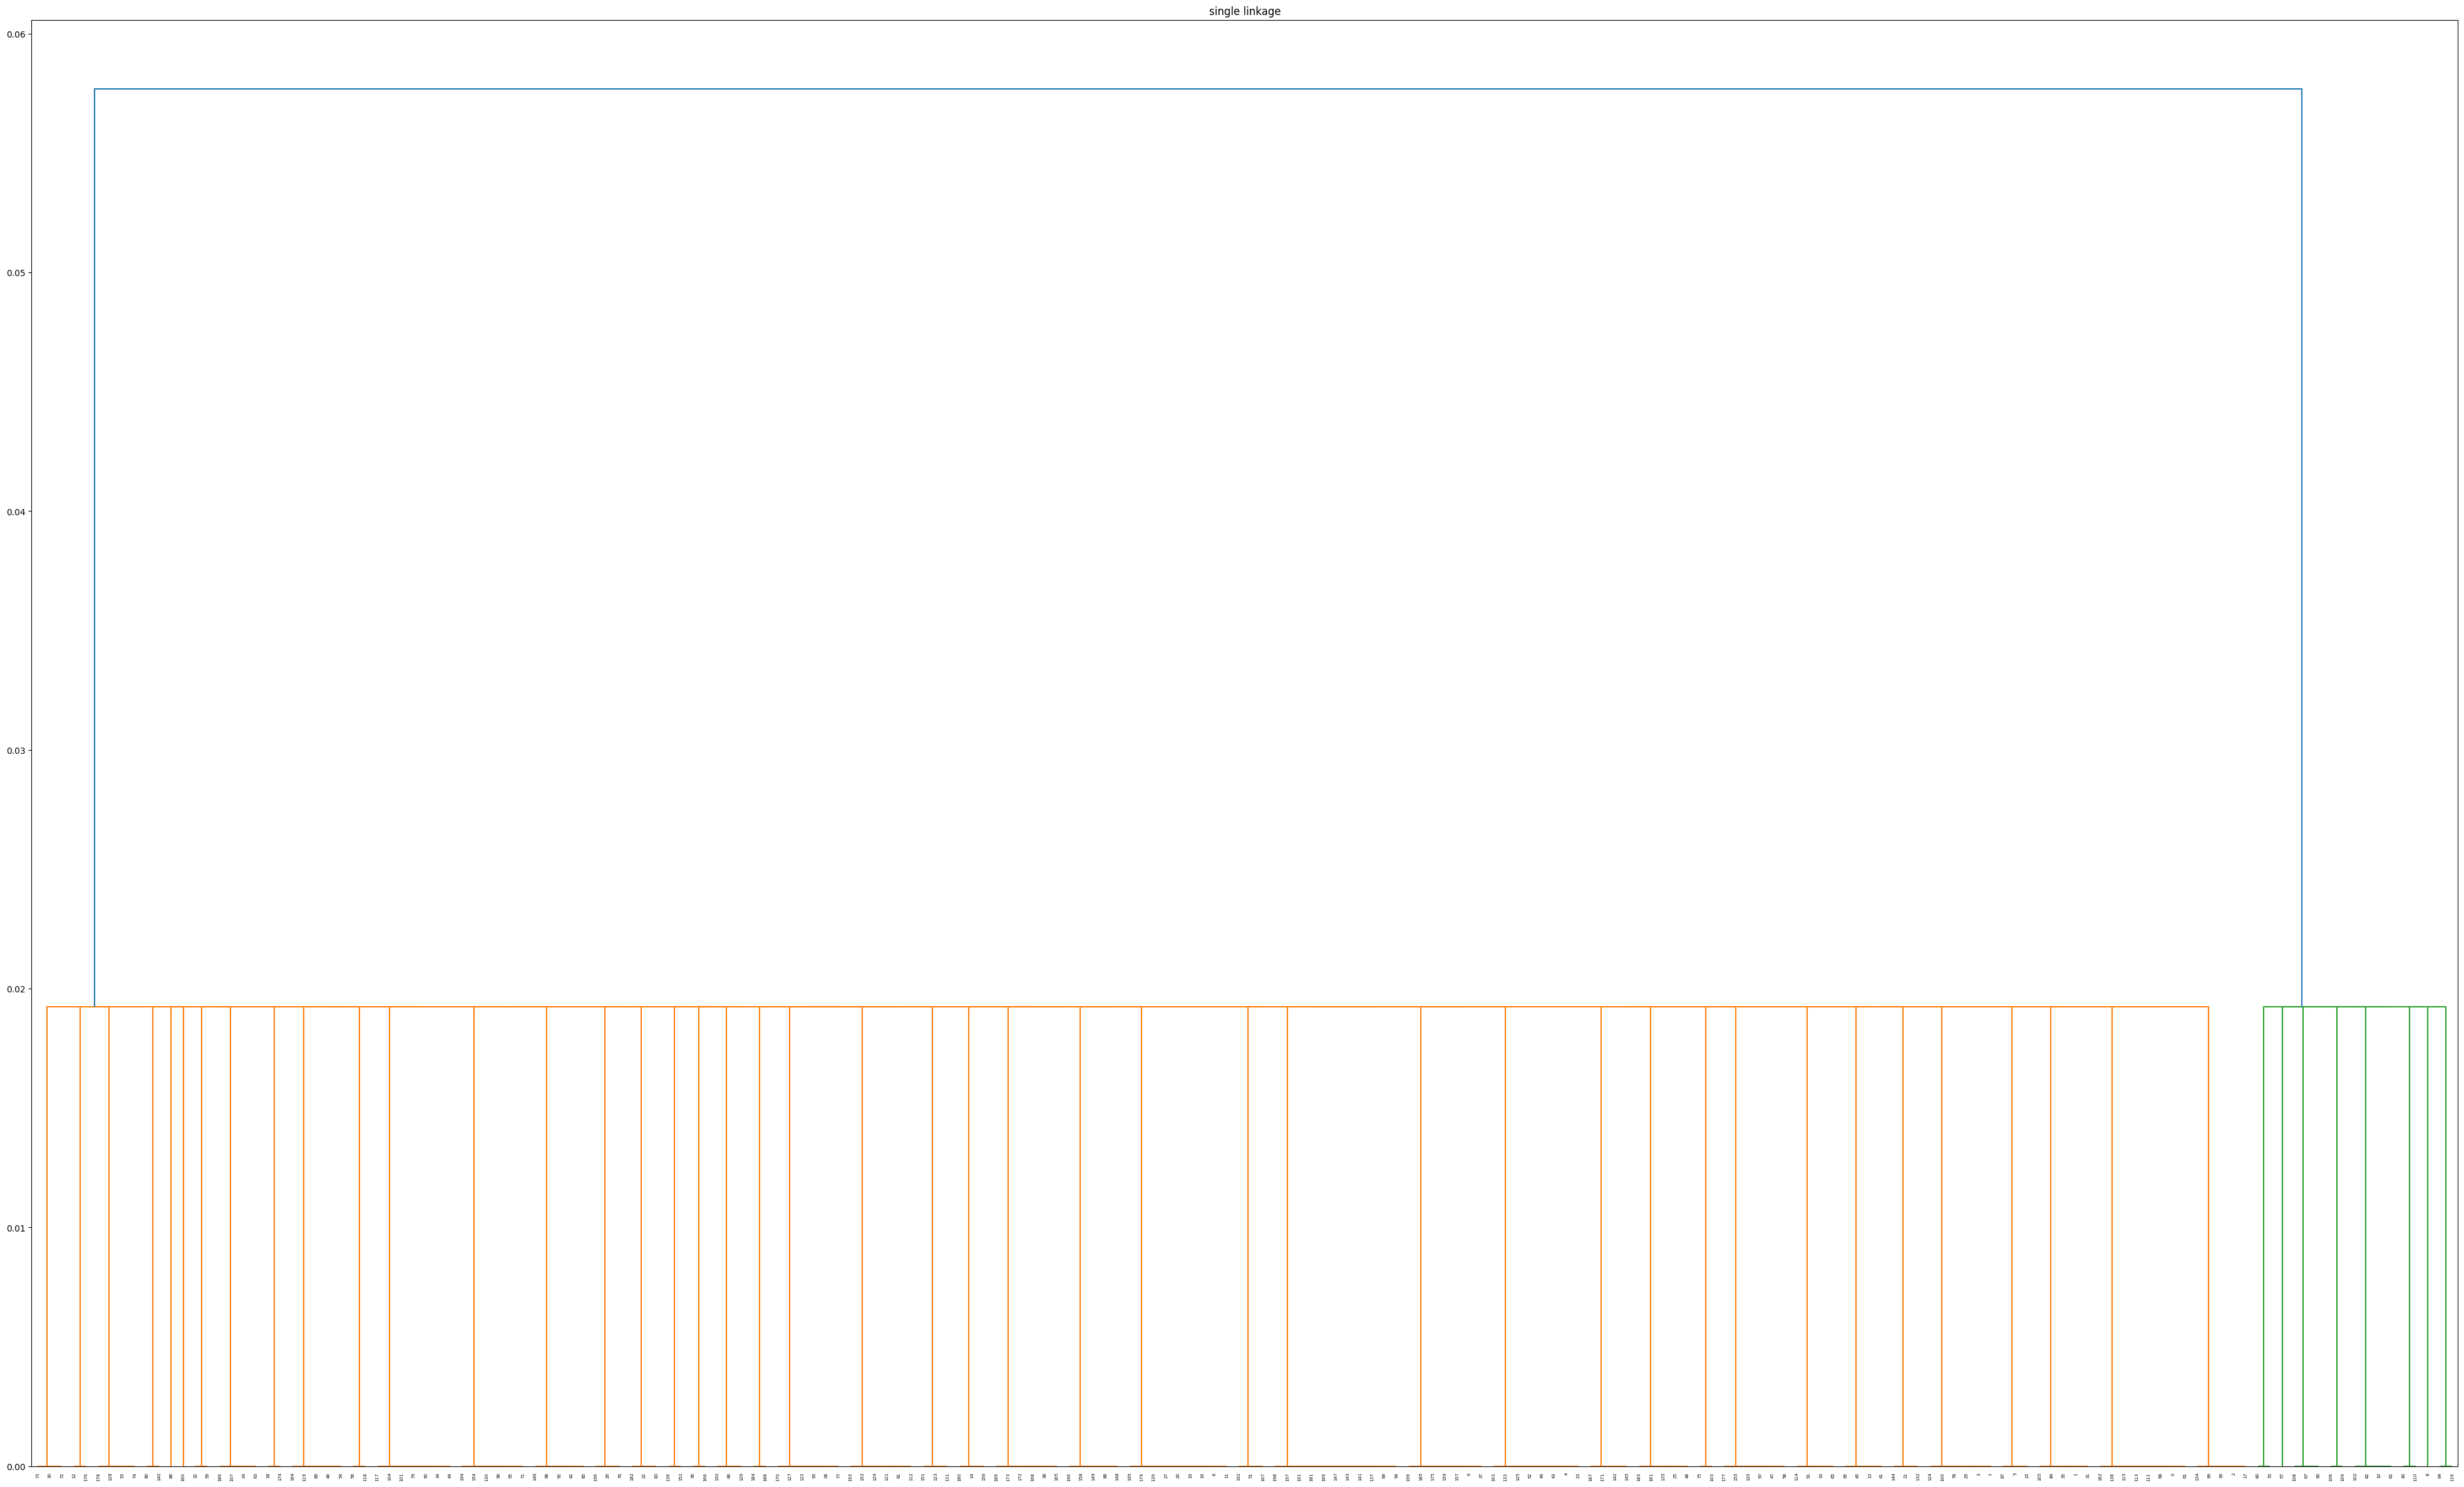

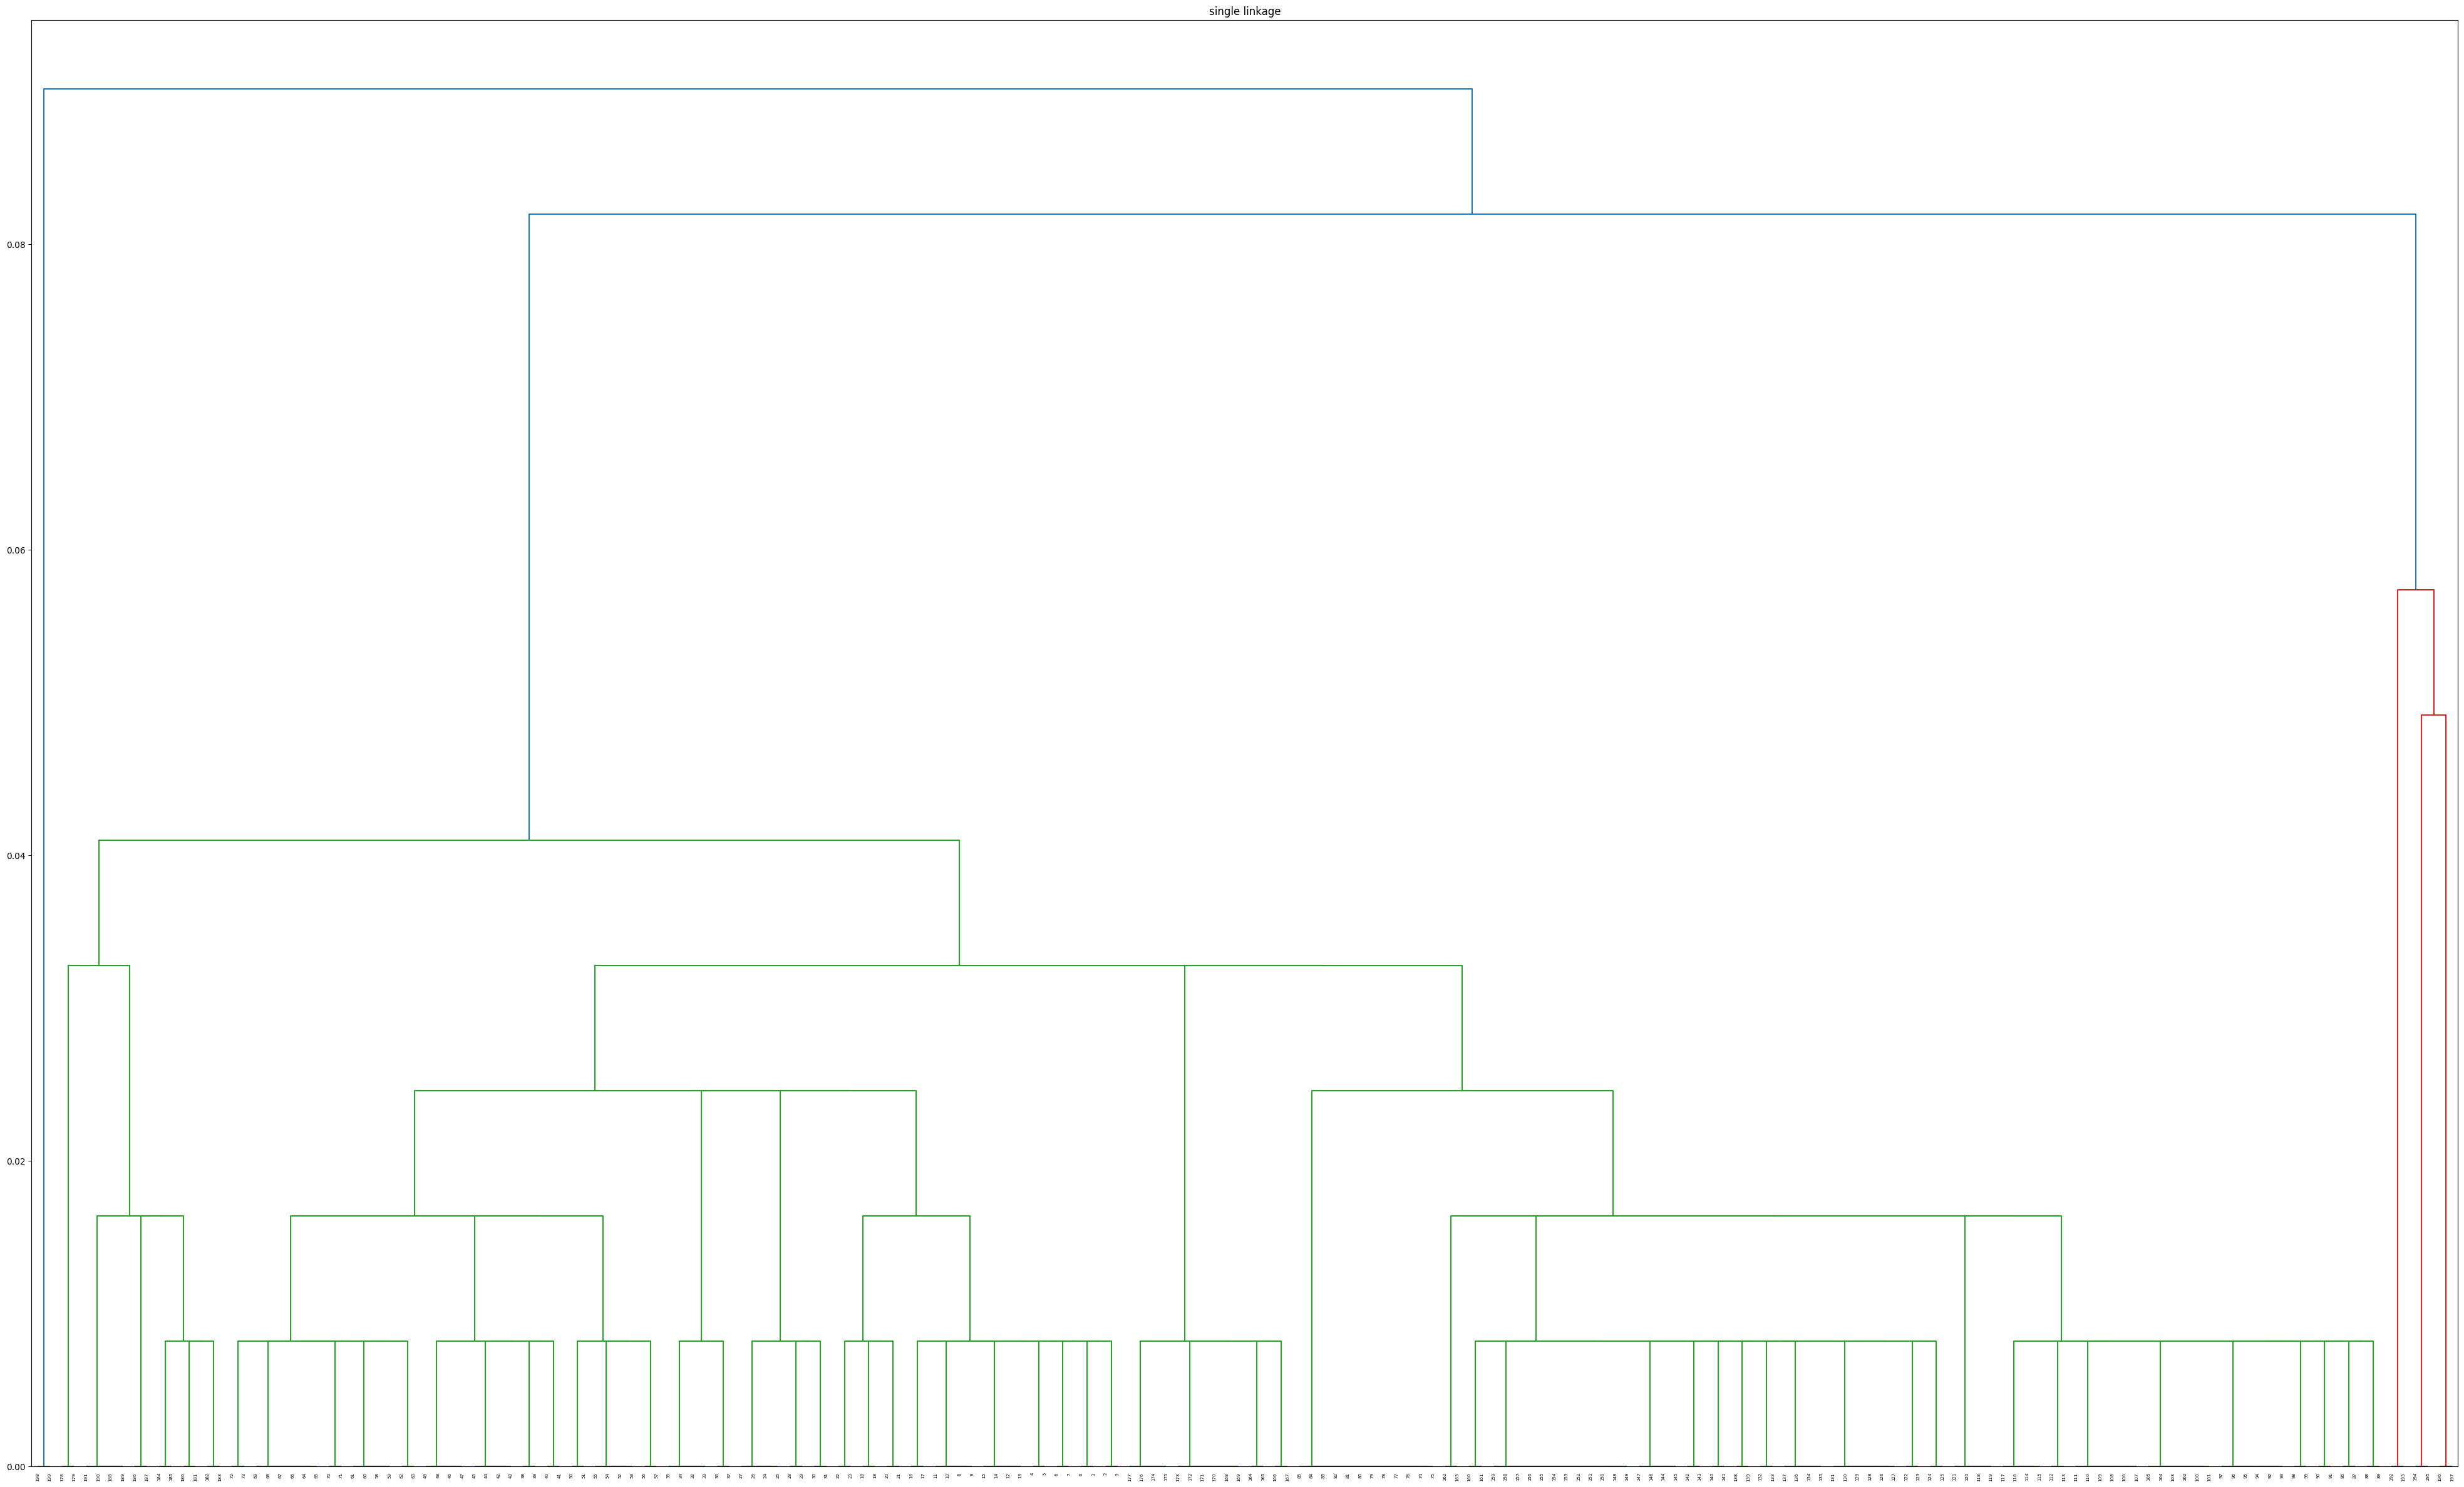

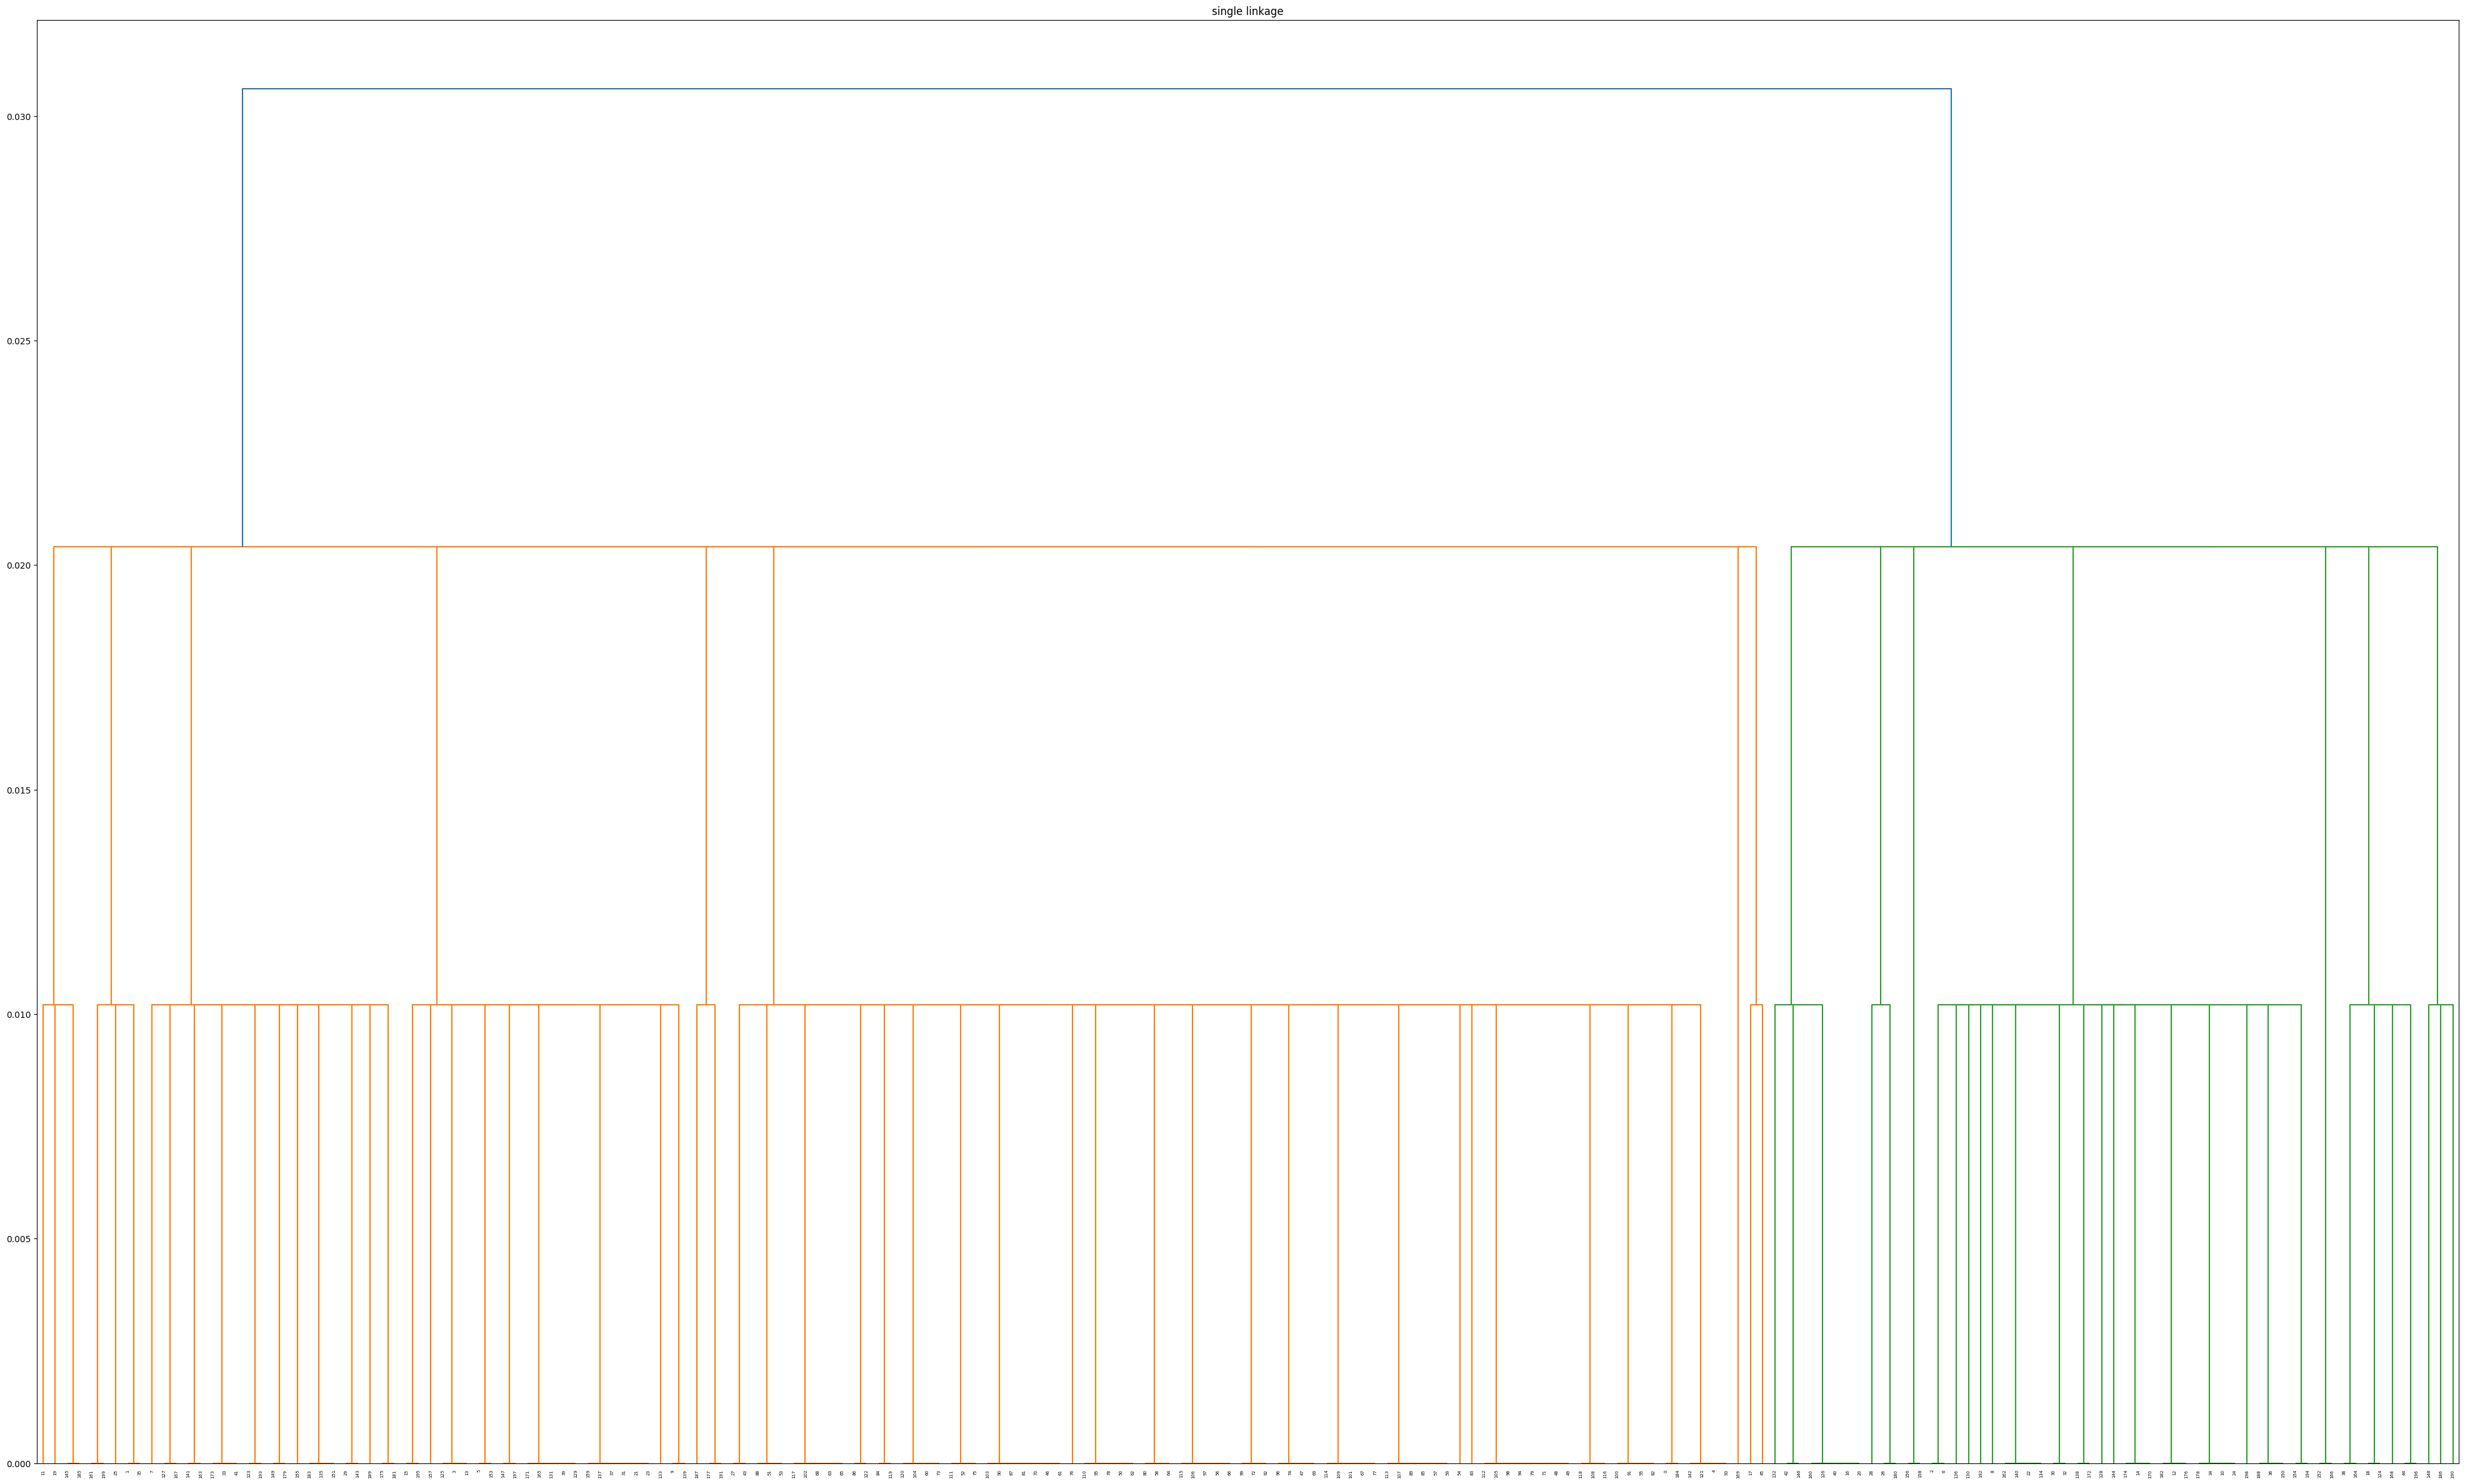

In [33]:
for i in range(data.shape[1]):
    hc = HC(data[:, [i]])
    hc.fit('single', 'euclidean')

GENE-EXPRESSION

(58, 12)


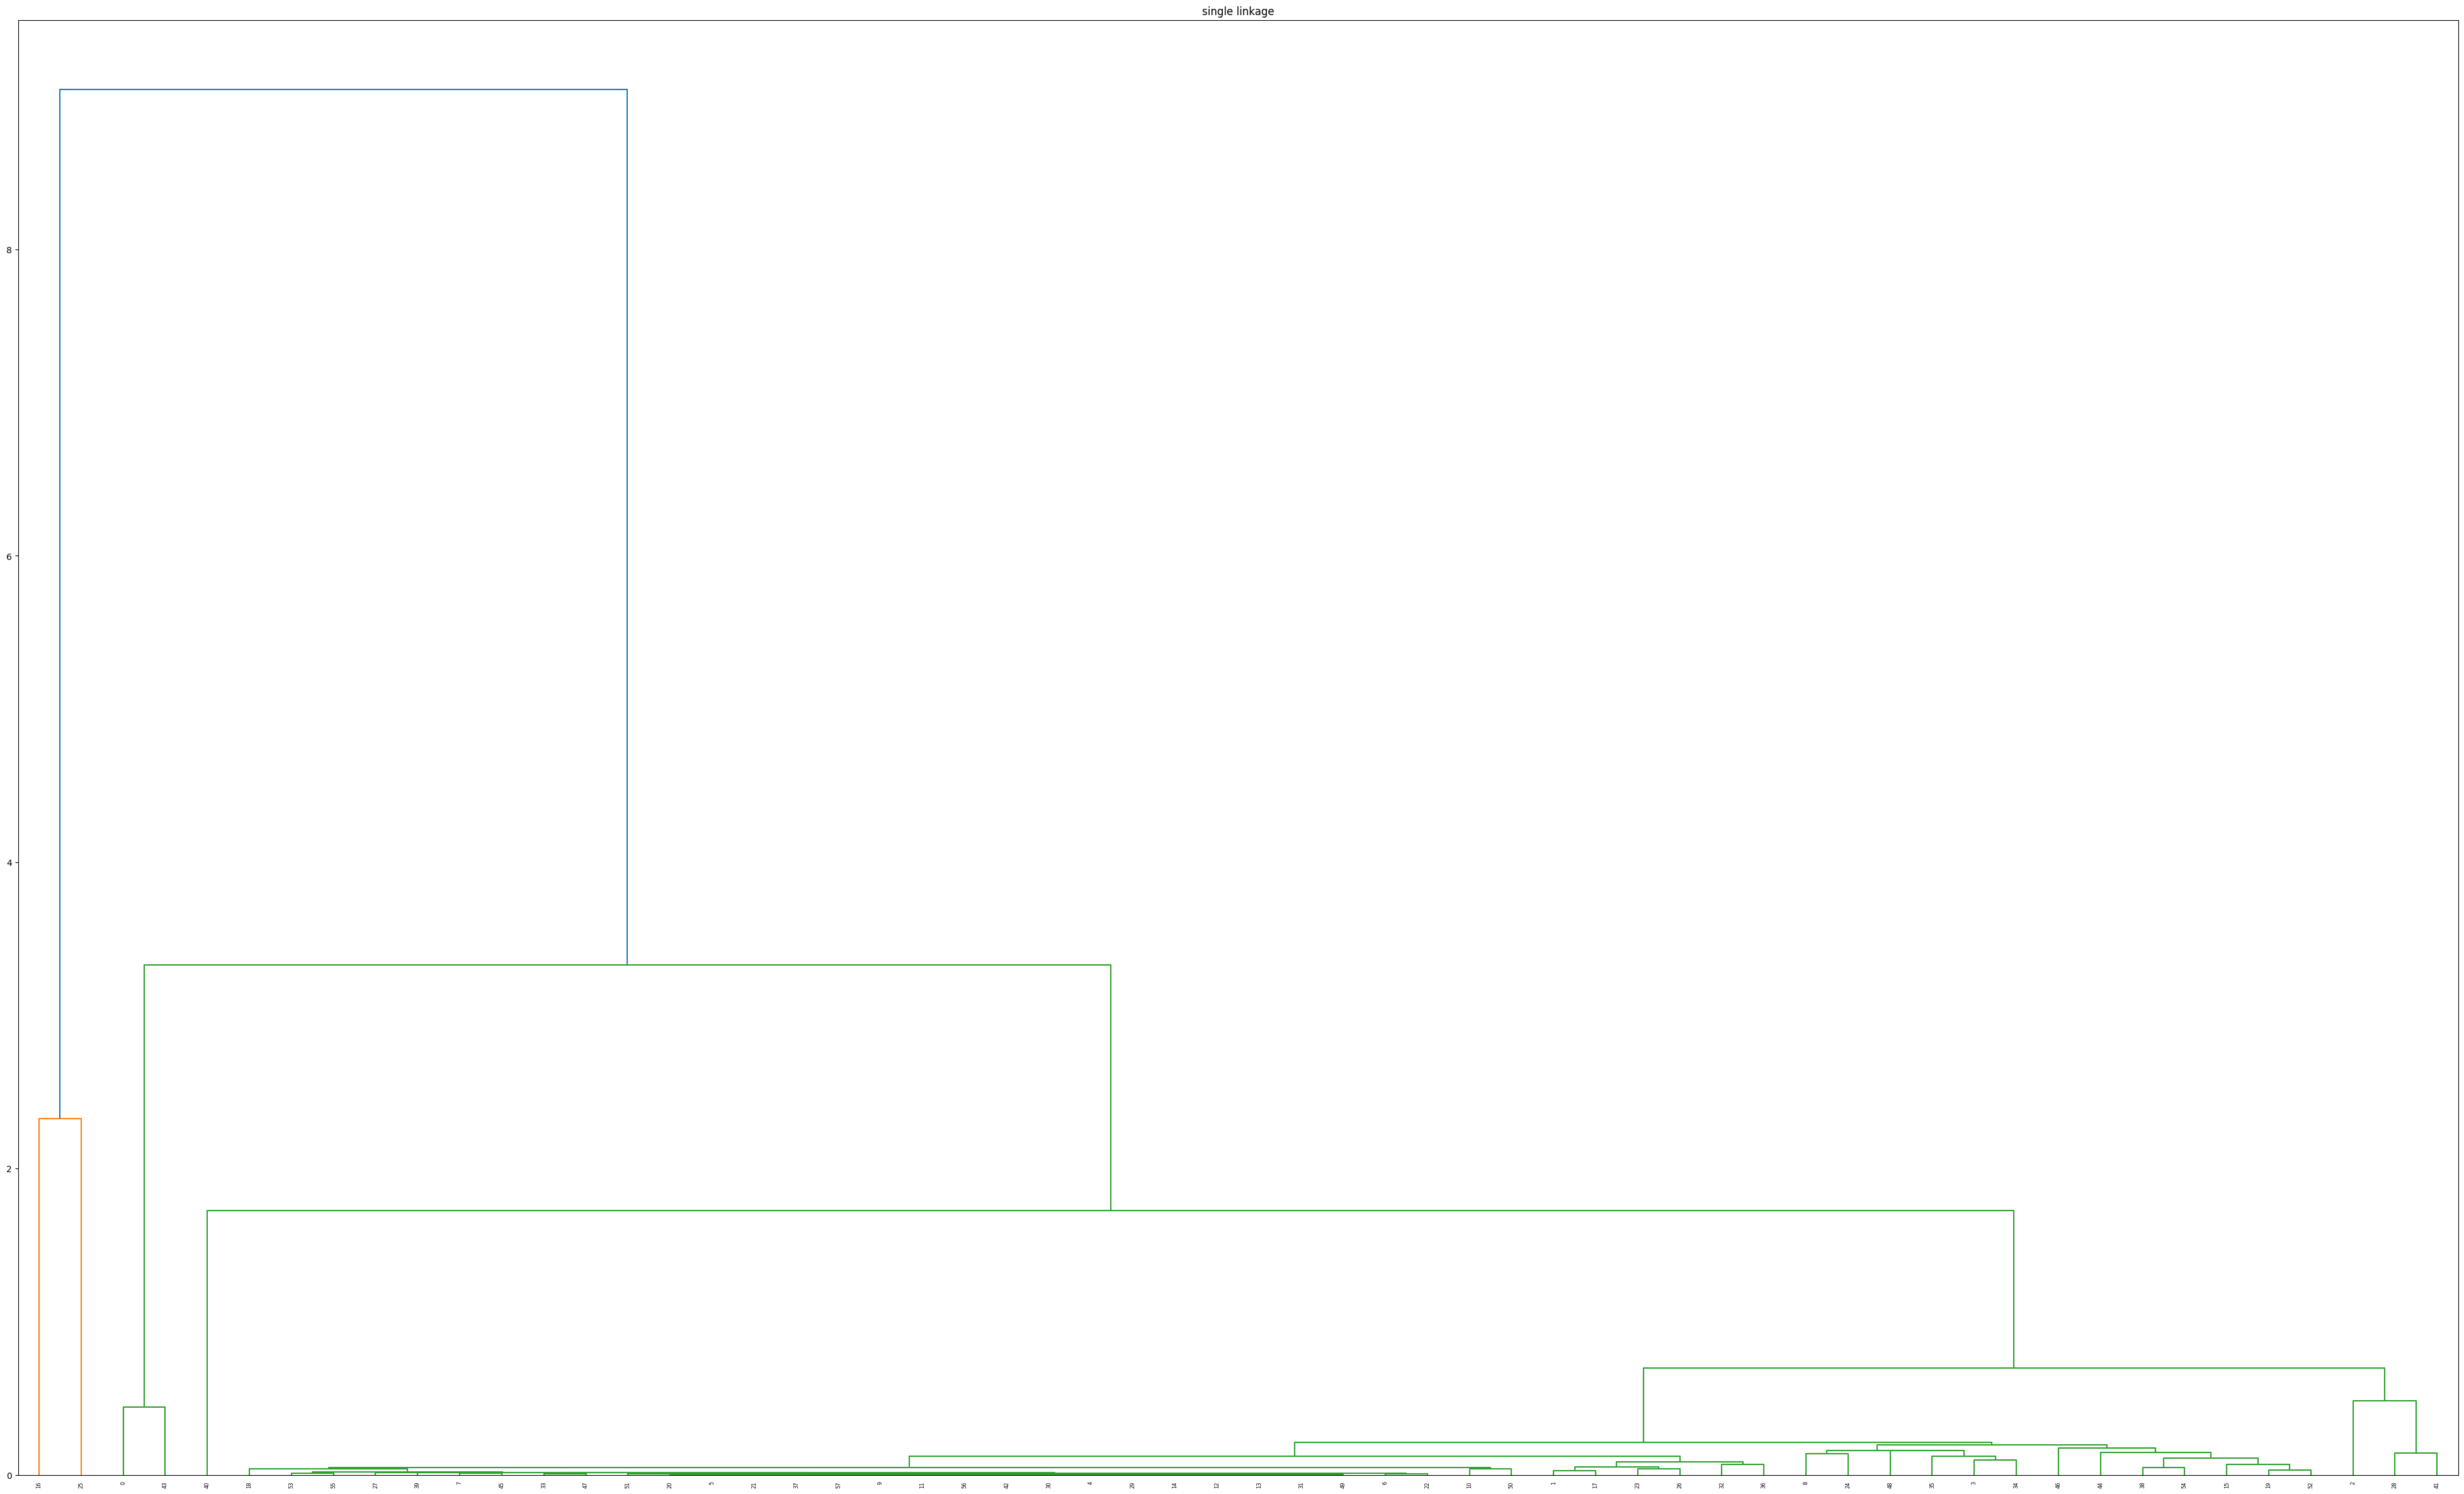

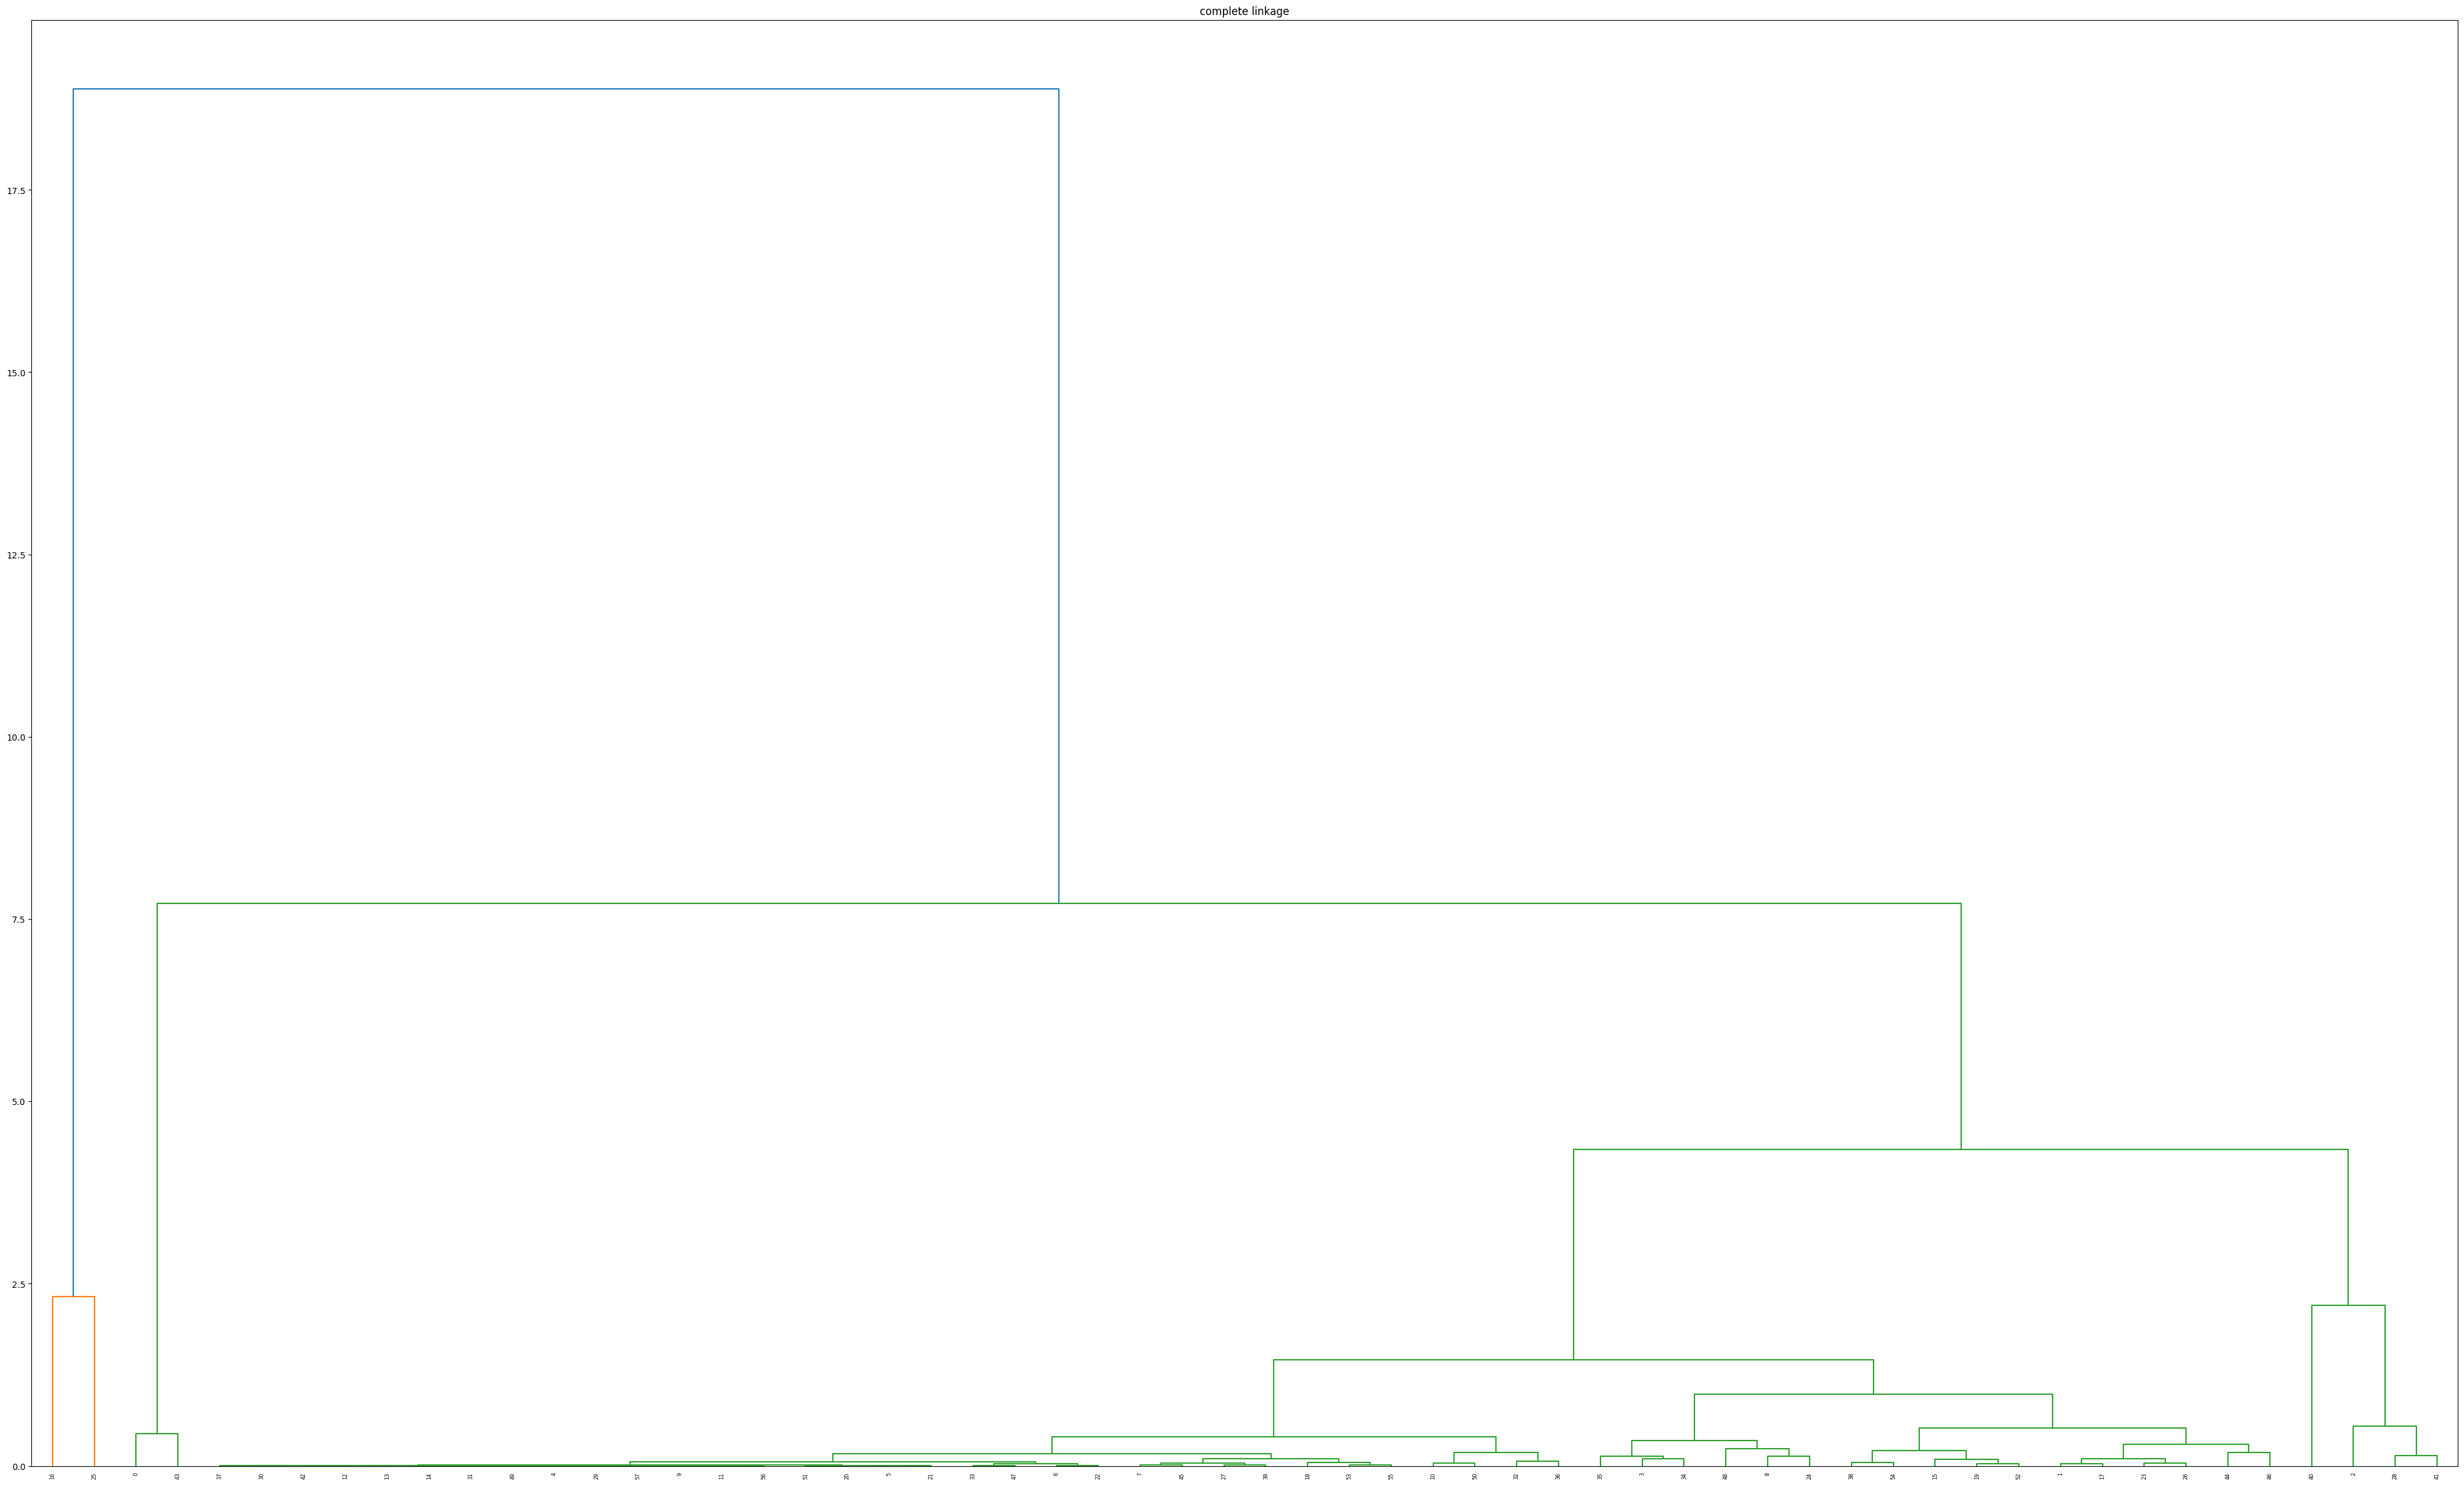

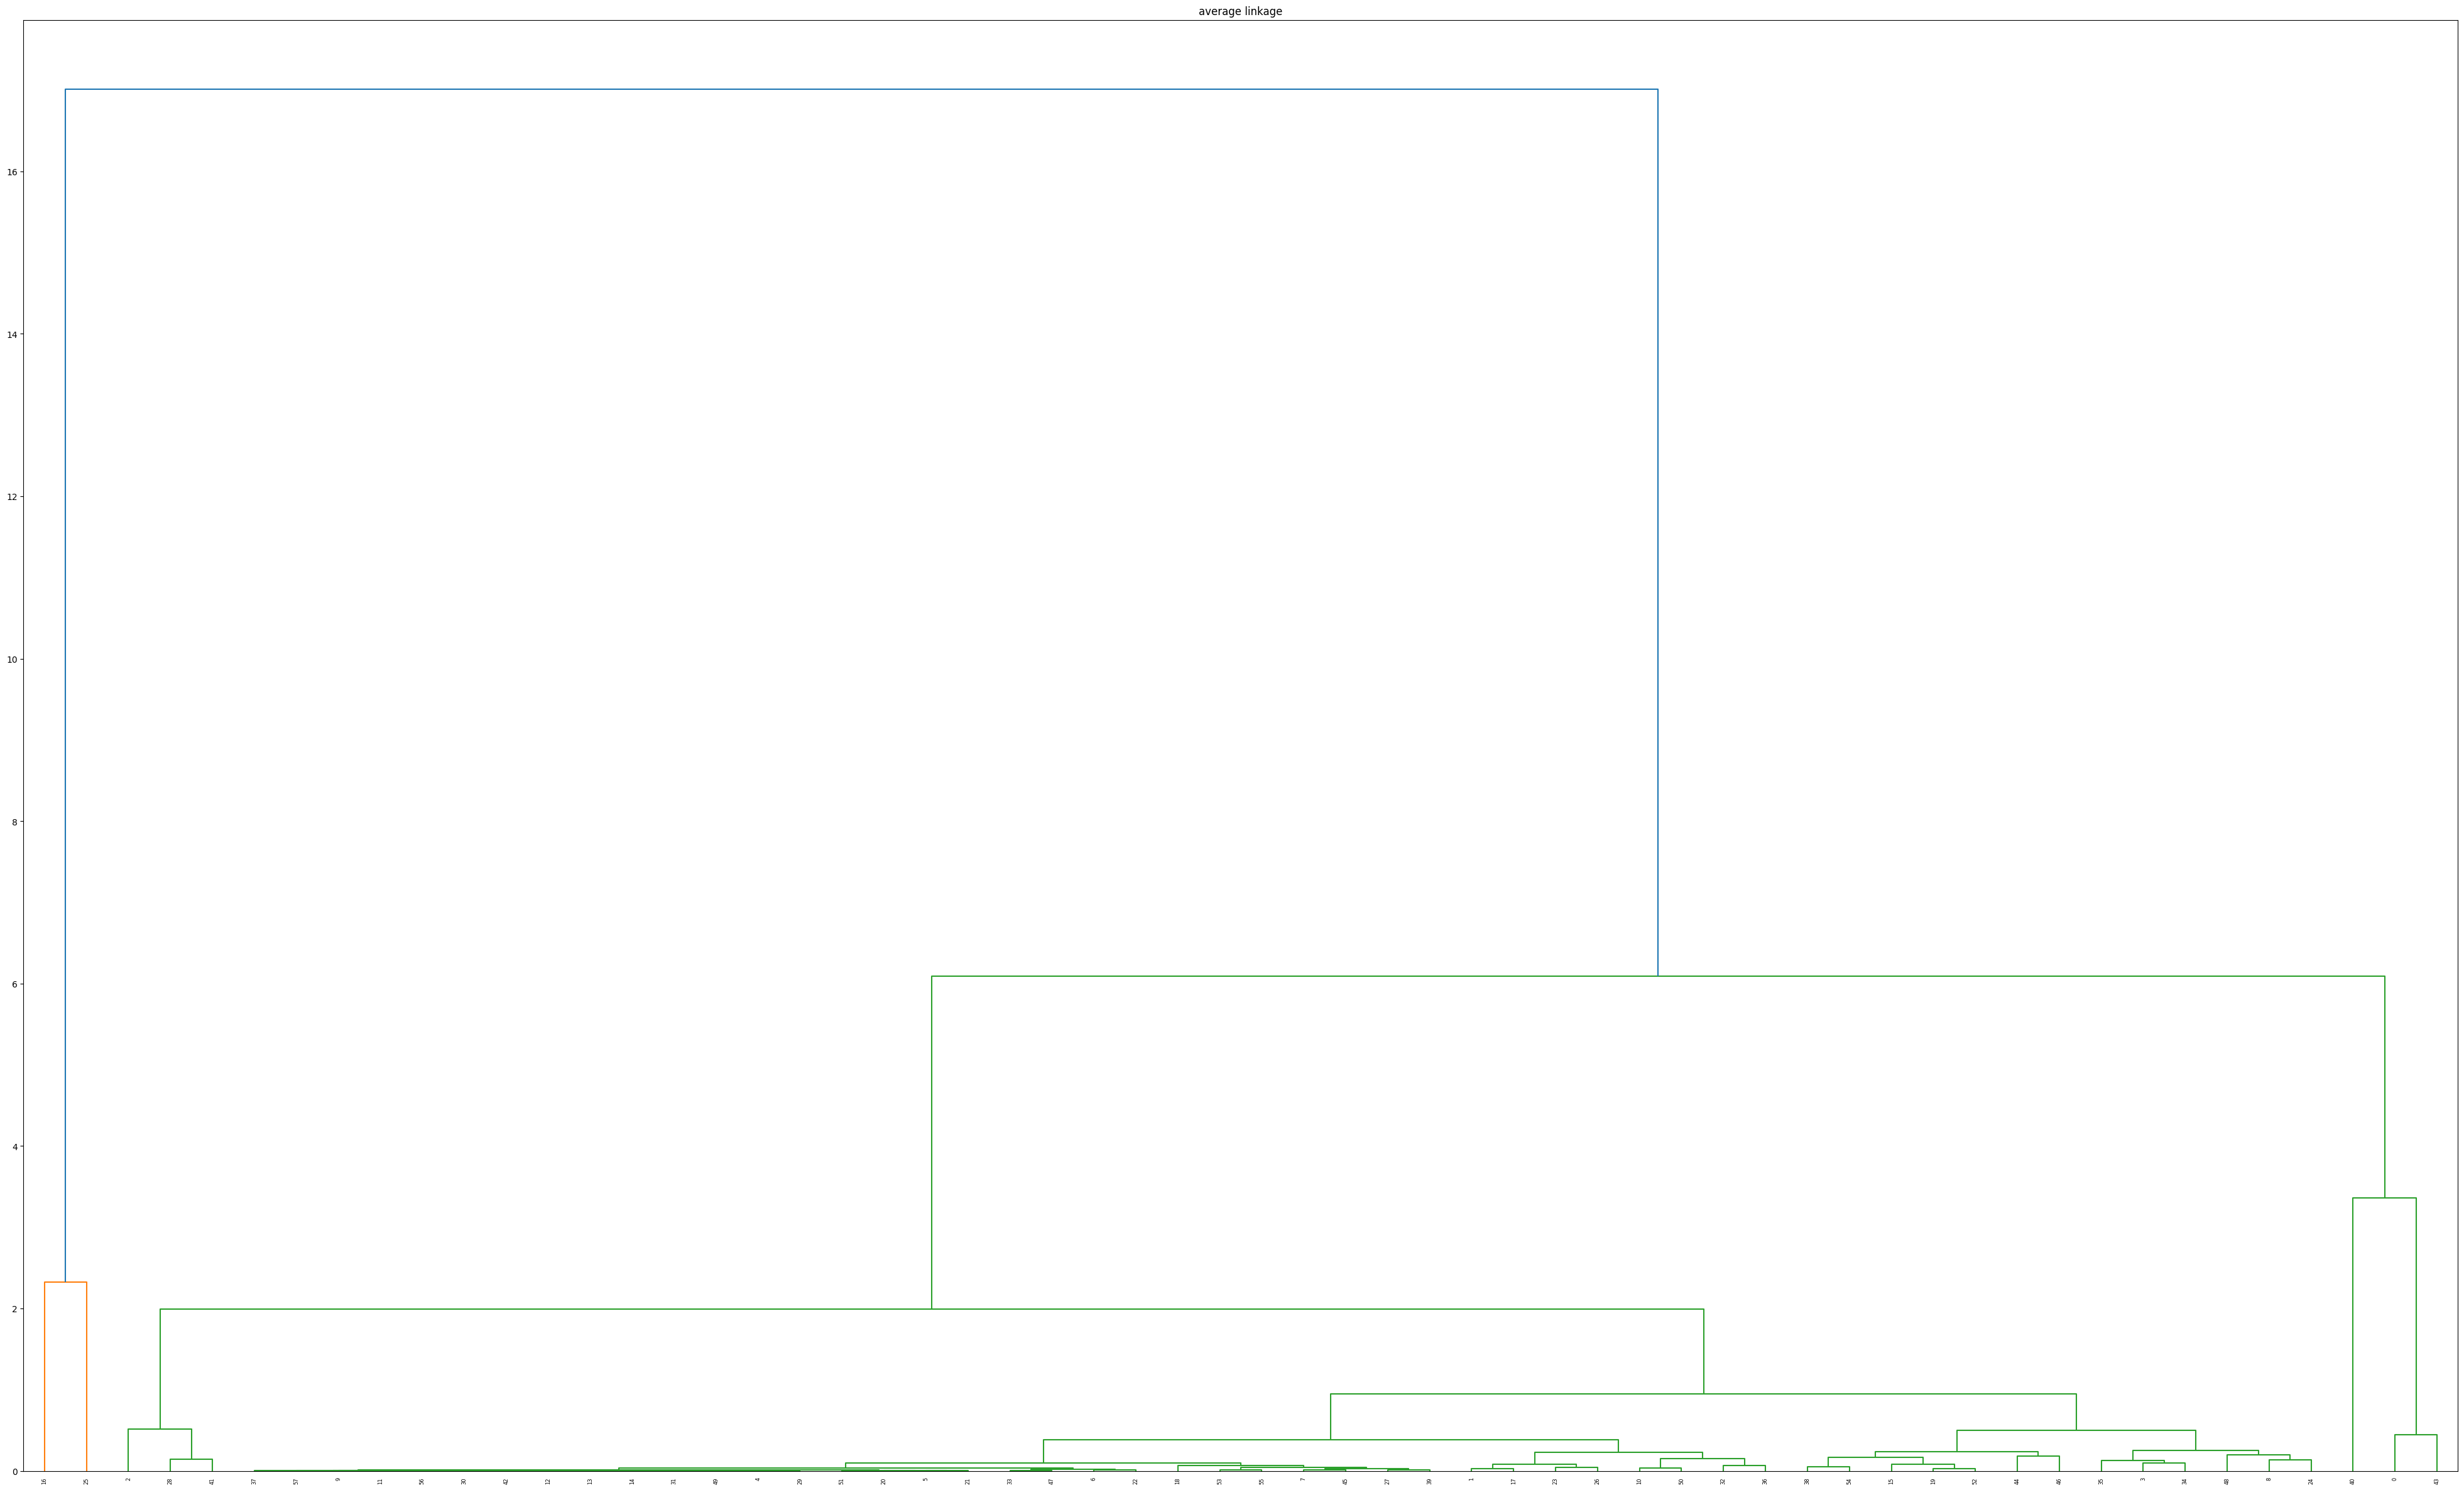

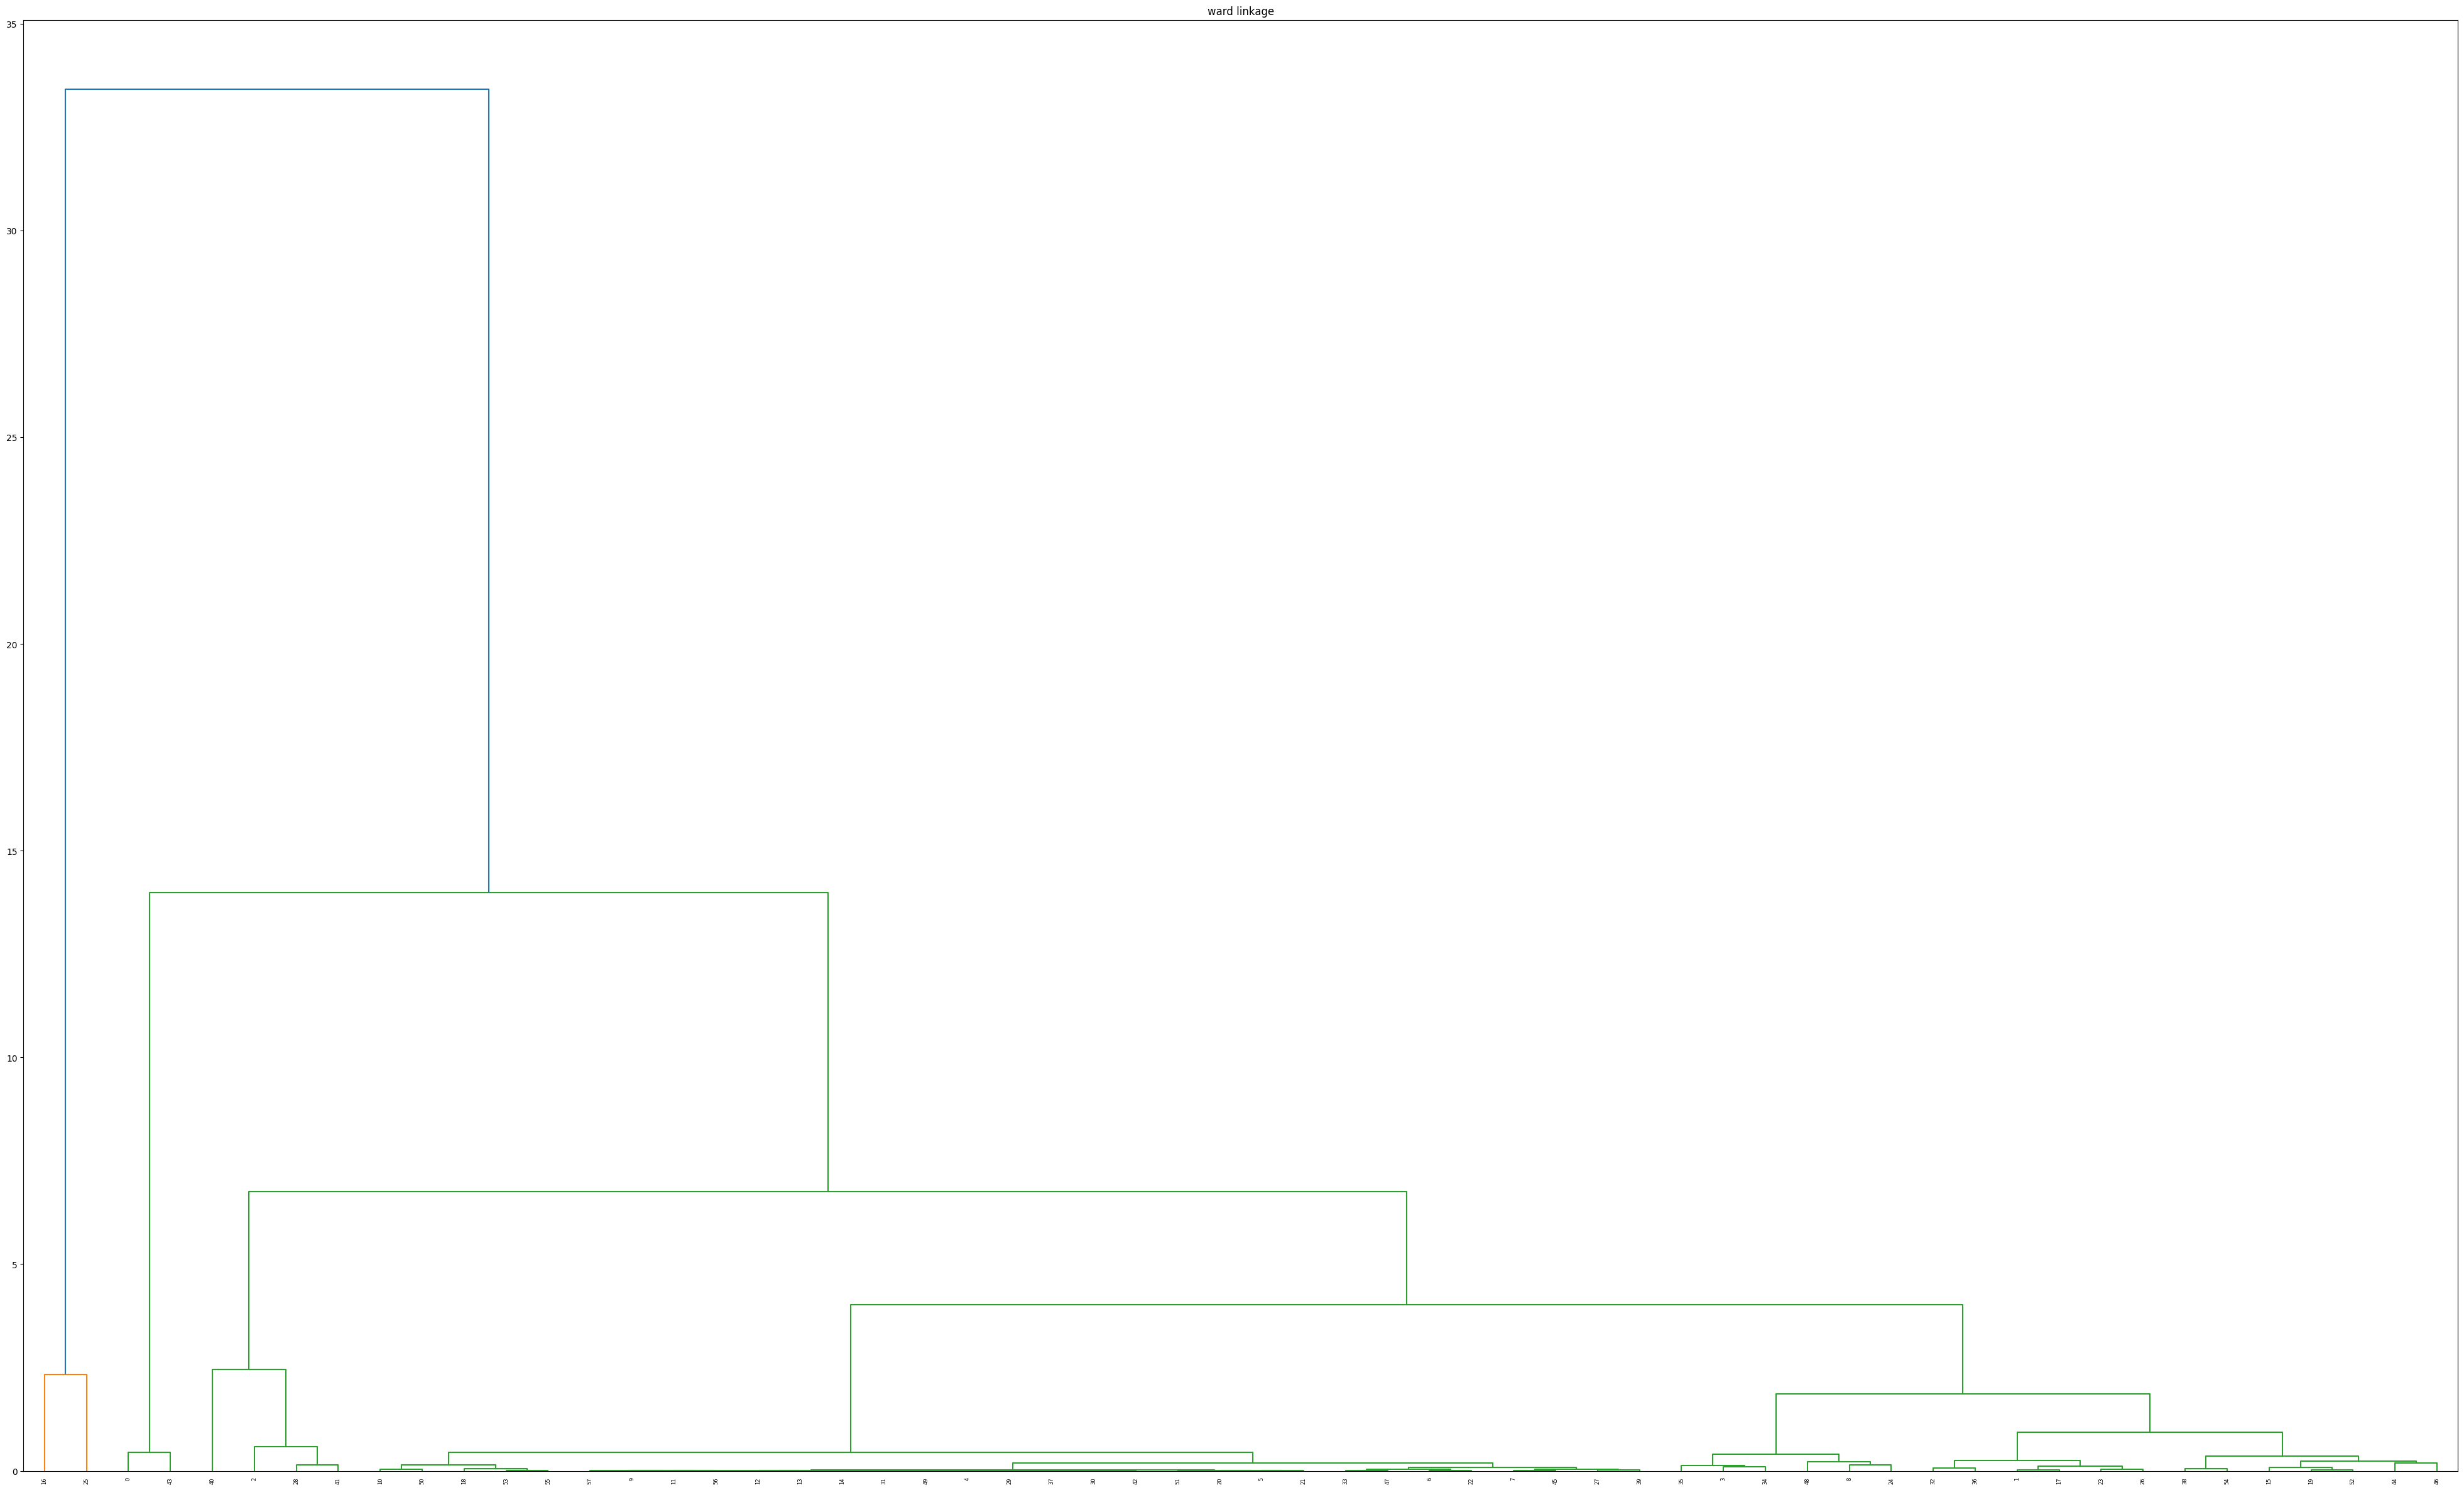

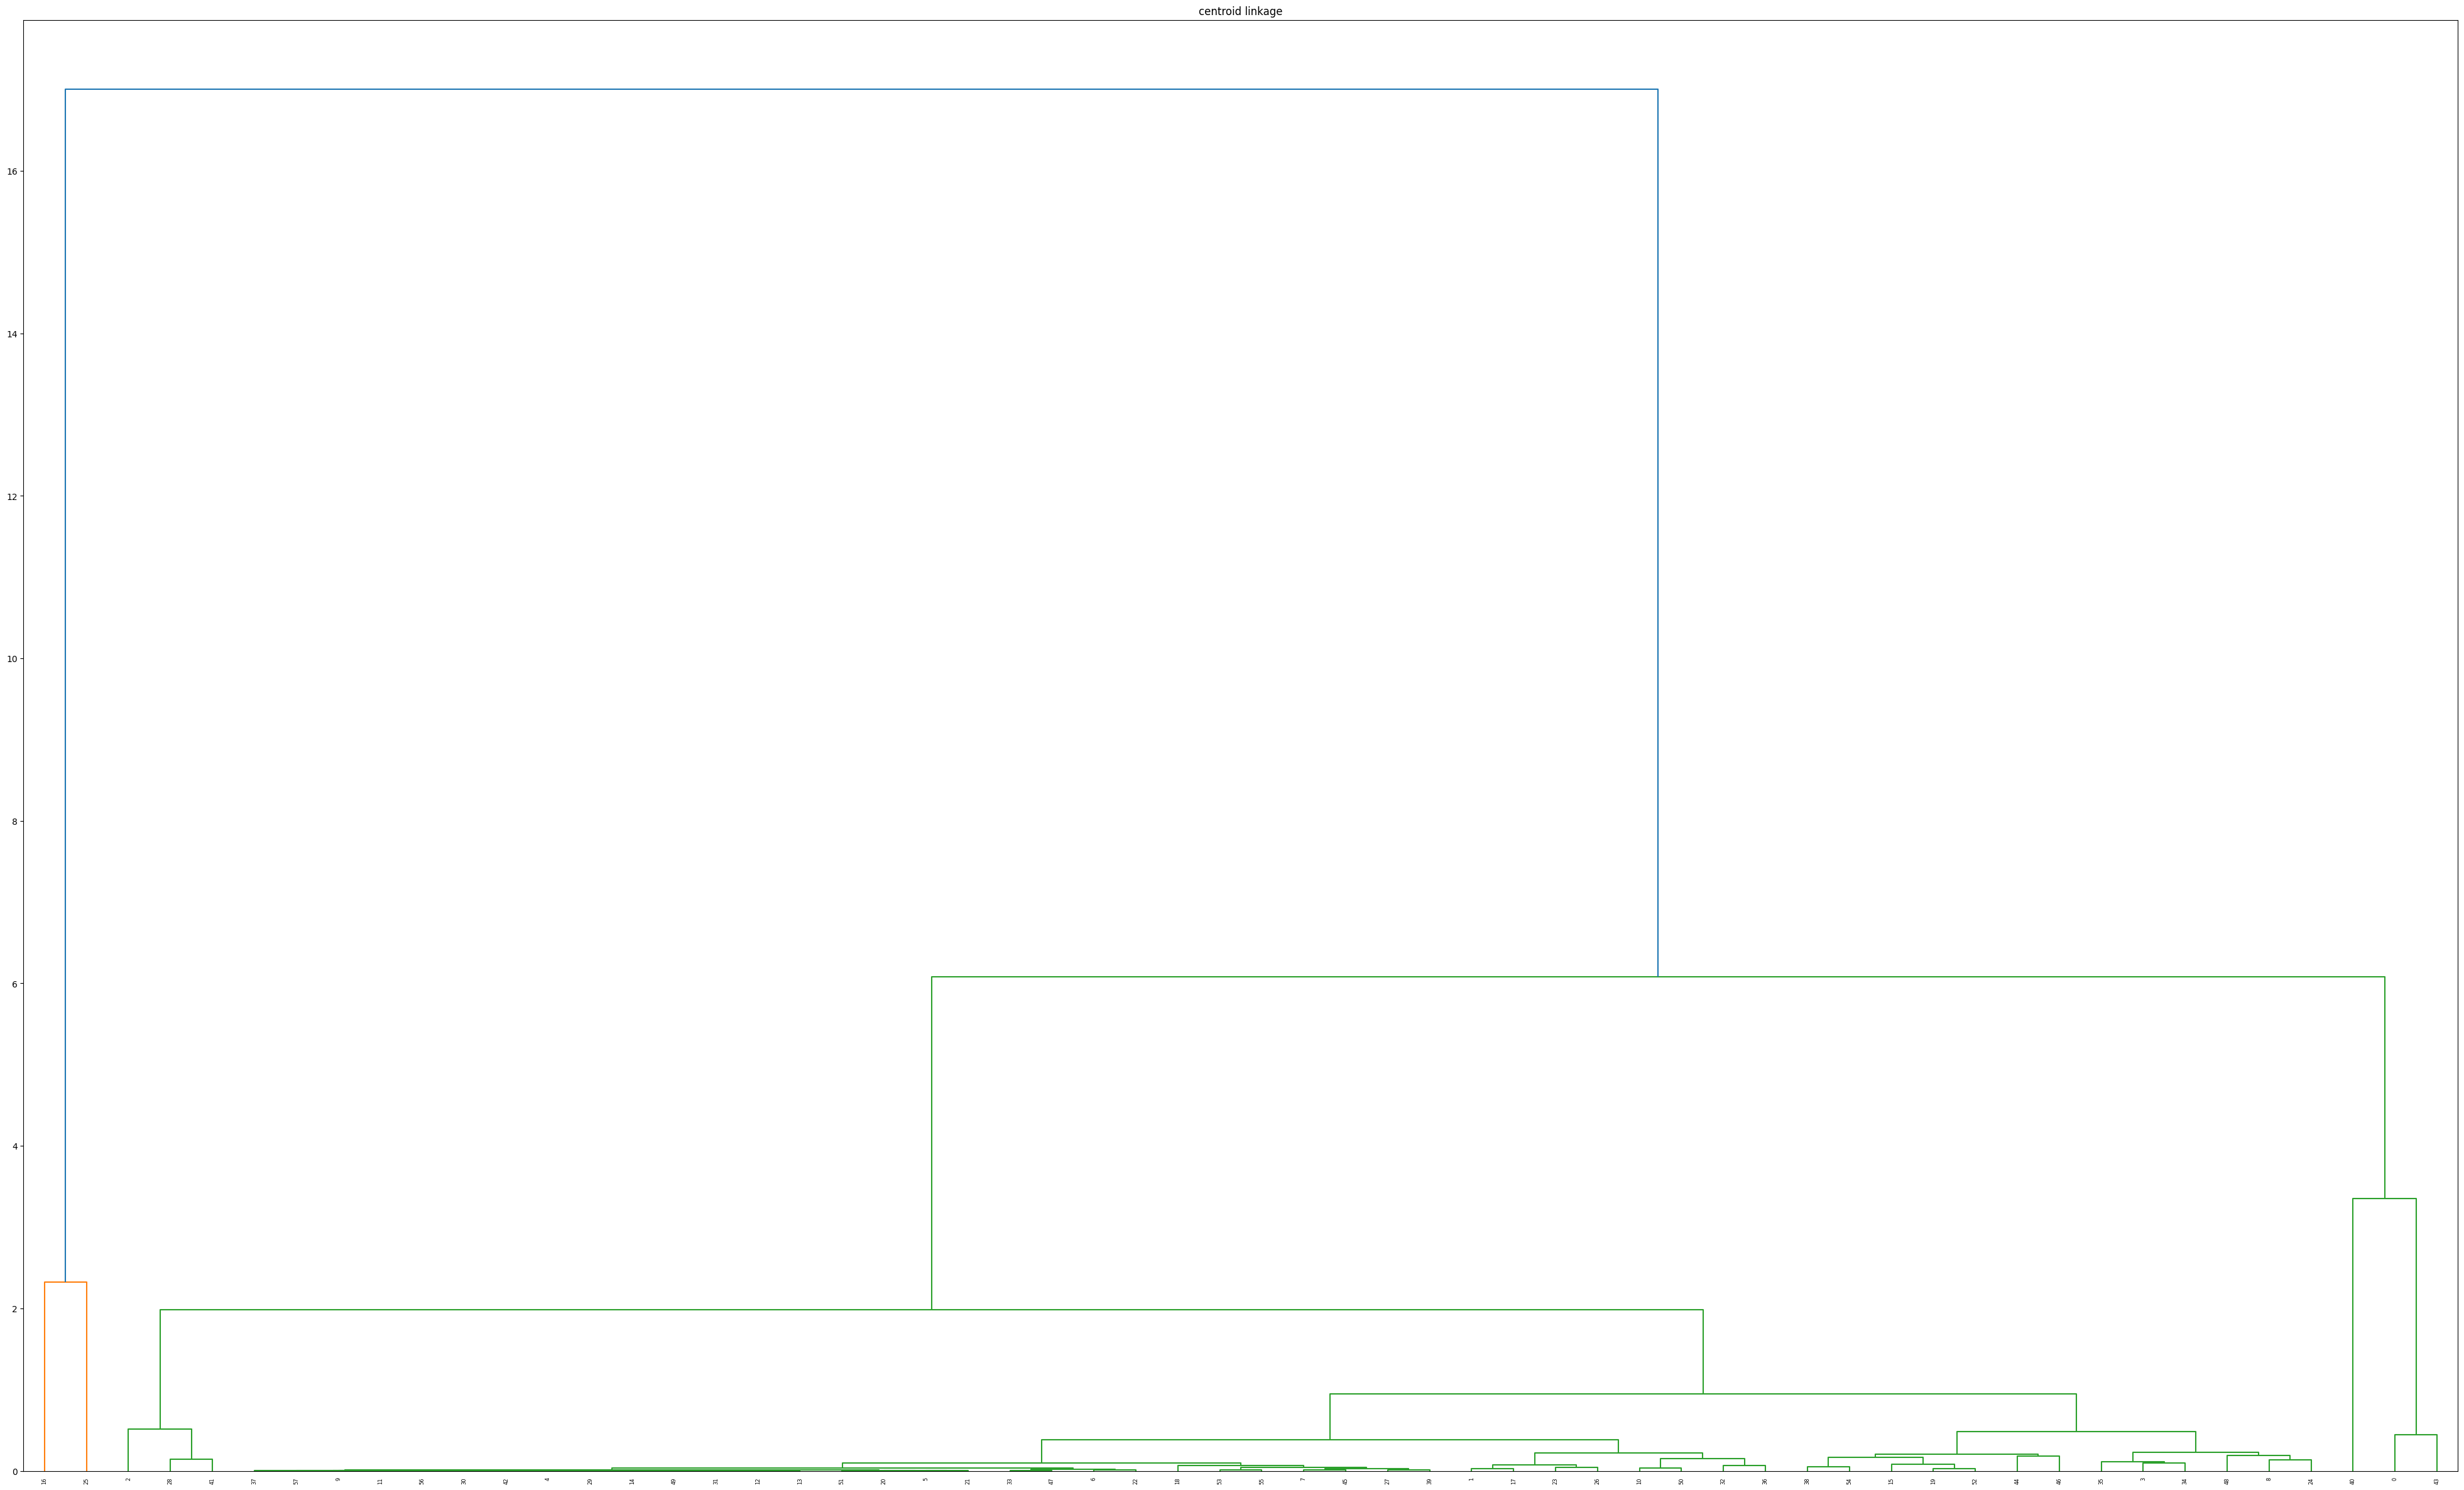

In [31]:
dataset = pd.read_csv('gene.csv')
dataset = dataset.drop(['ID_REF'], axis=1)

dataset = dataset.to_numpy()
print(dataset.shape)

def standardize(data):
    mean = np.mean(data, axis=0)
    std = np.std(data, axis=0)
    return (data - mean) / std

dataset = standardize(dataset)

hc_gene = HC(dataset)
hc_gene.fit('single', 'euclidean')
hc_gene.fit('complete', 'euclidean')
hc_gene.fit('average', 'euclidean')
hc_gene.fit('ward', 'euclidean')
hc_gene.fit('centroid', 'euclidean')

Varying Features

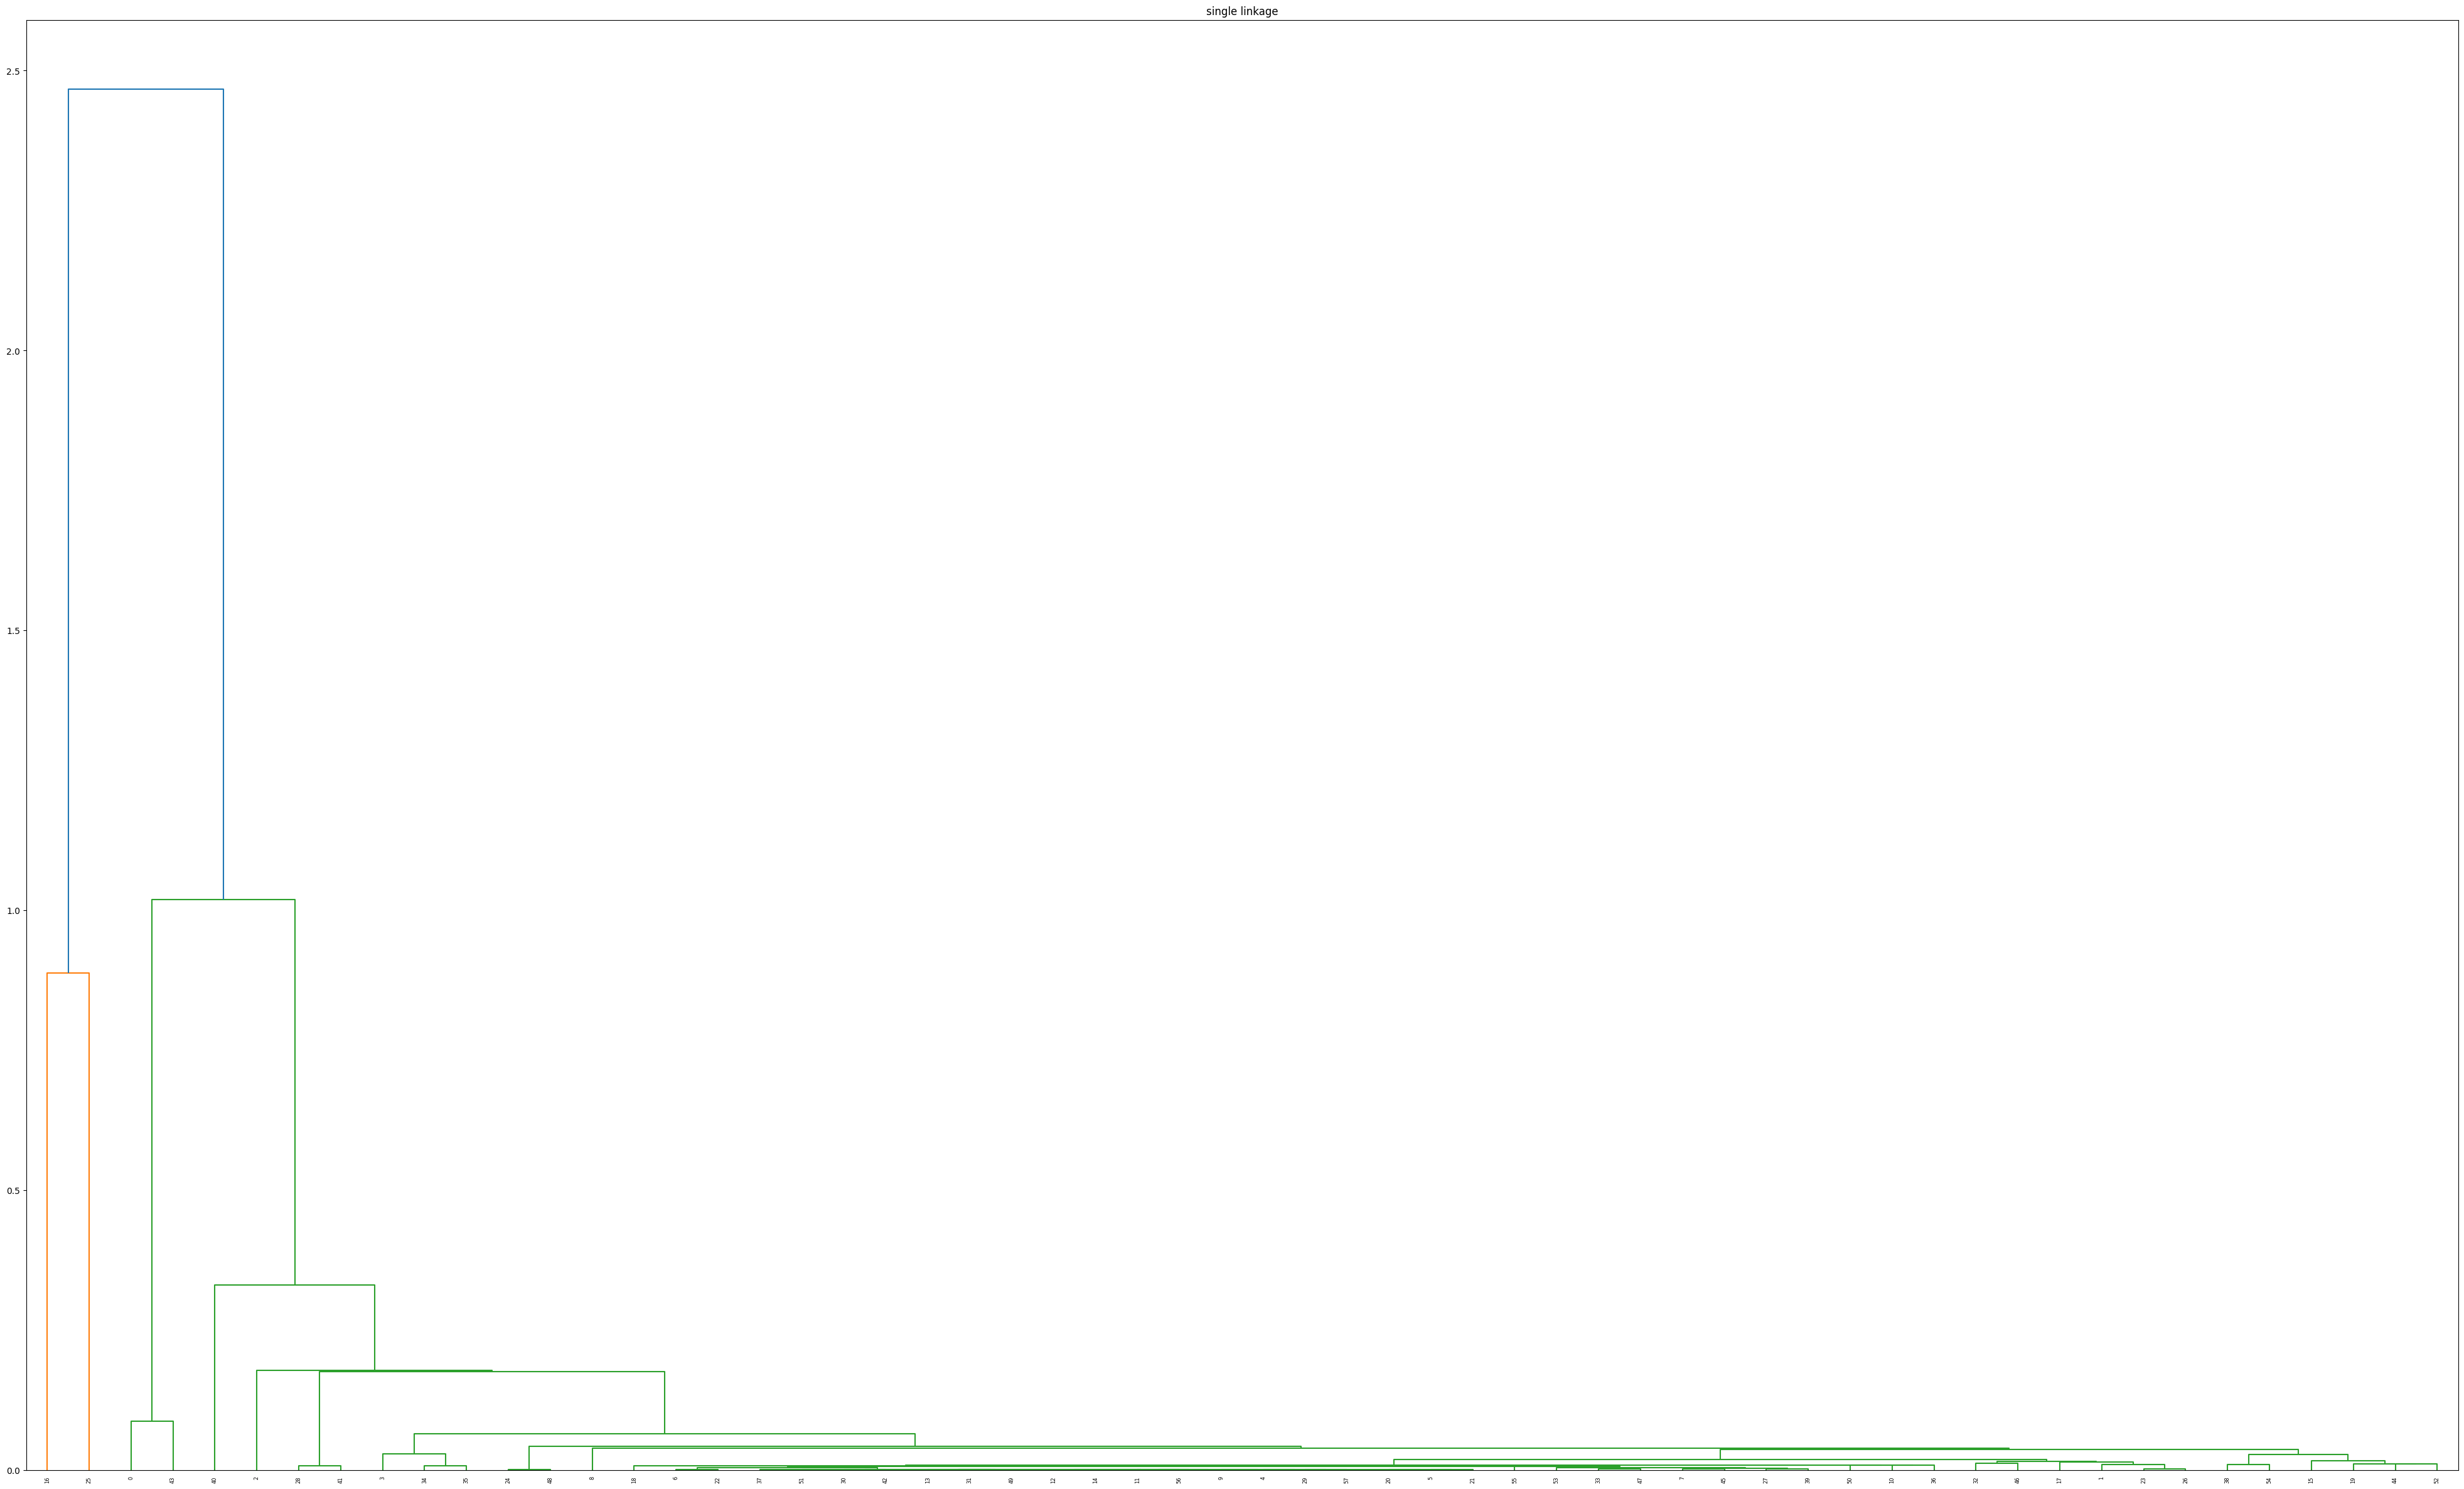

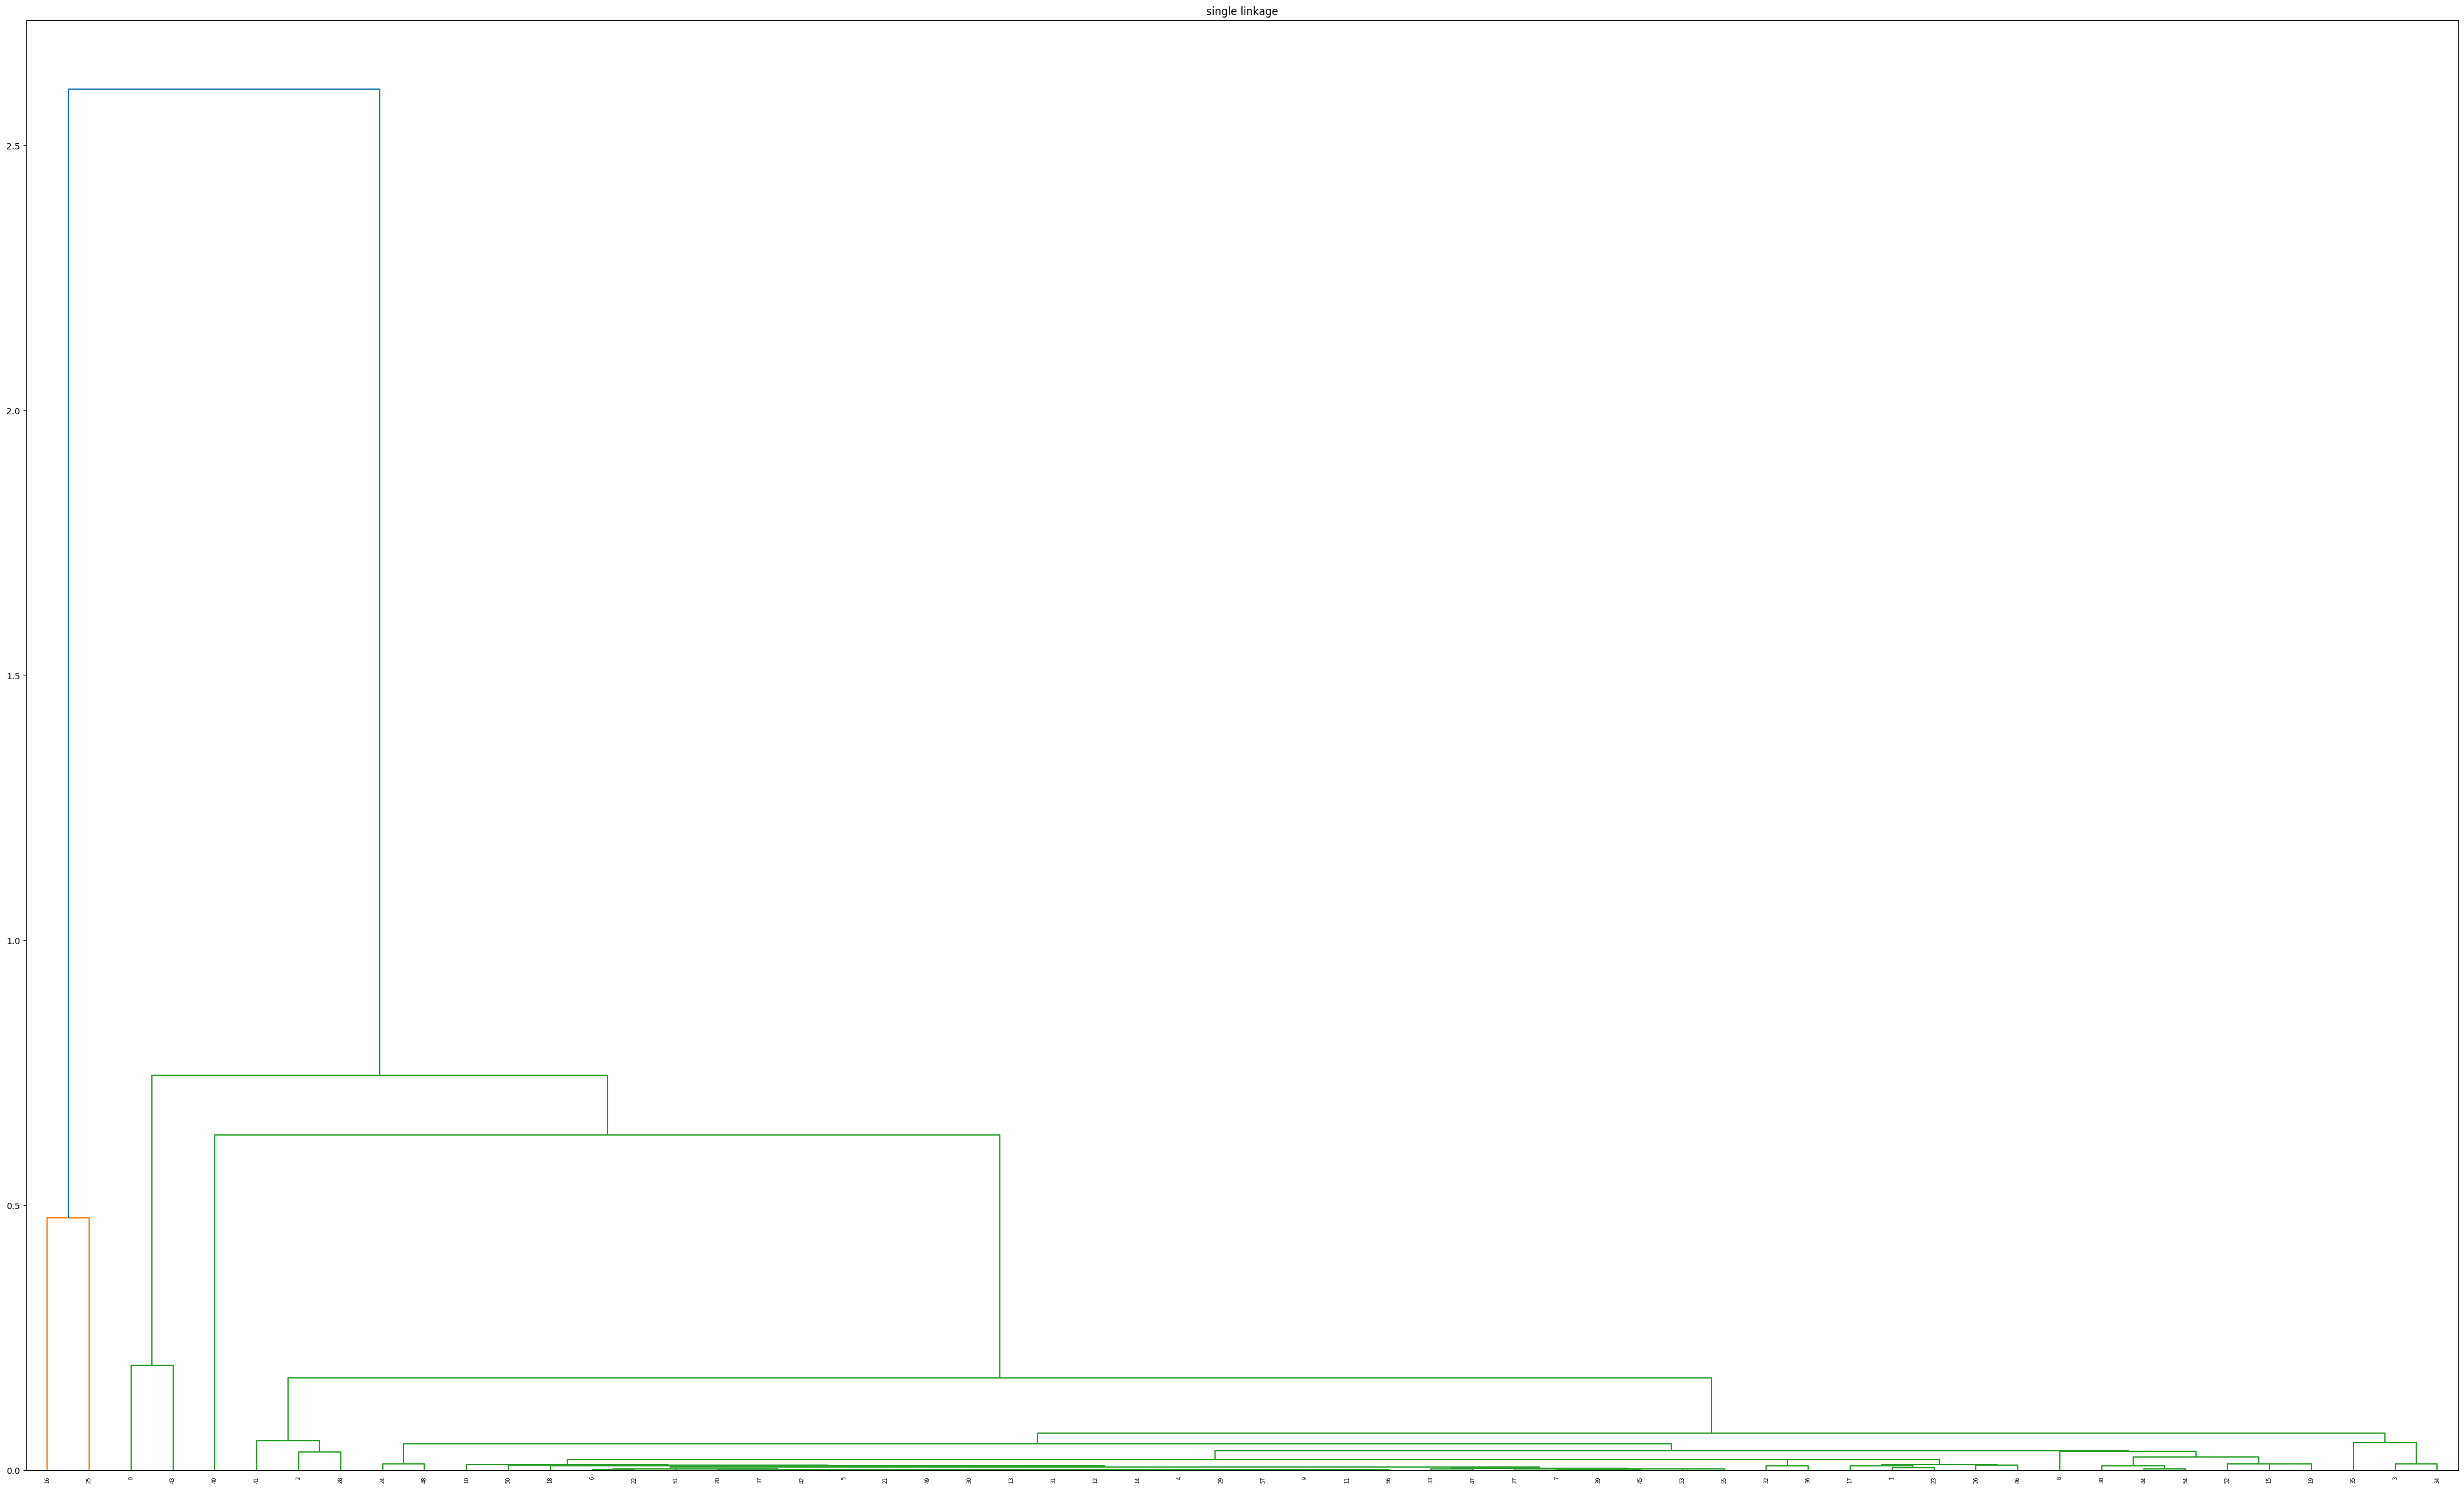

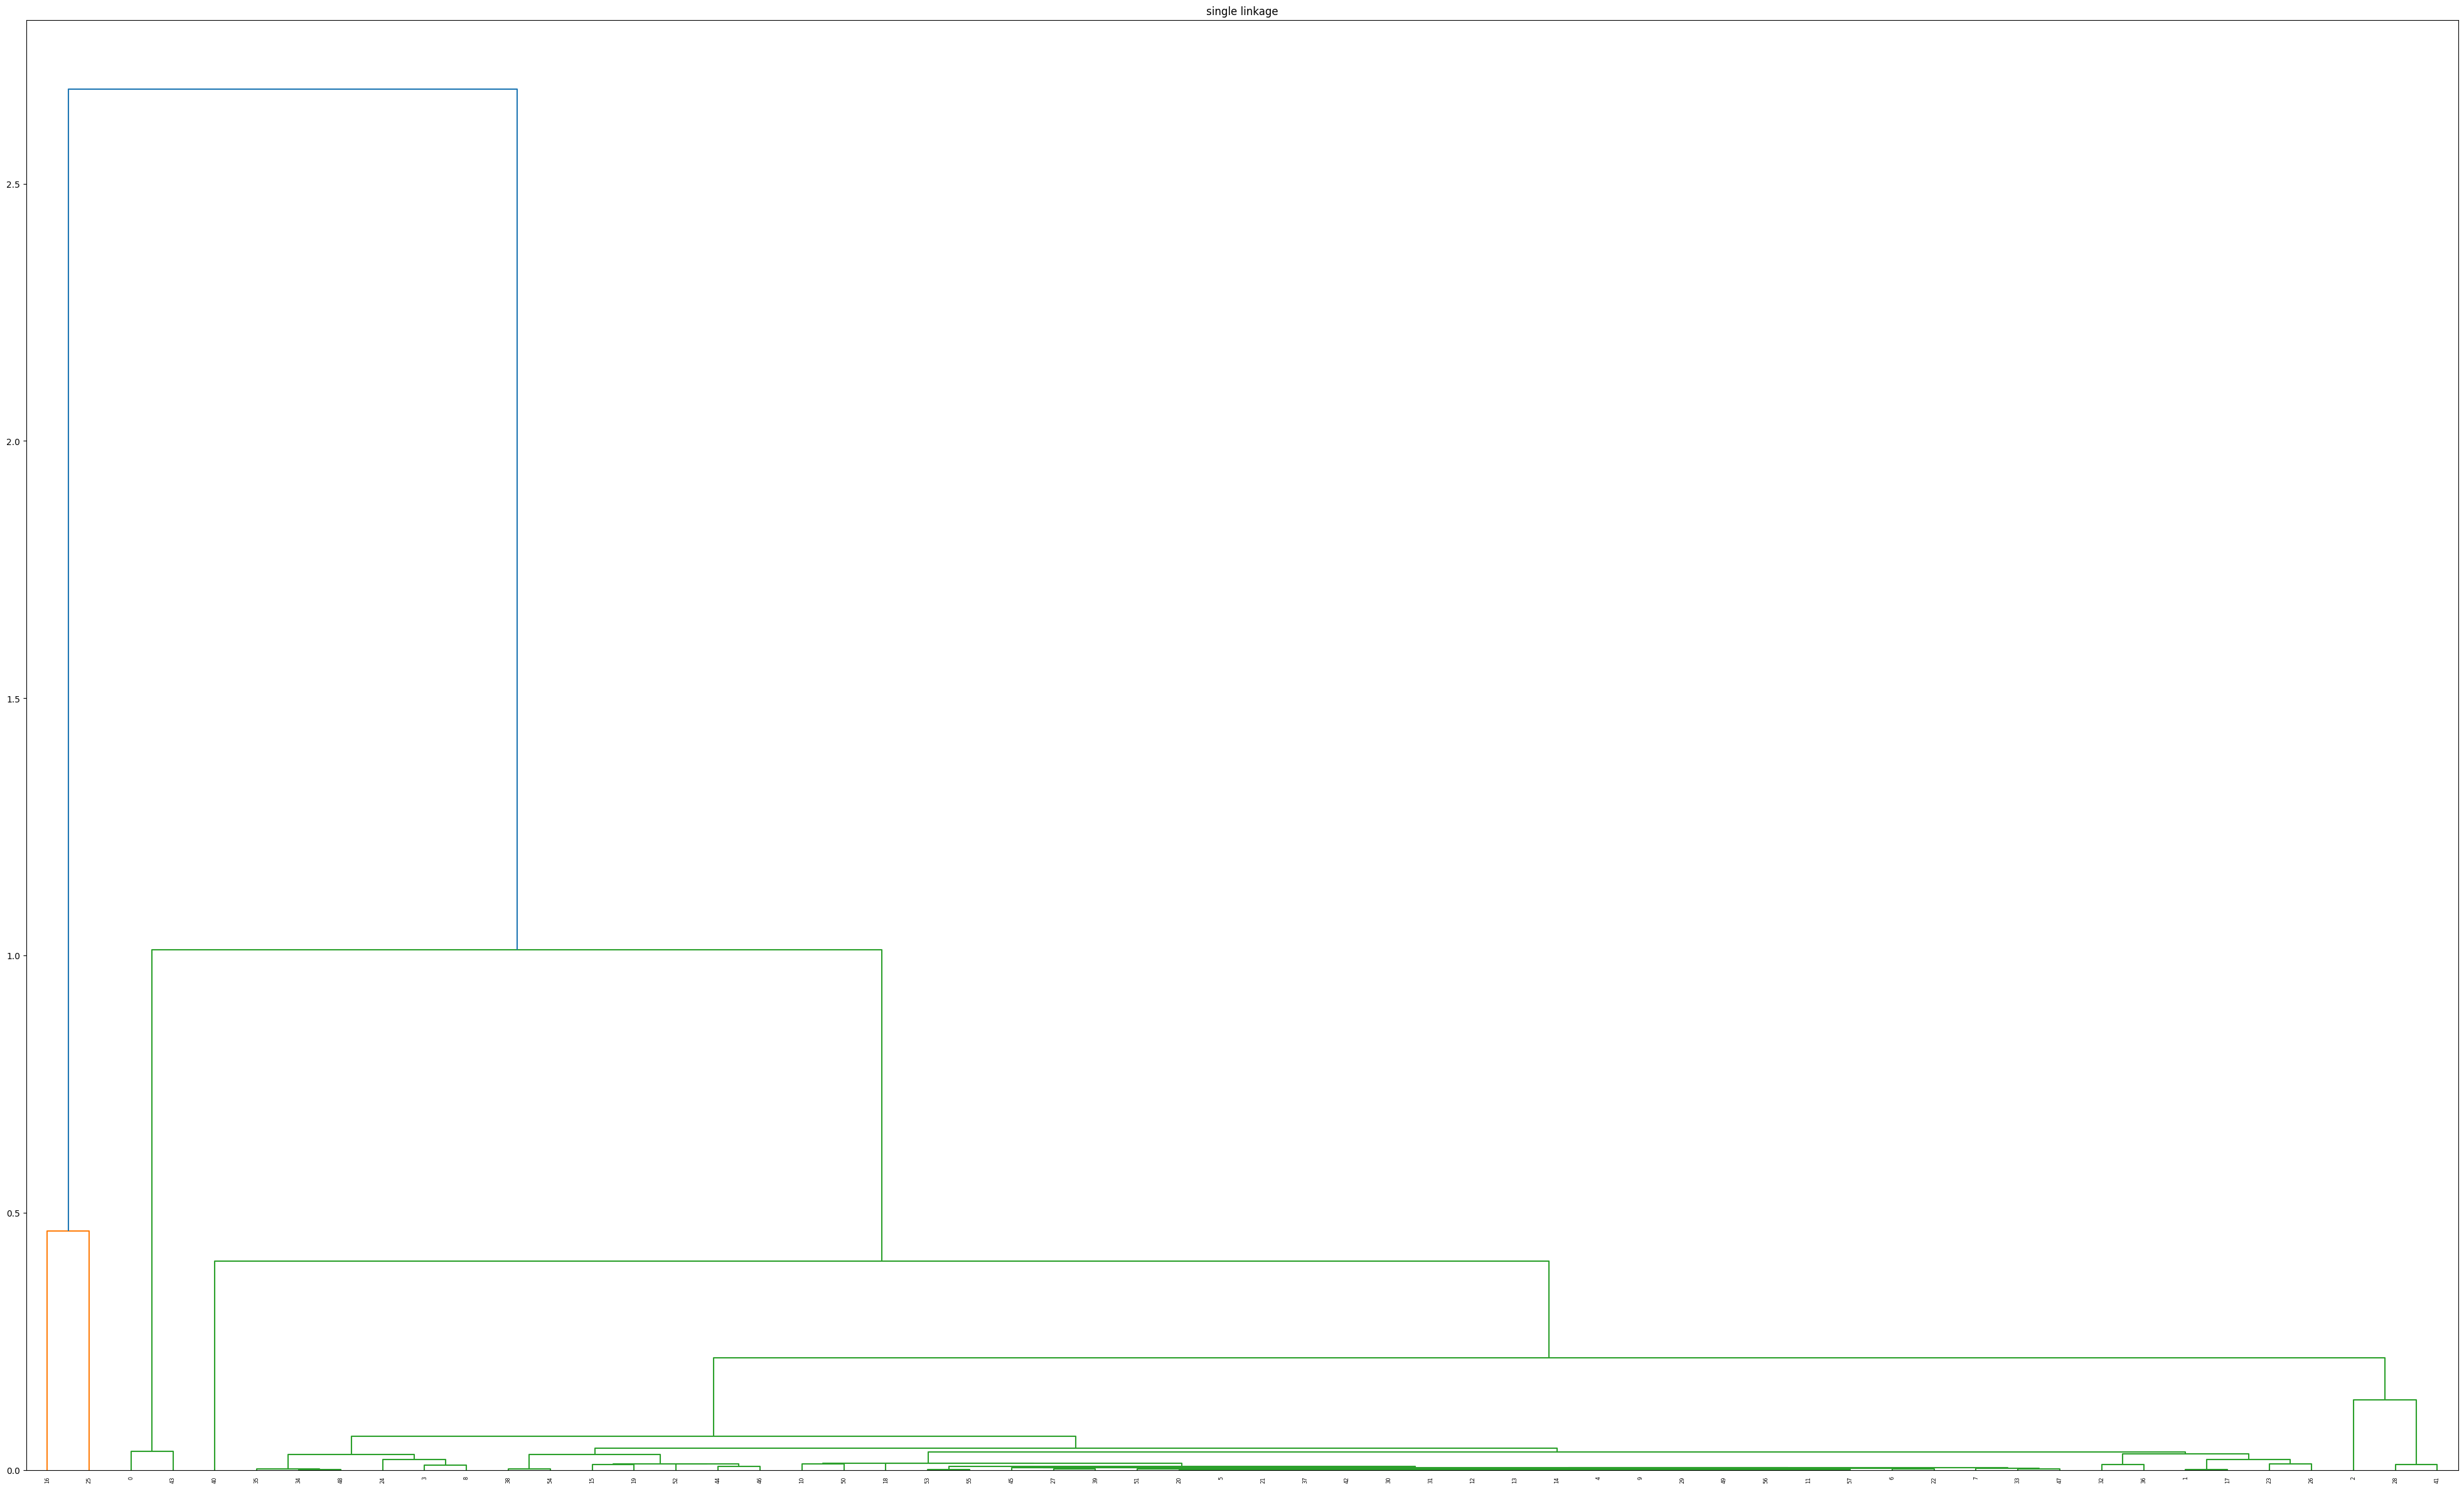

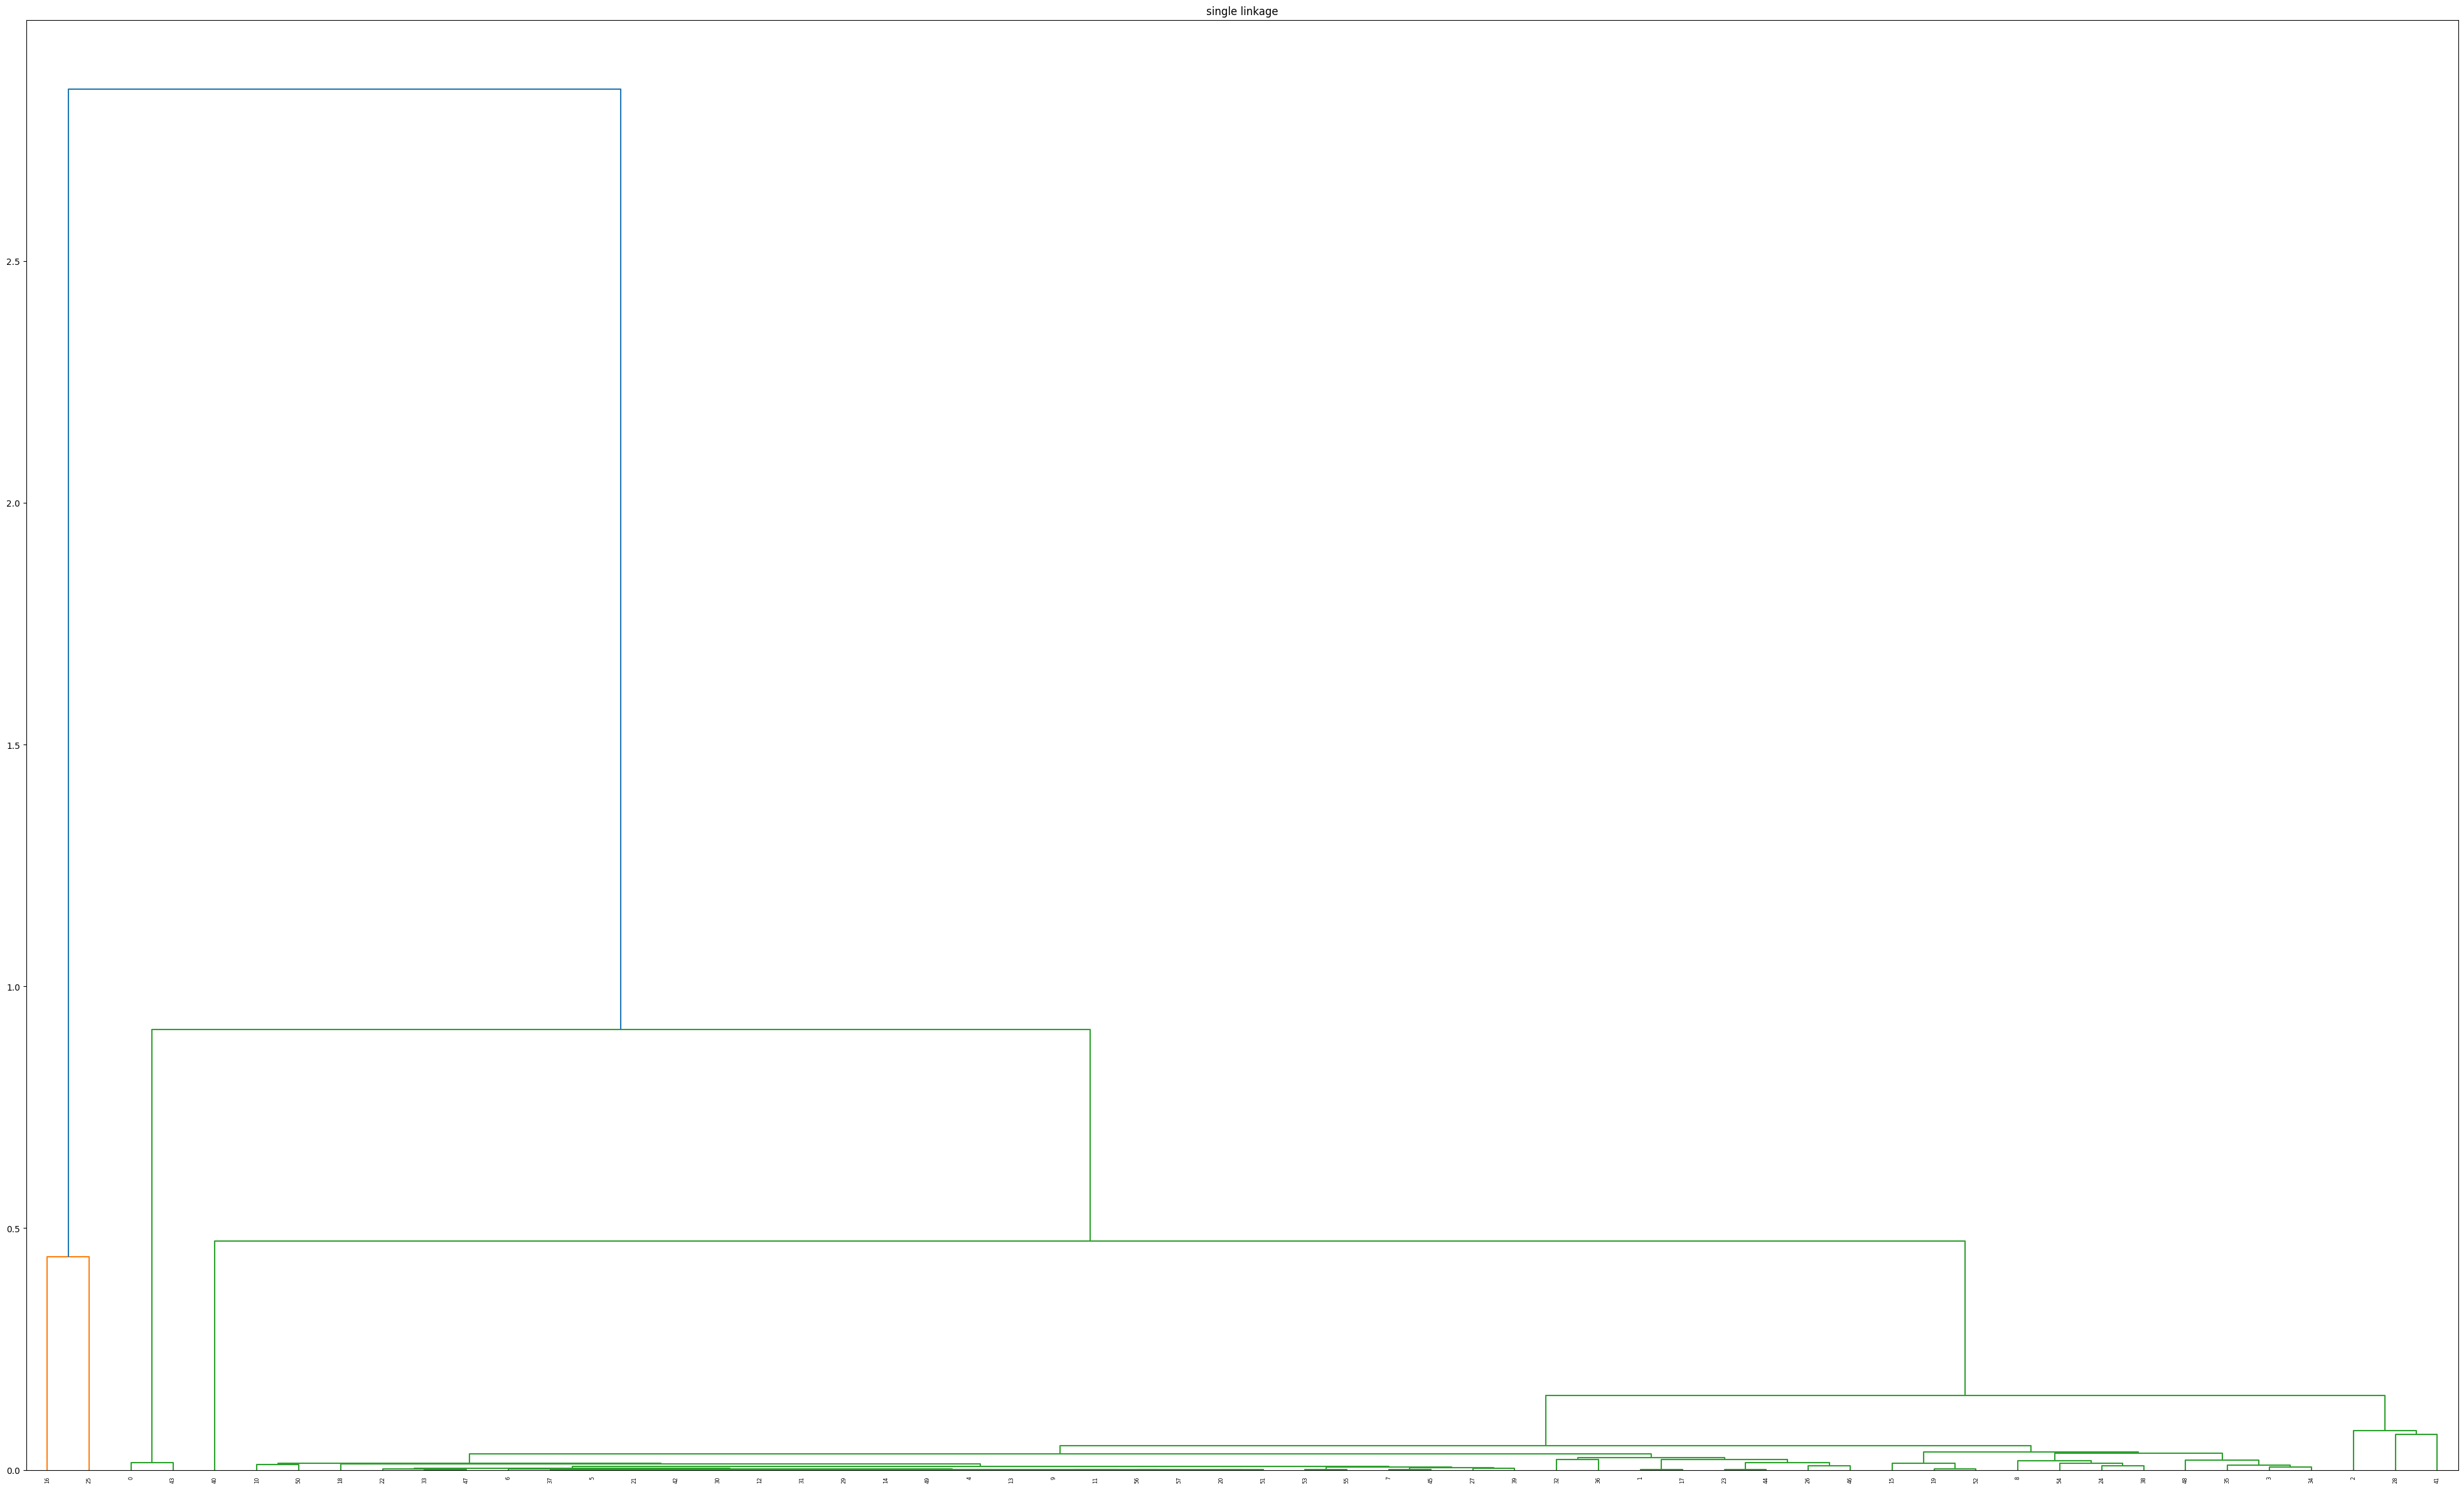

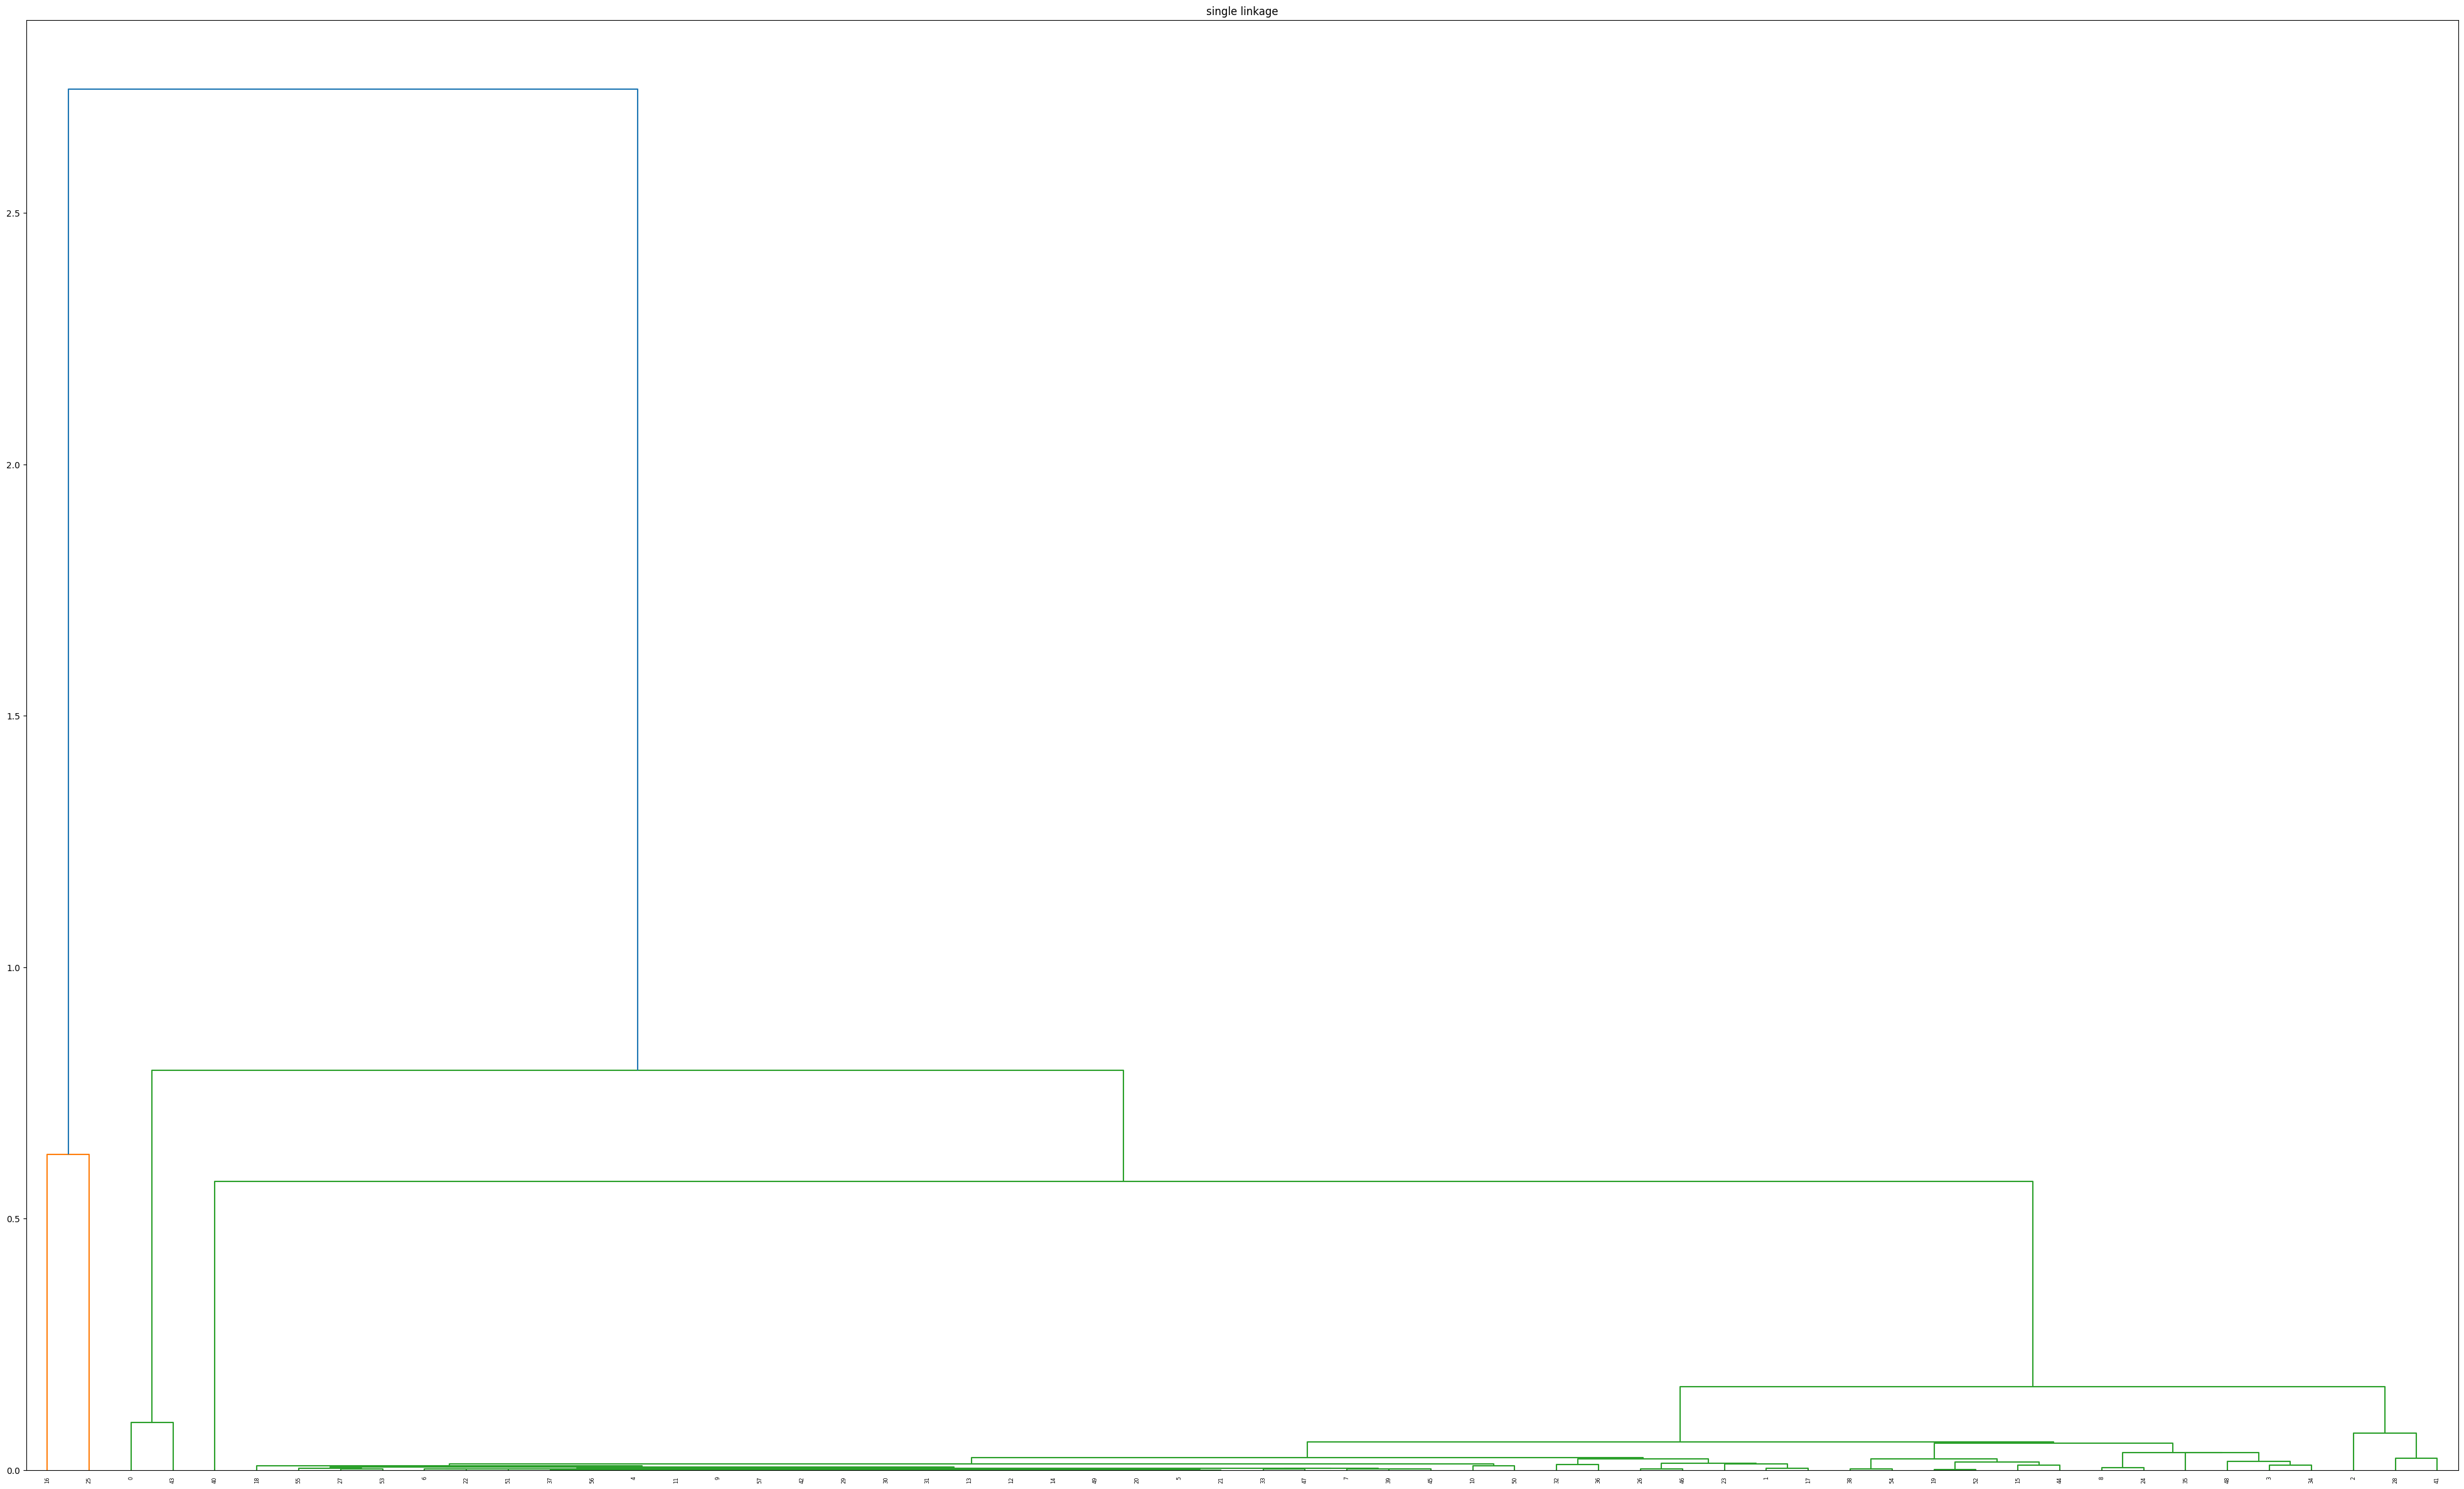

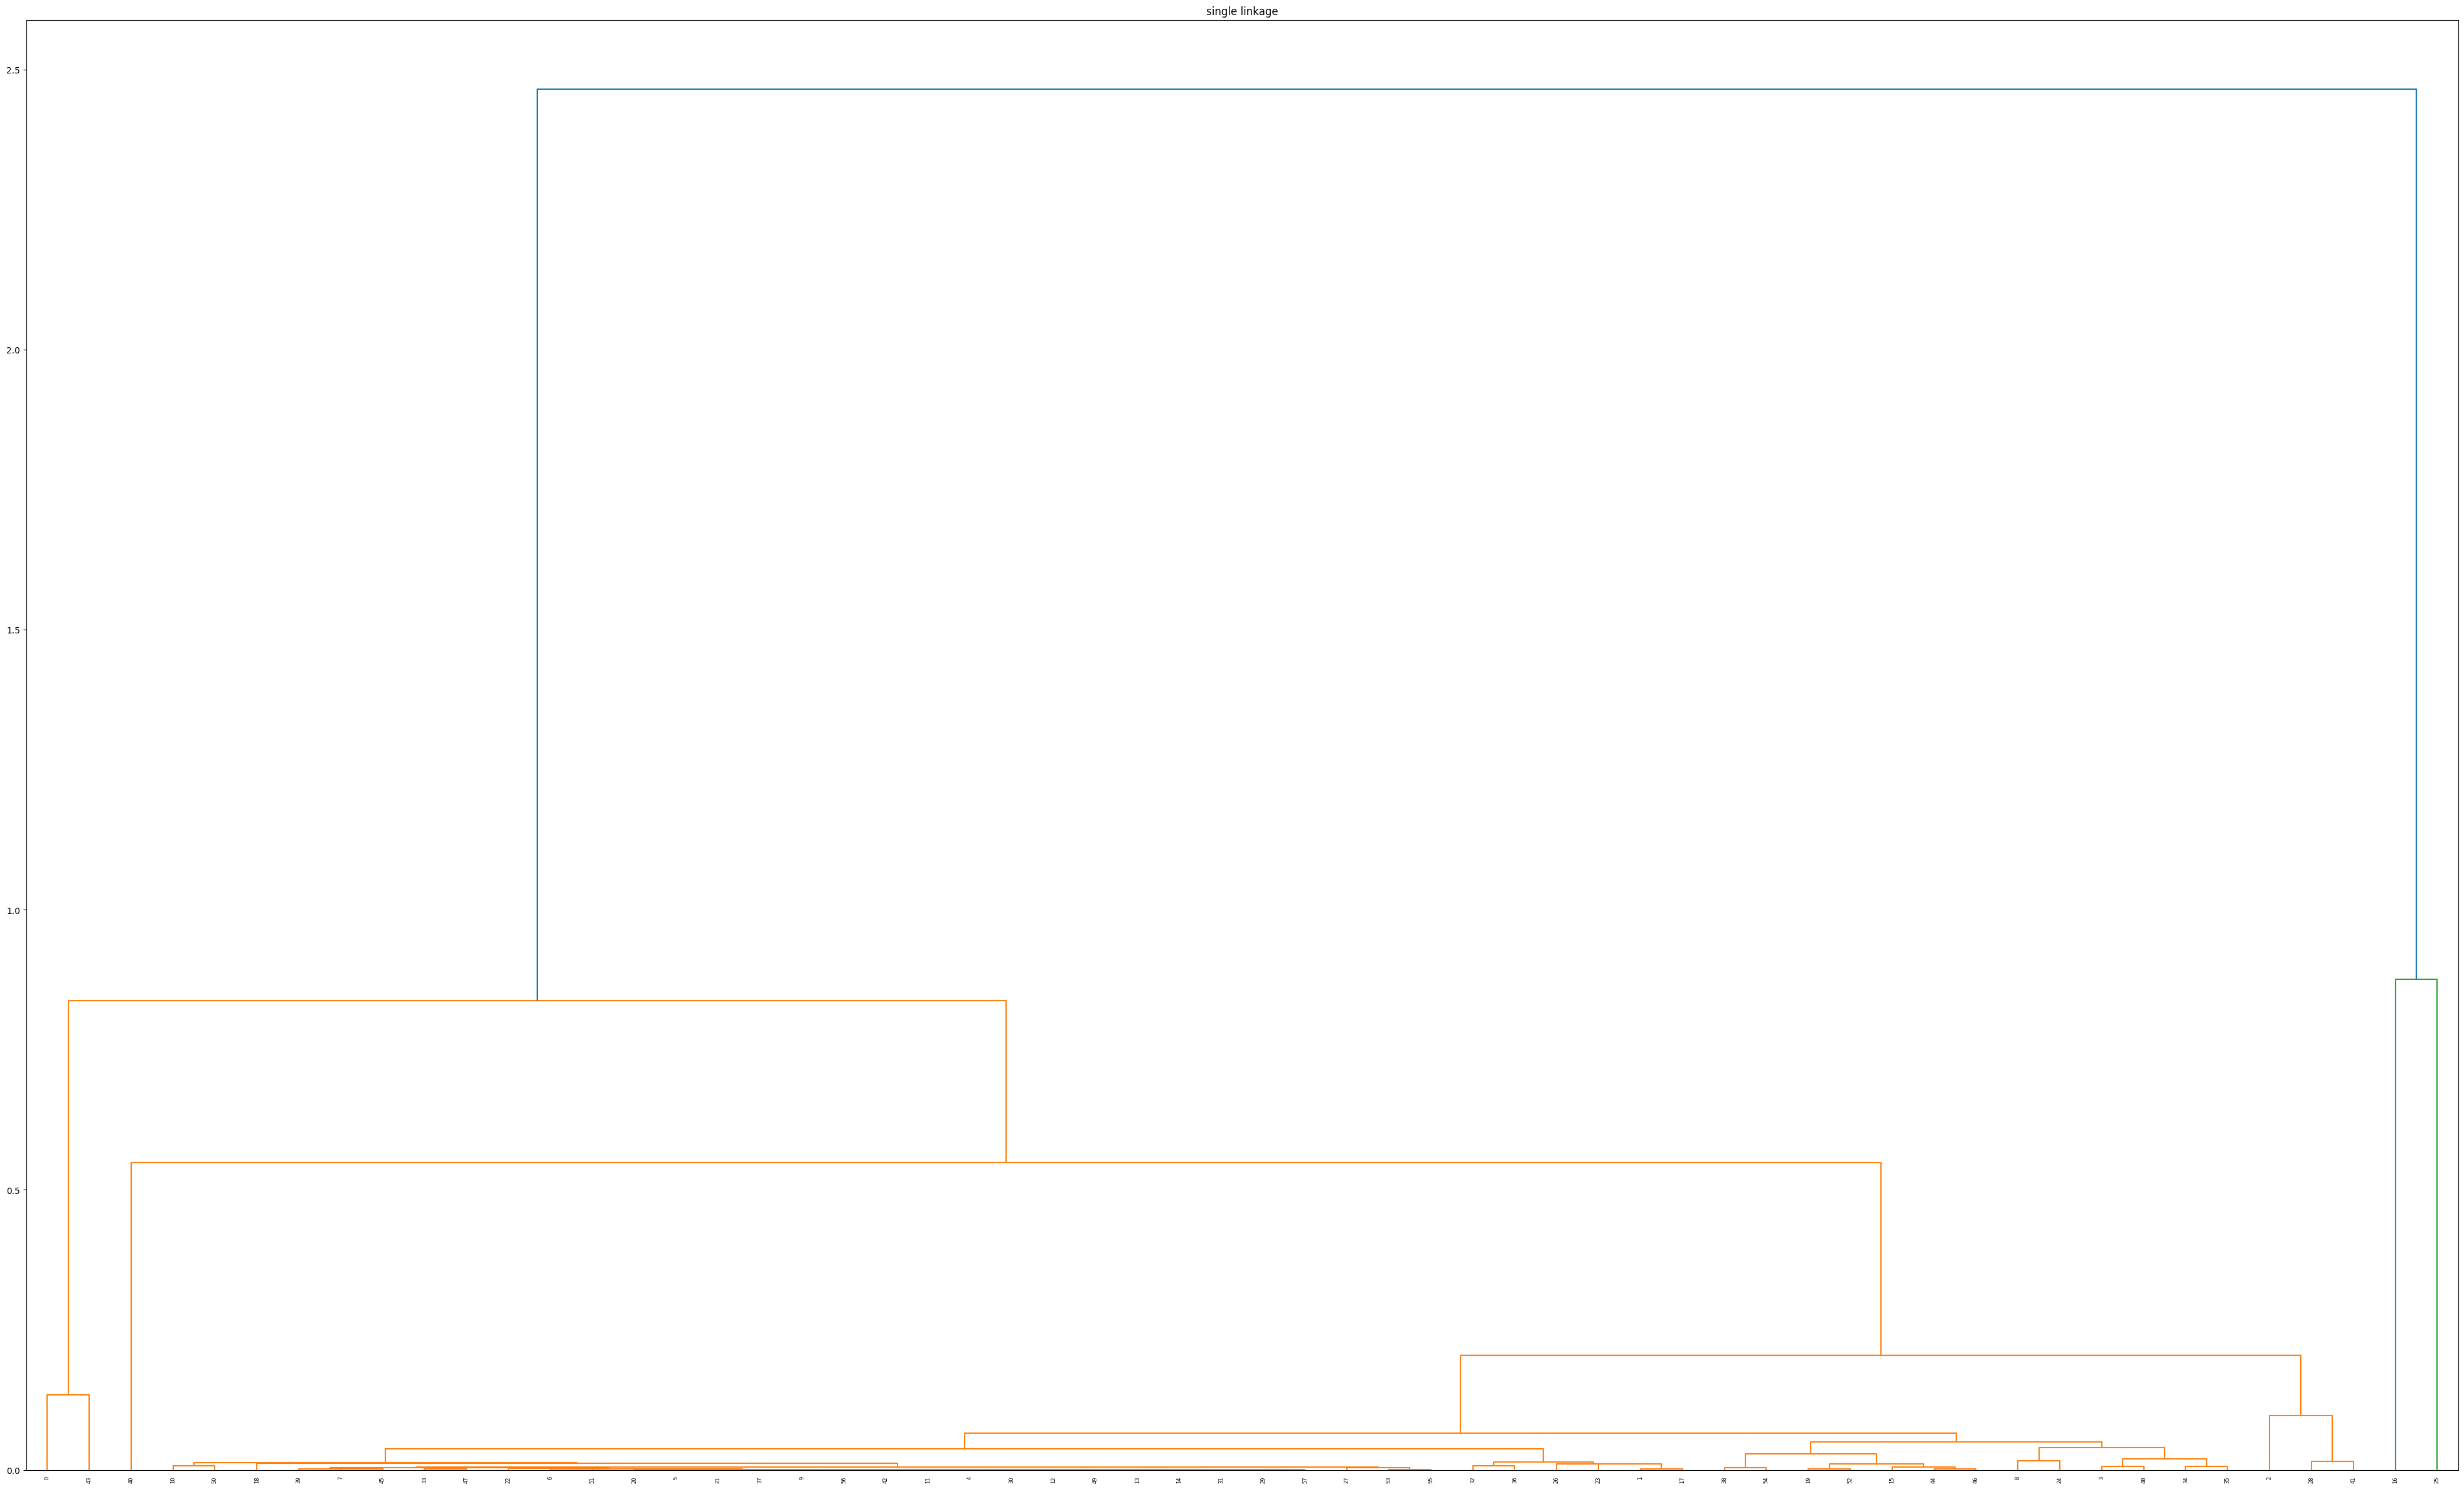

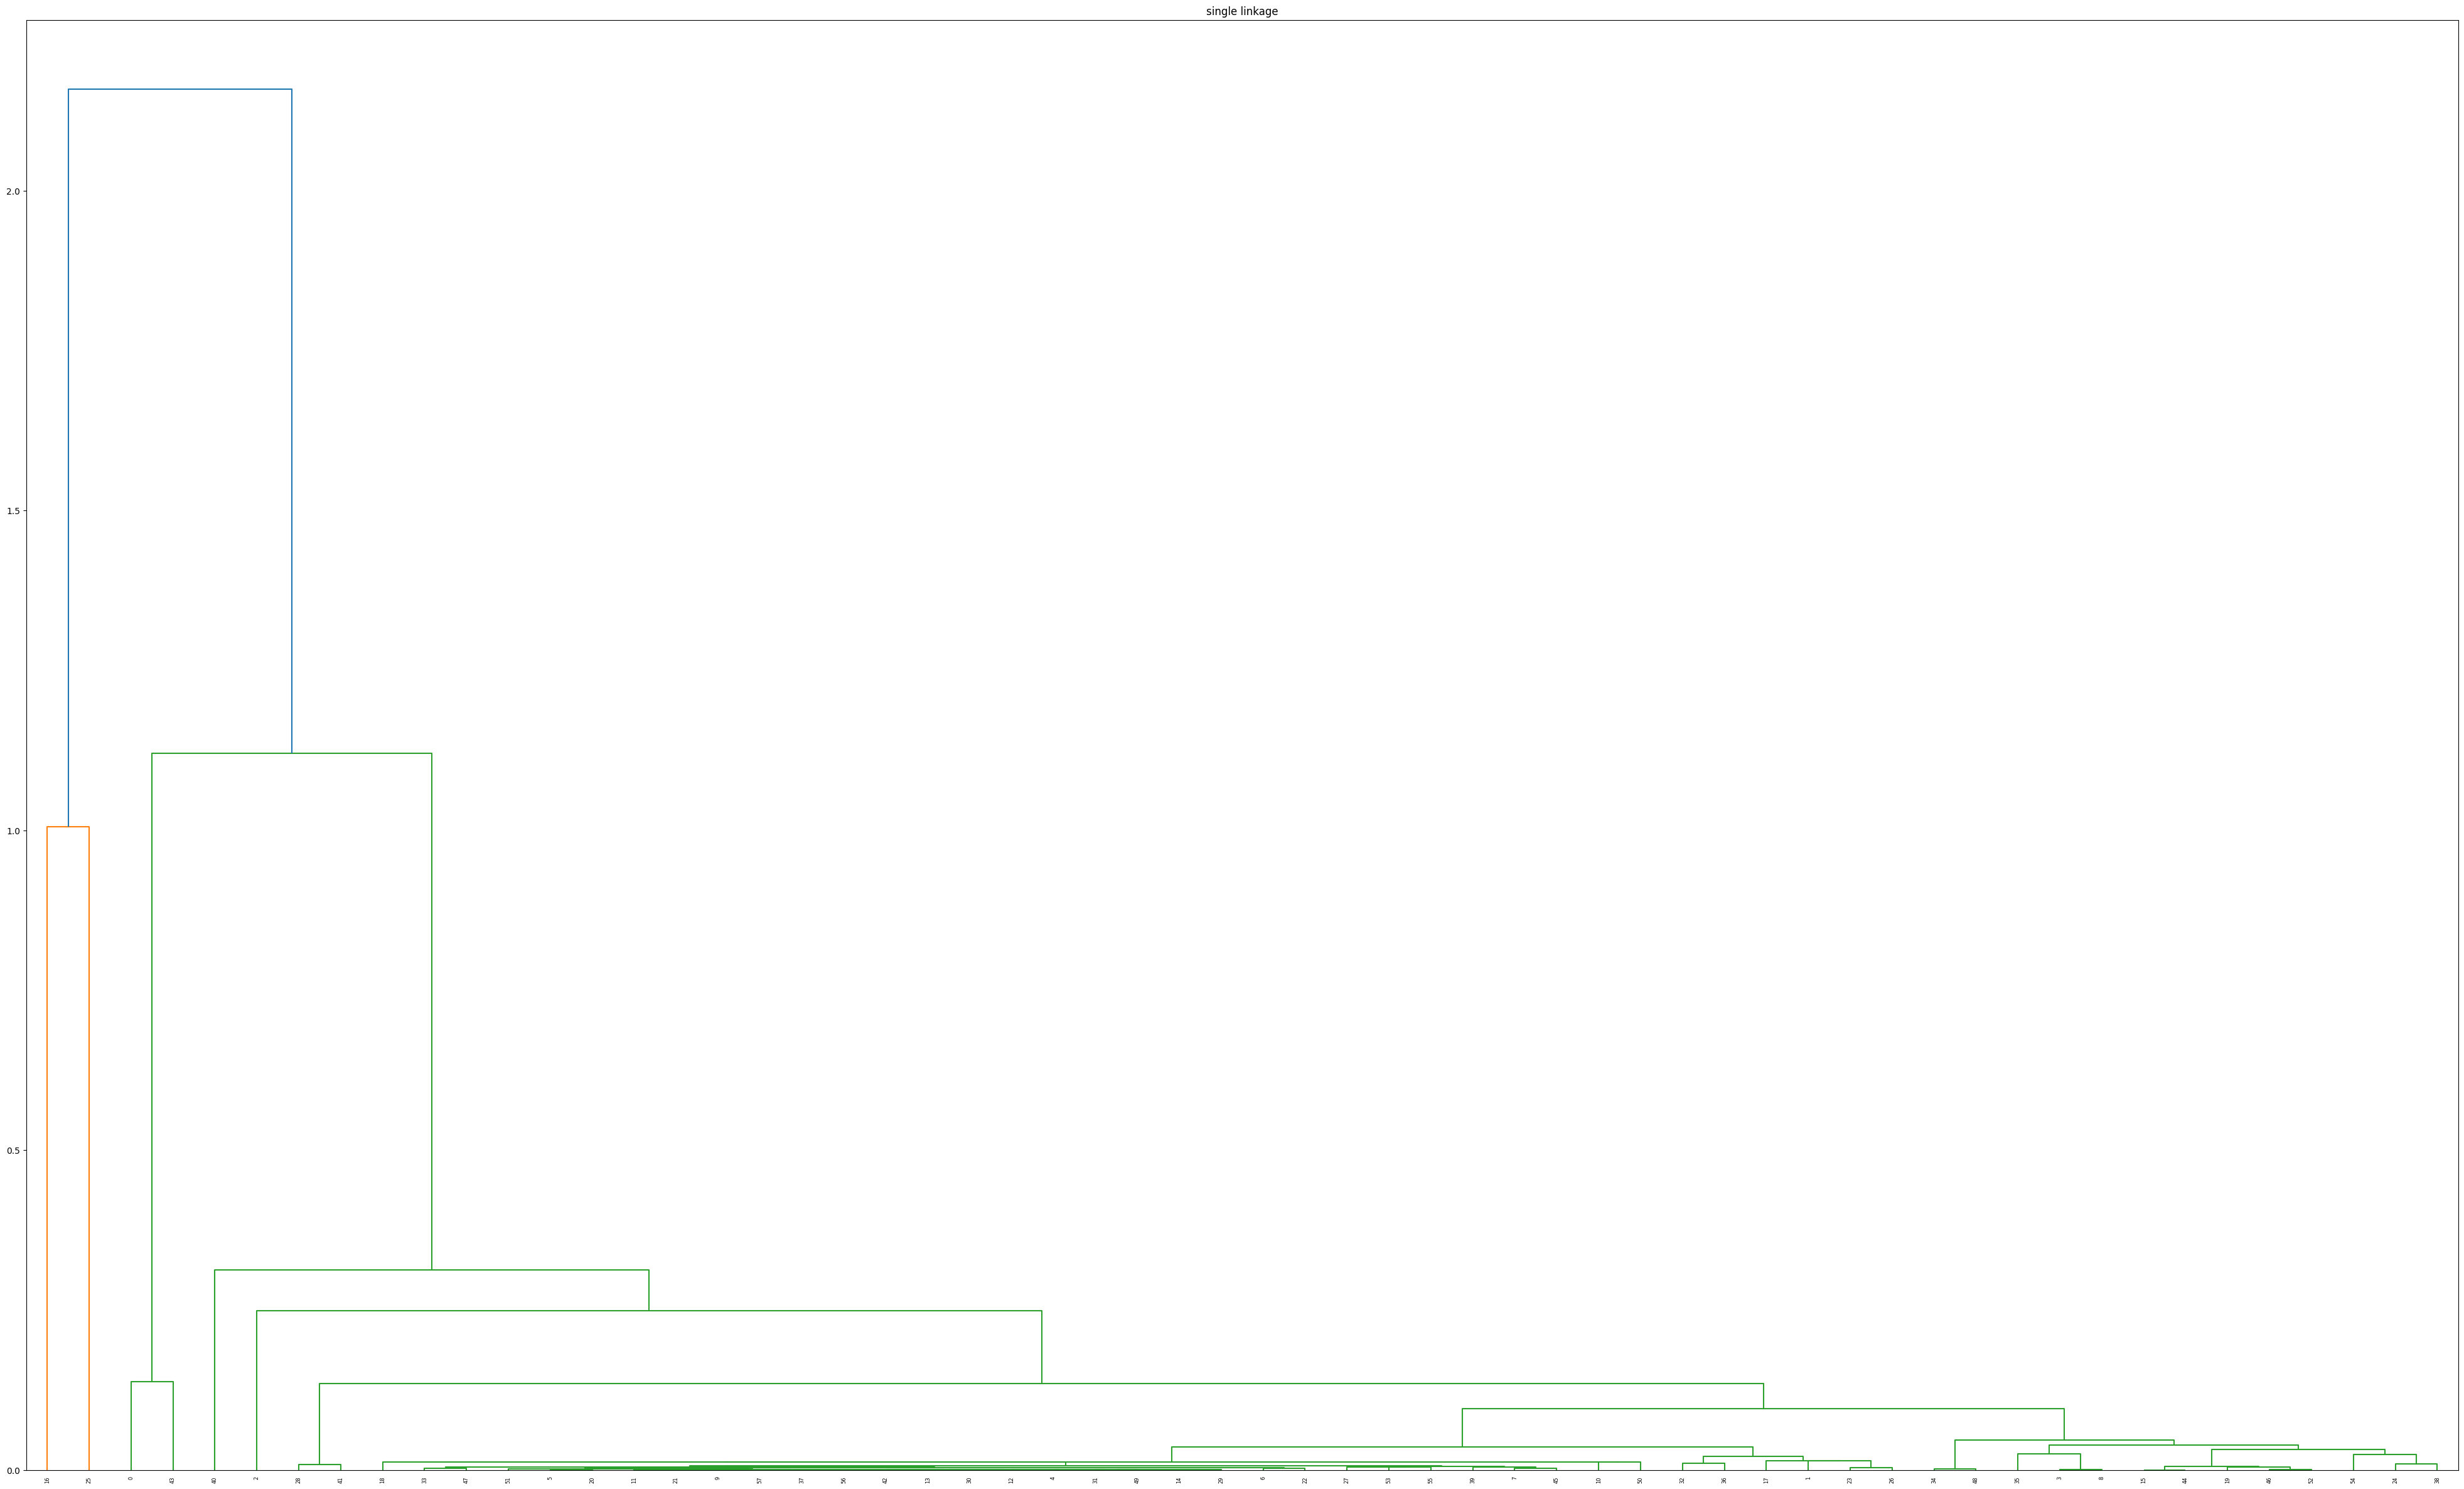

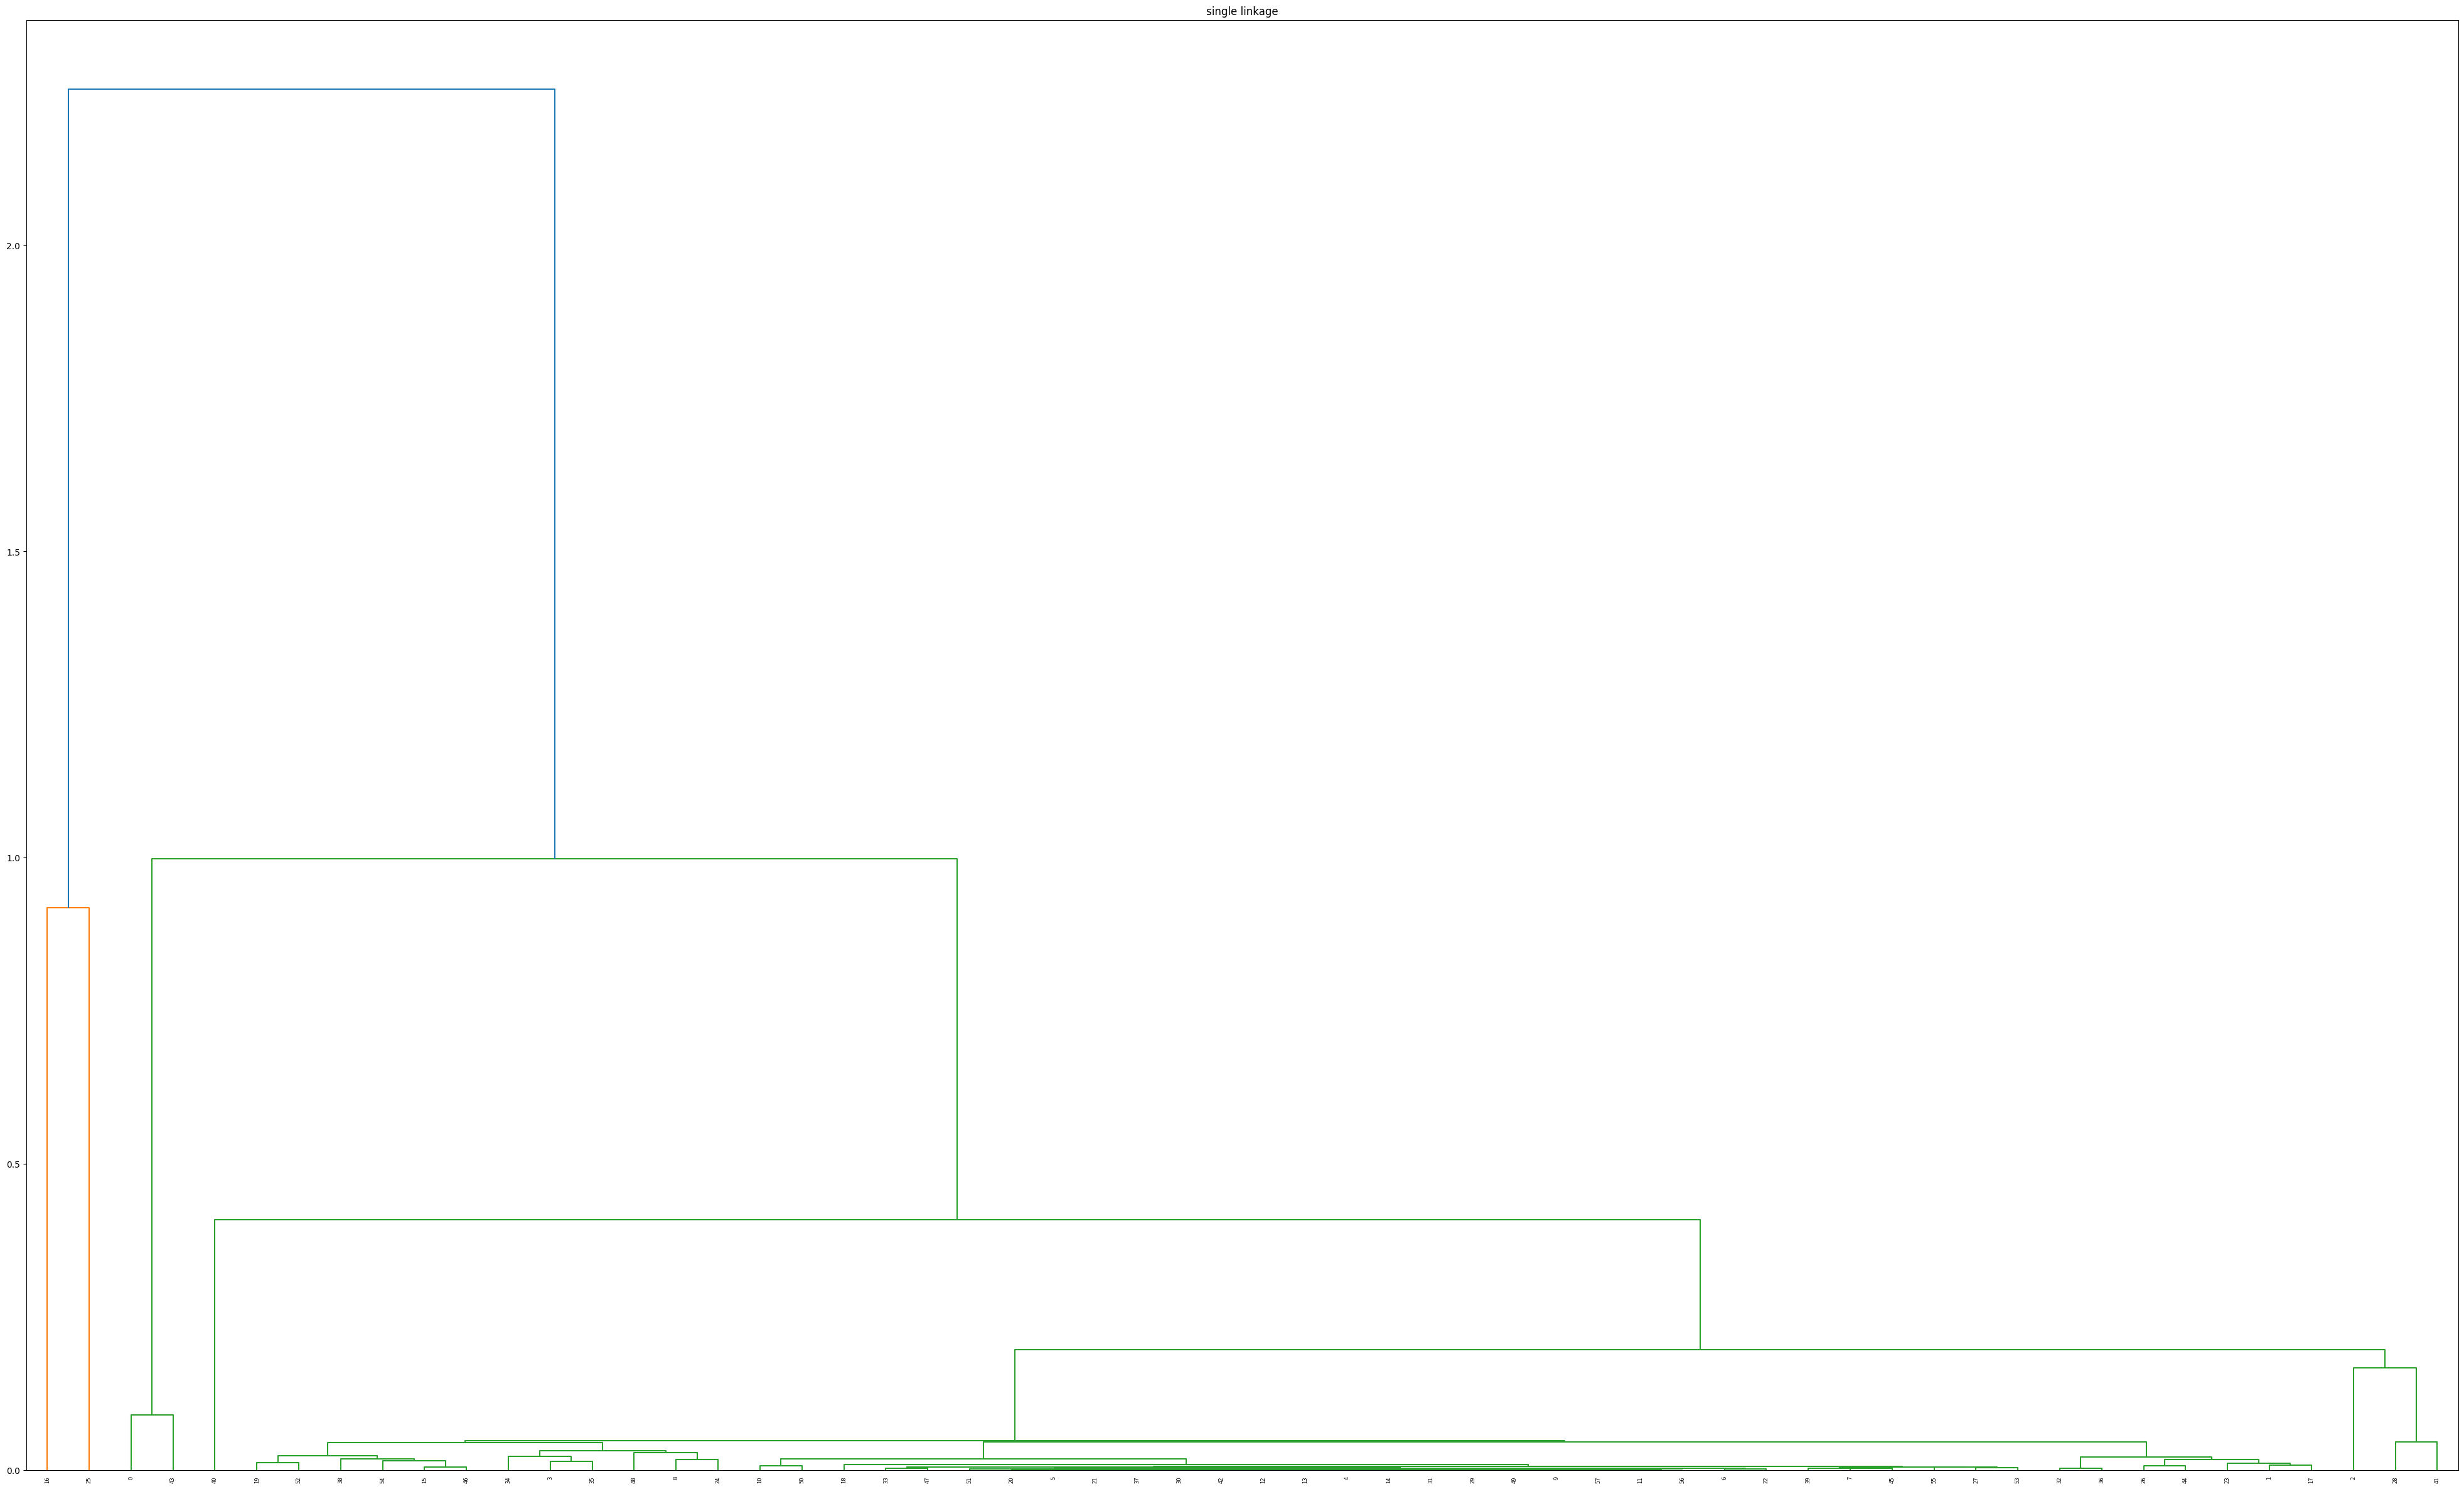

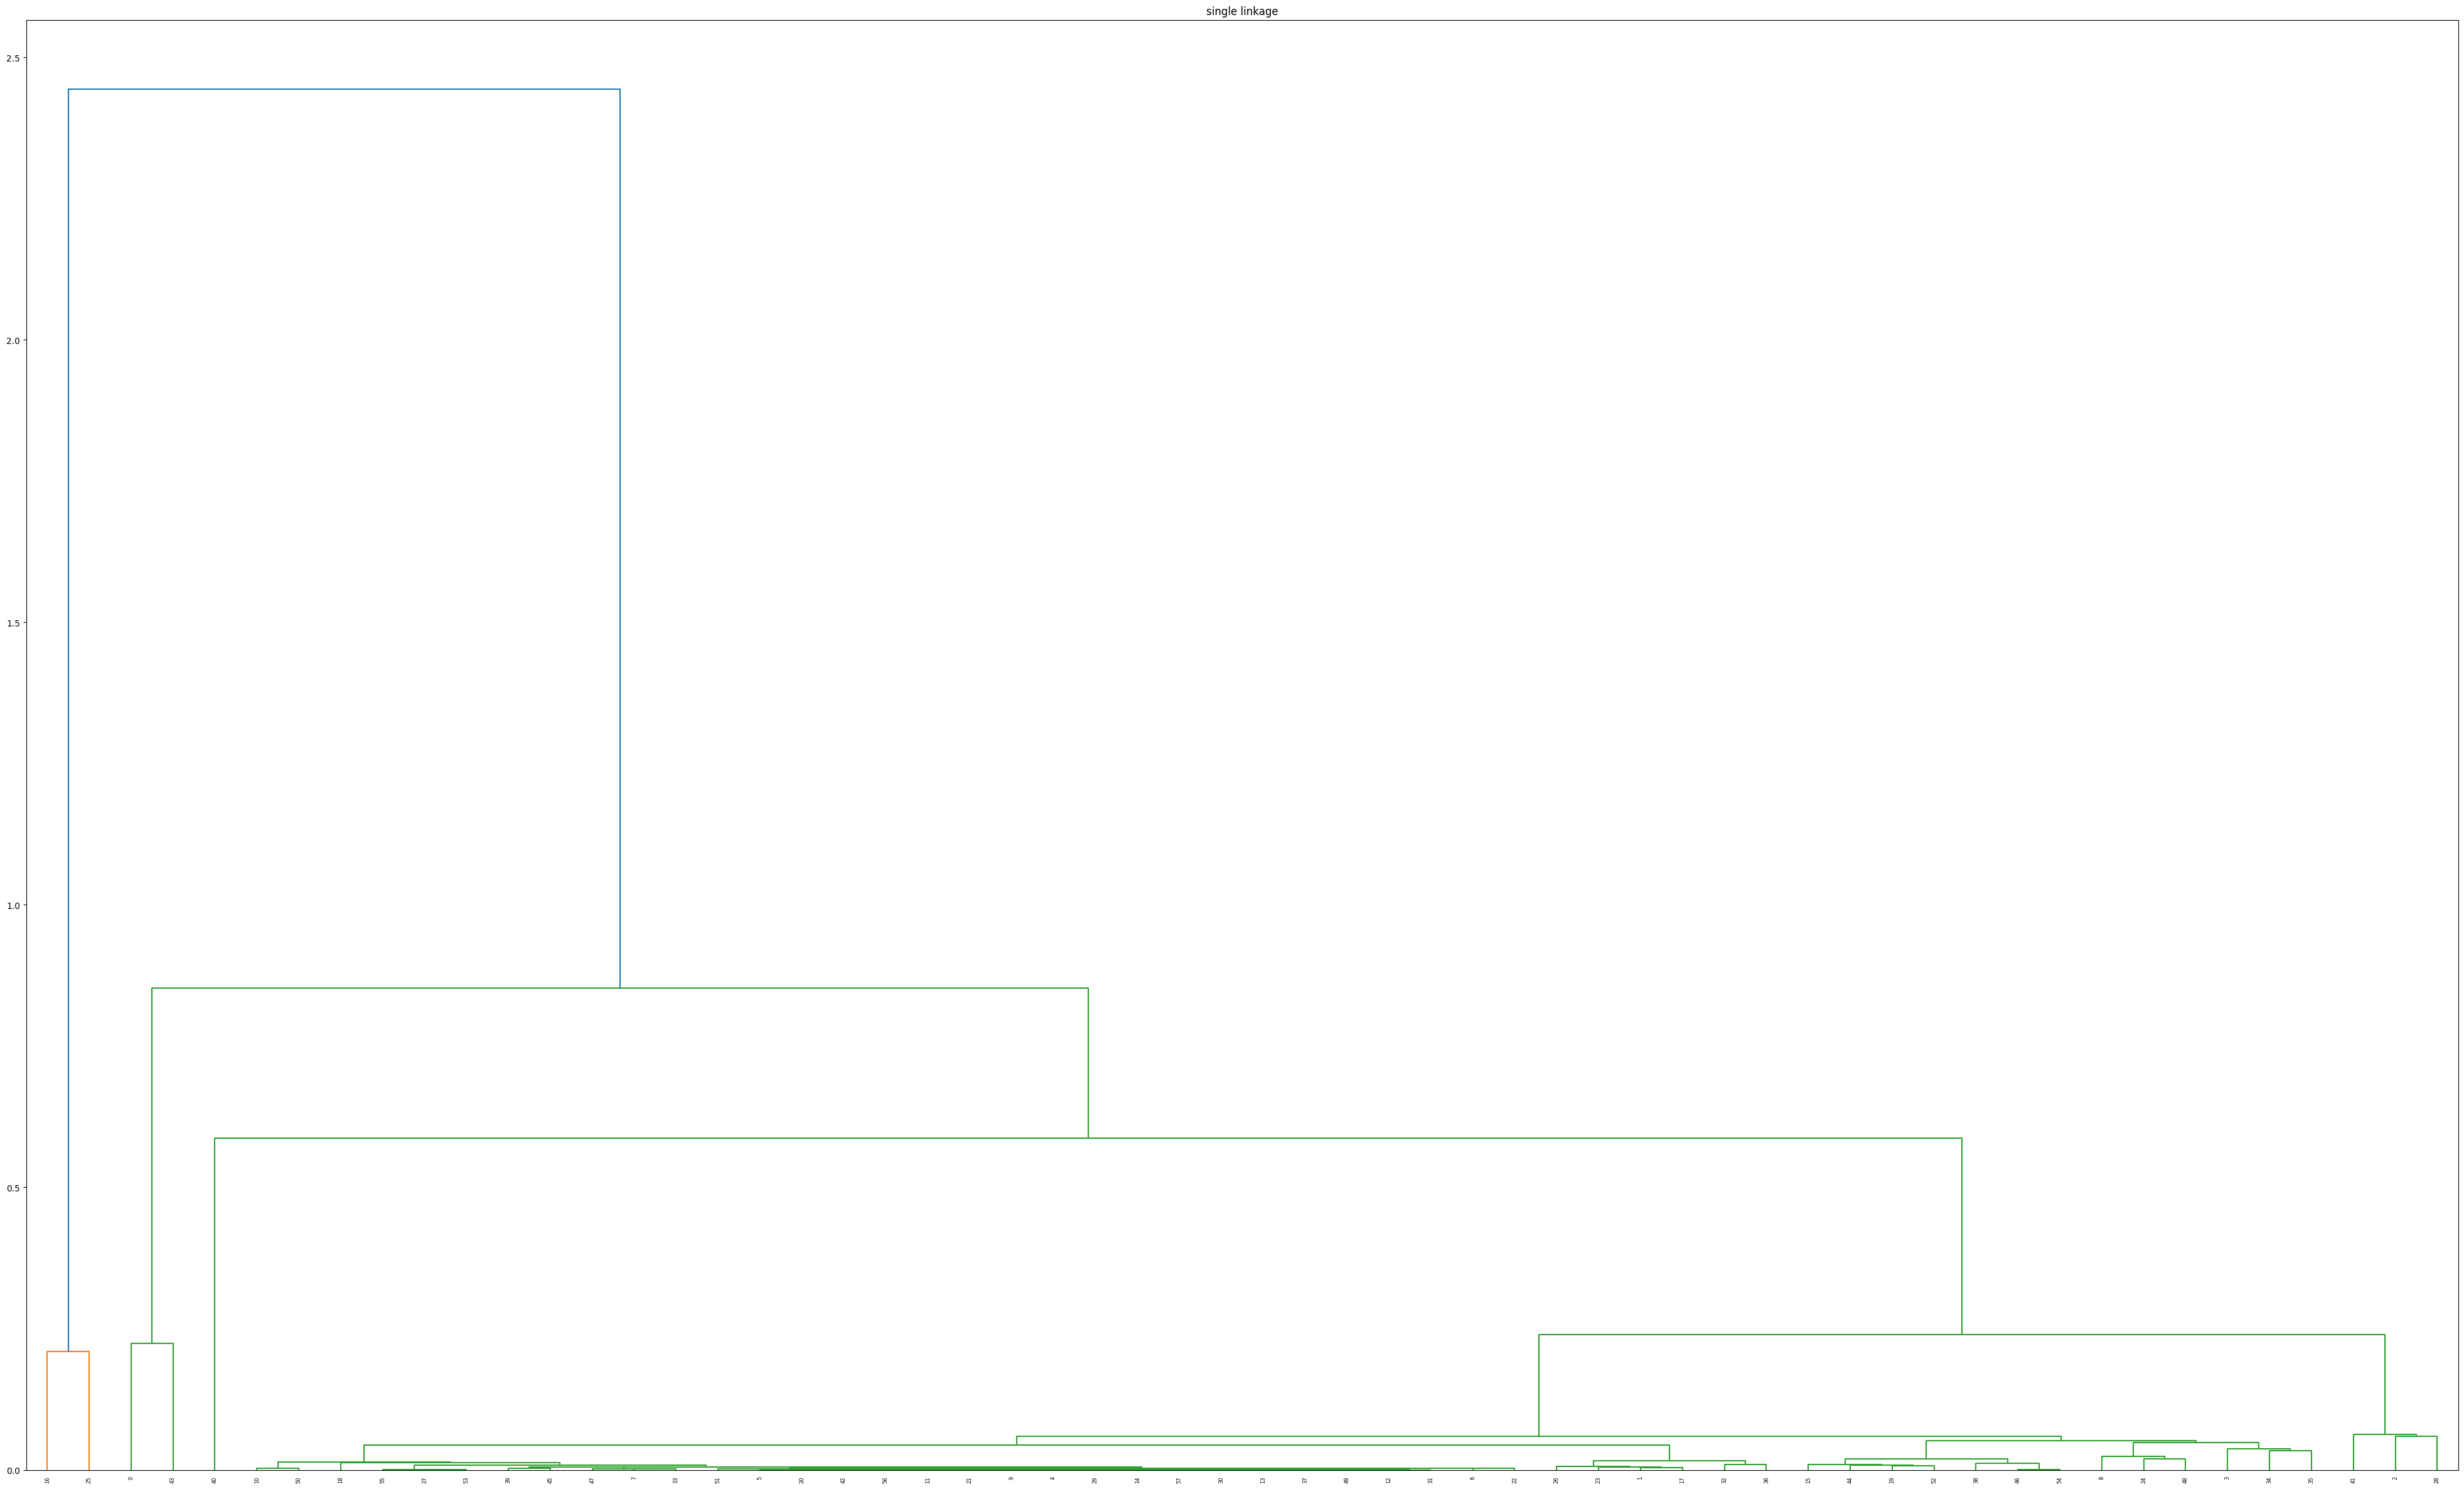

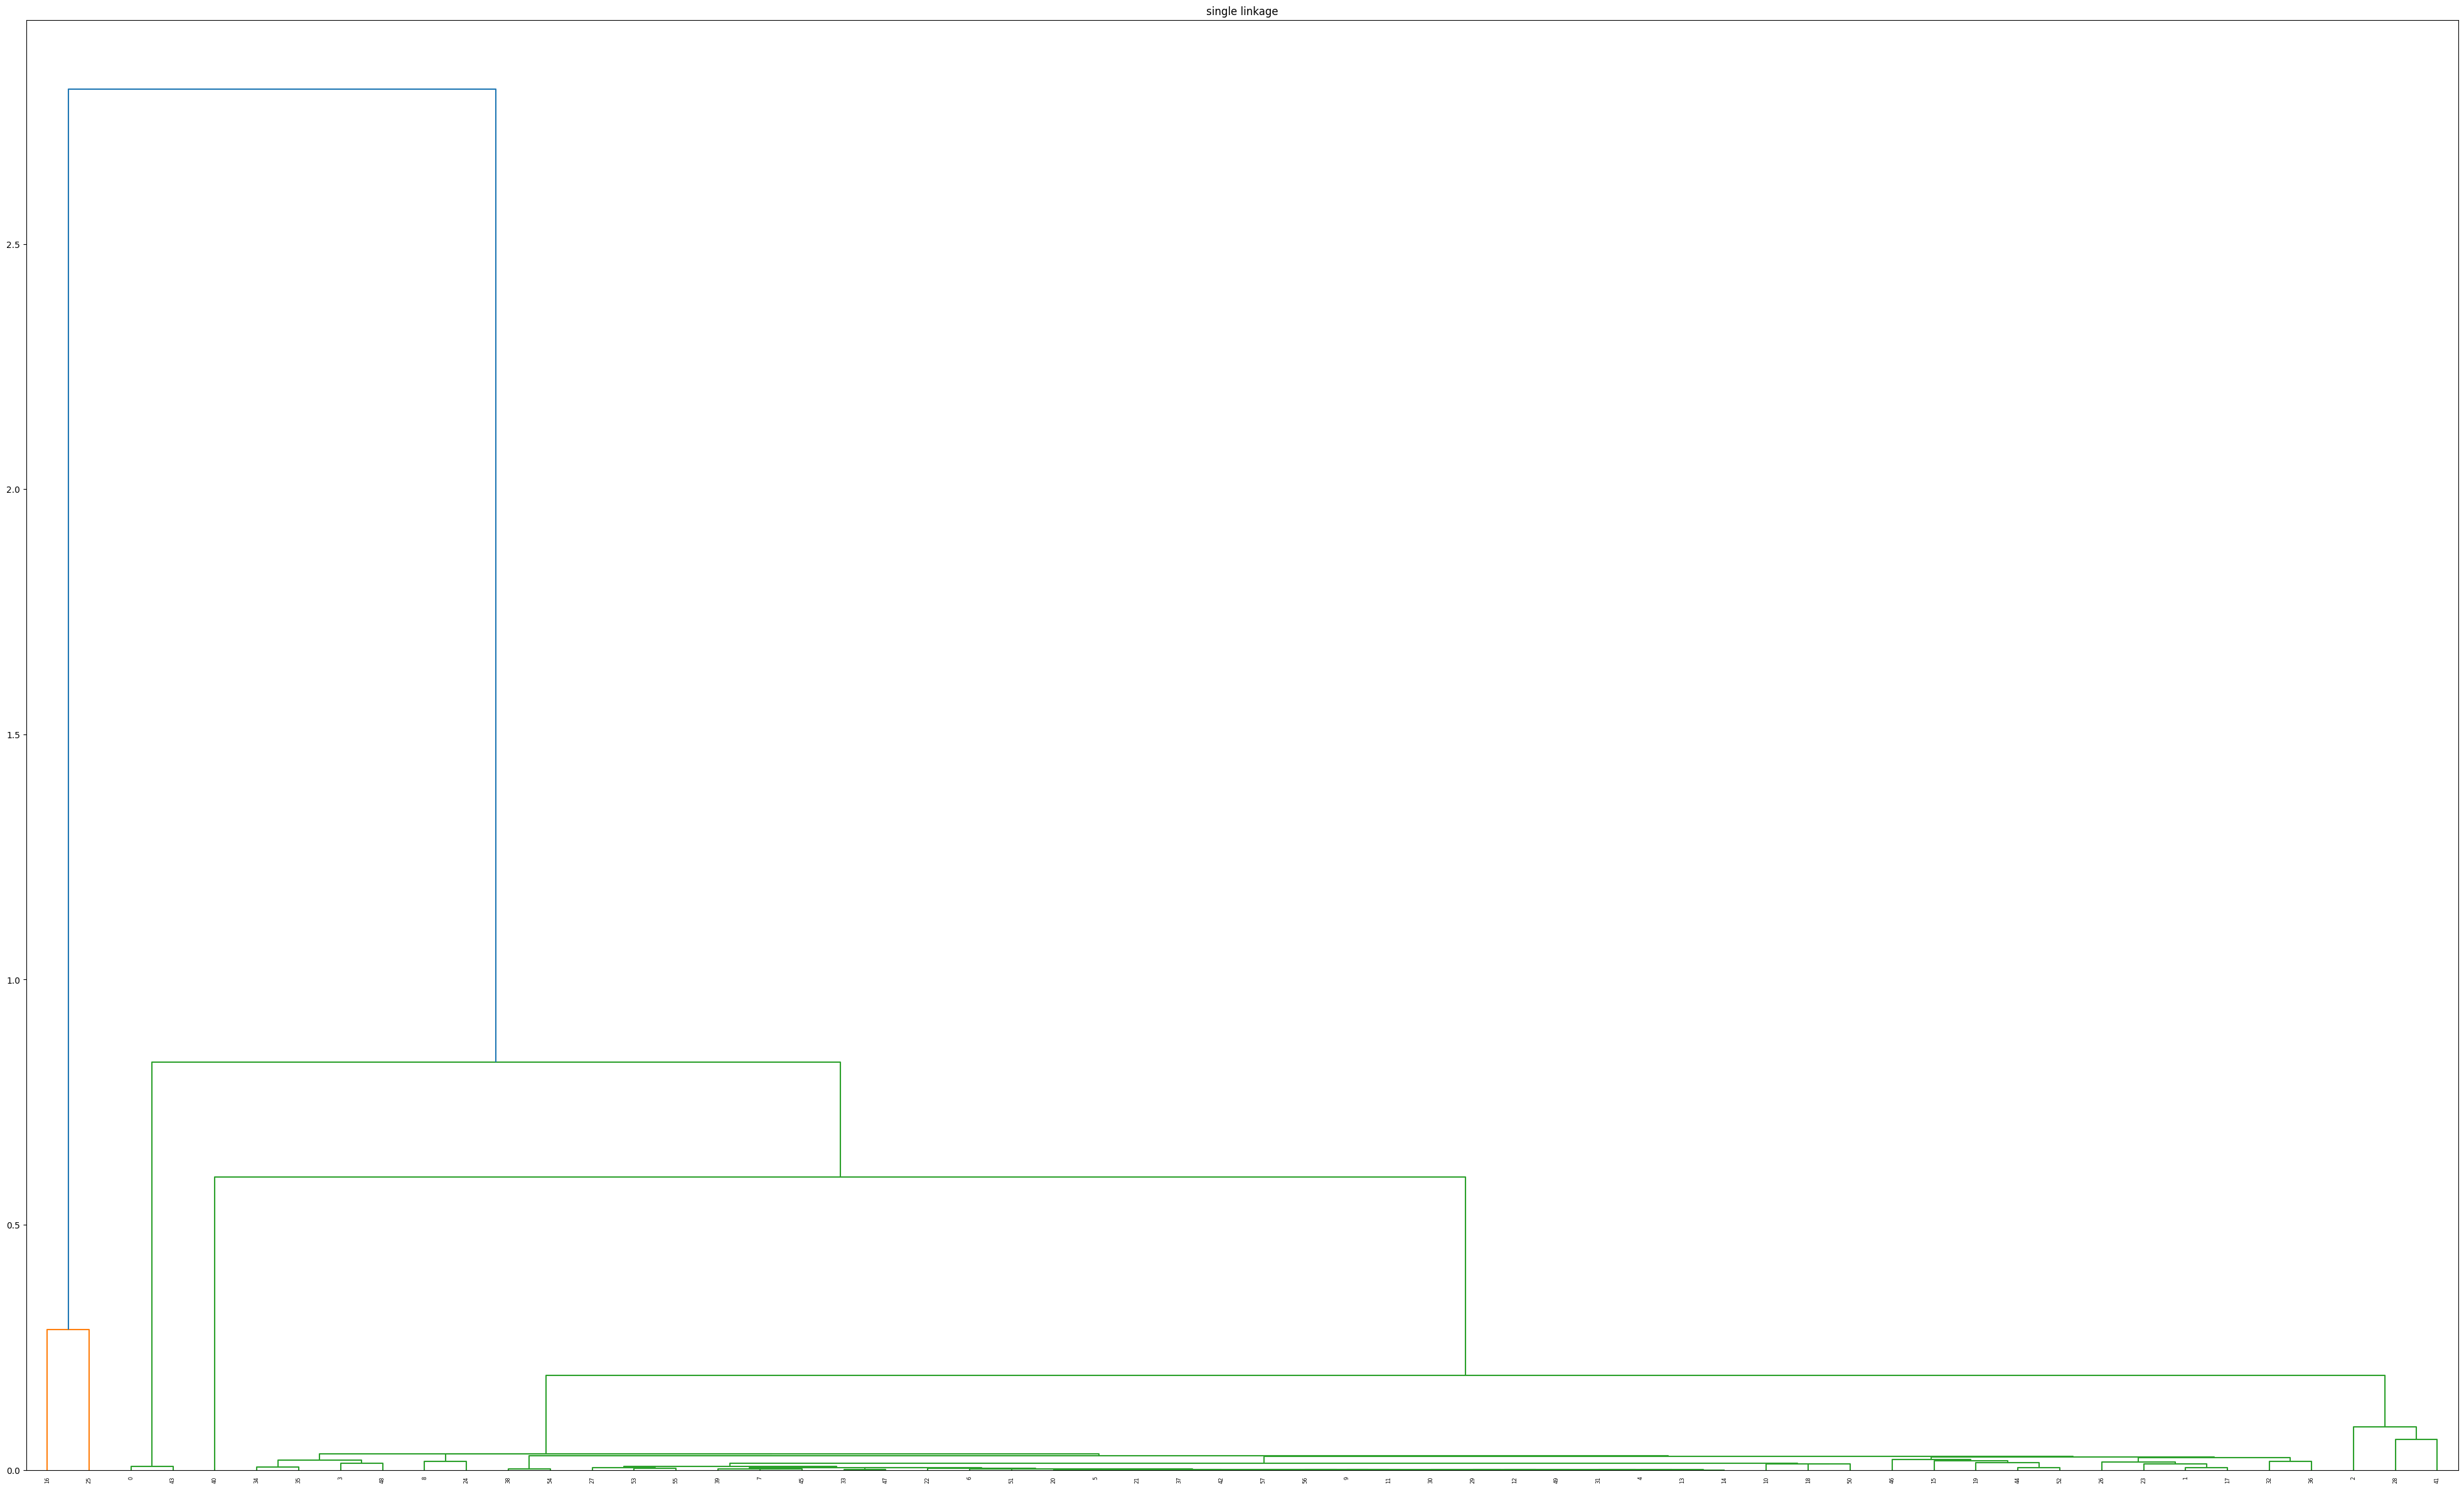

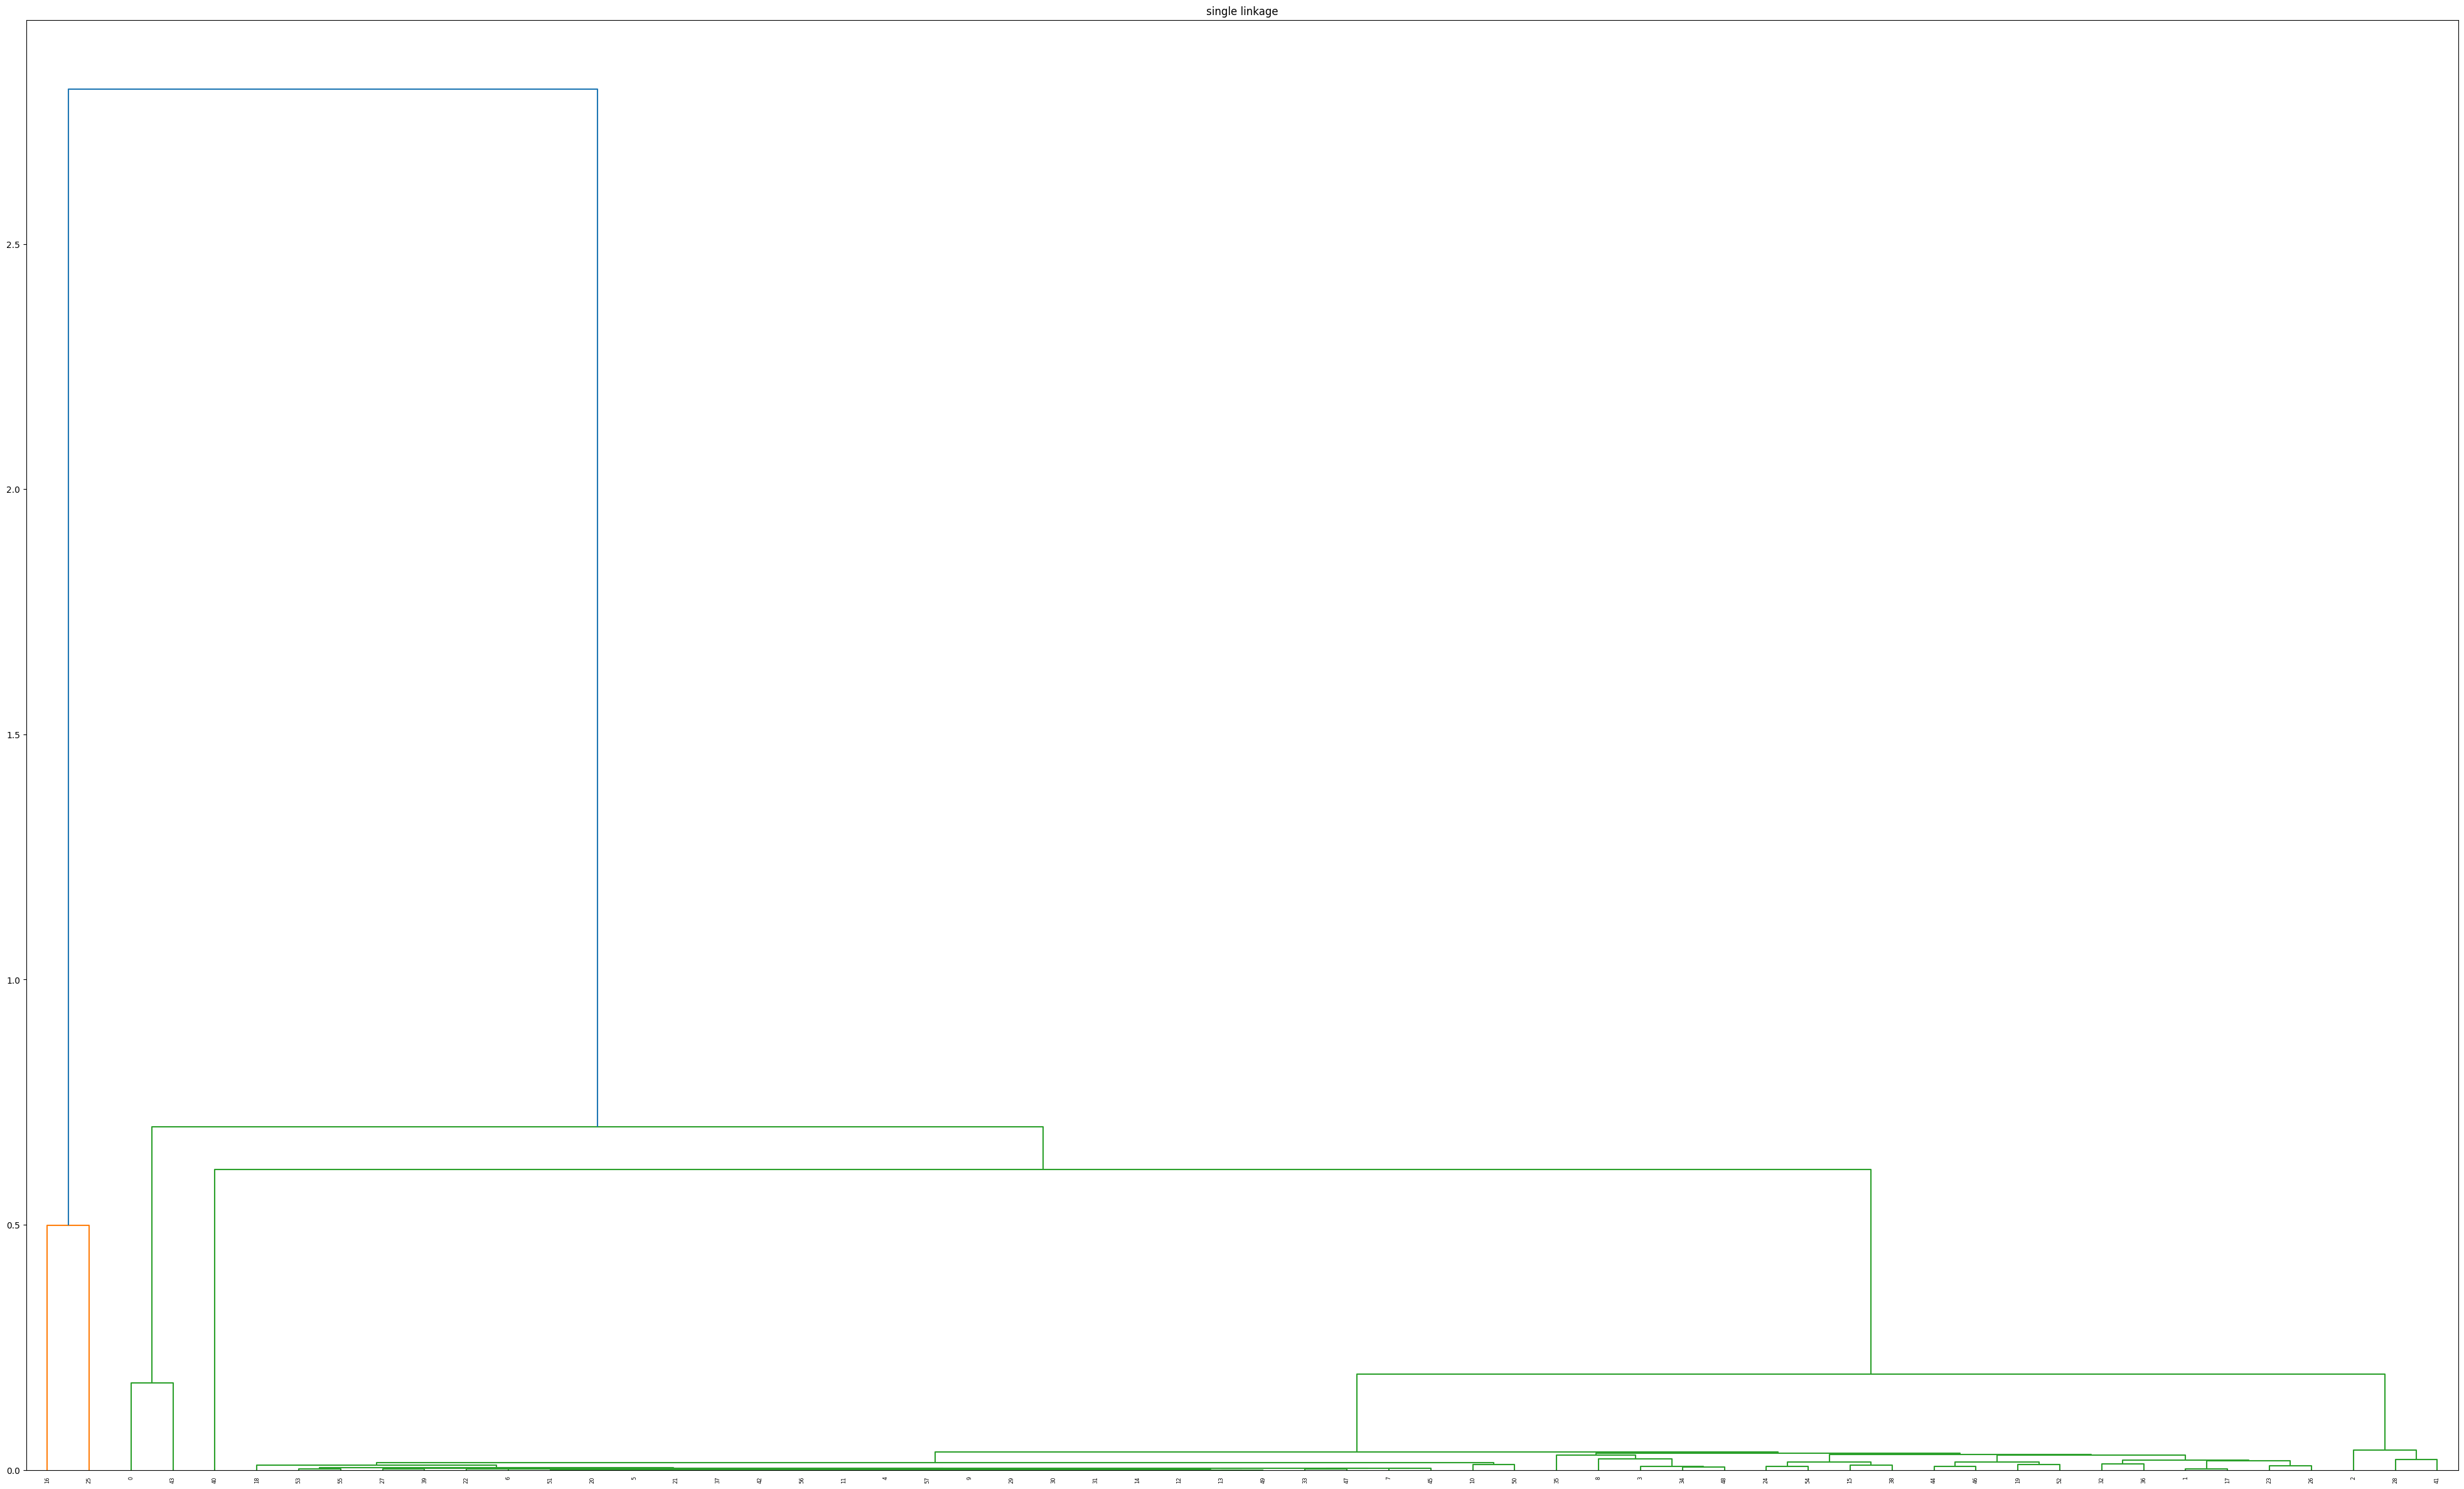

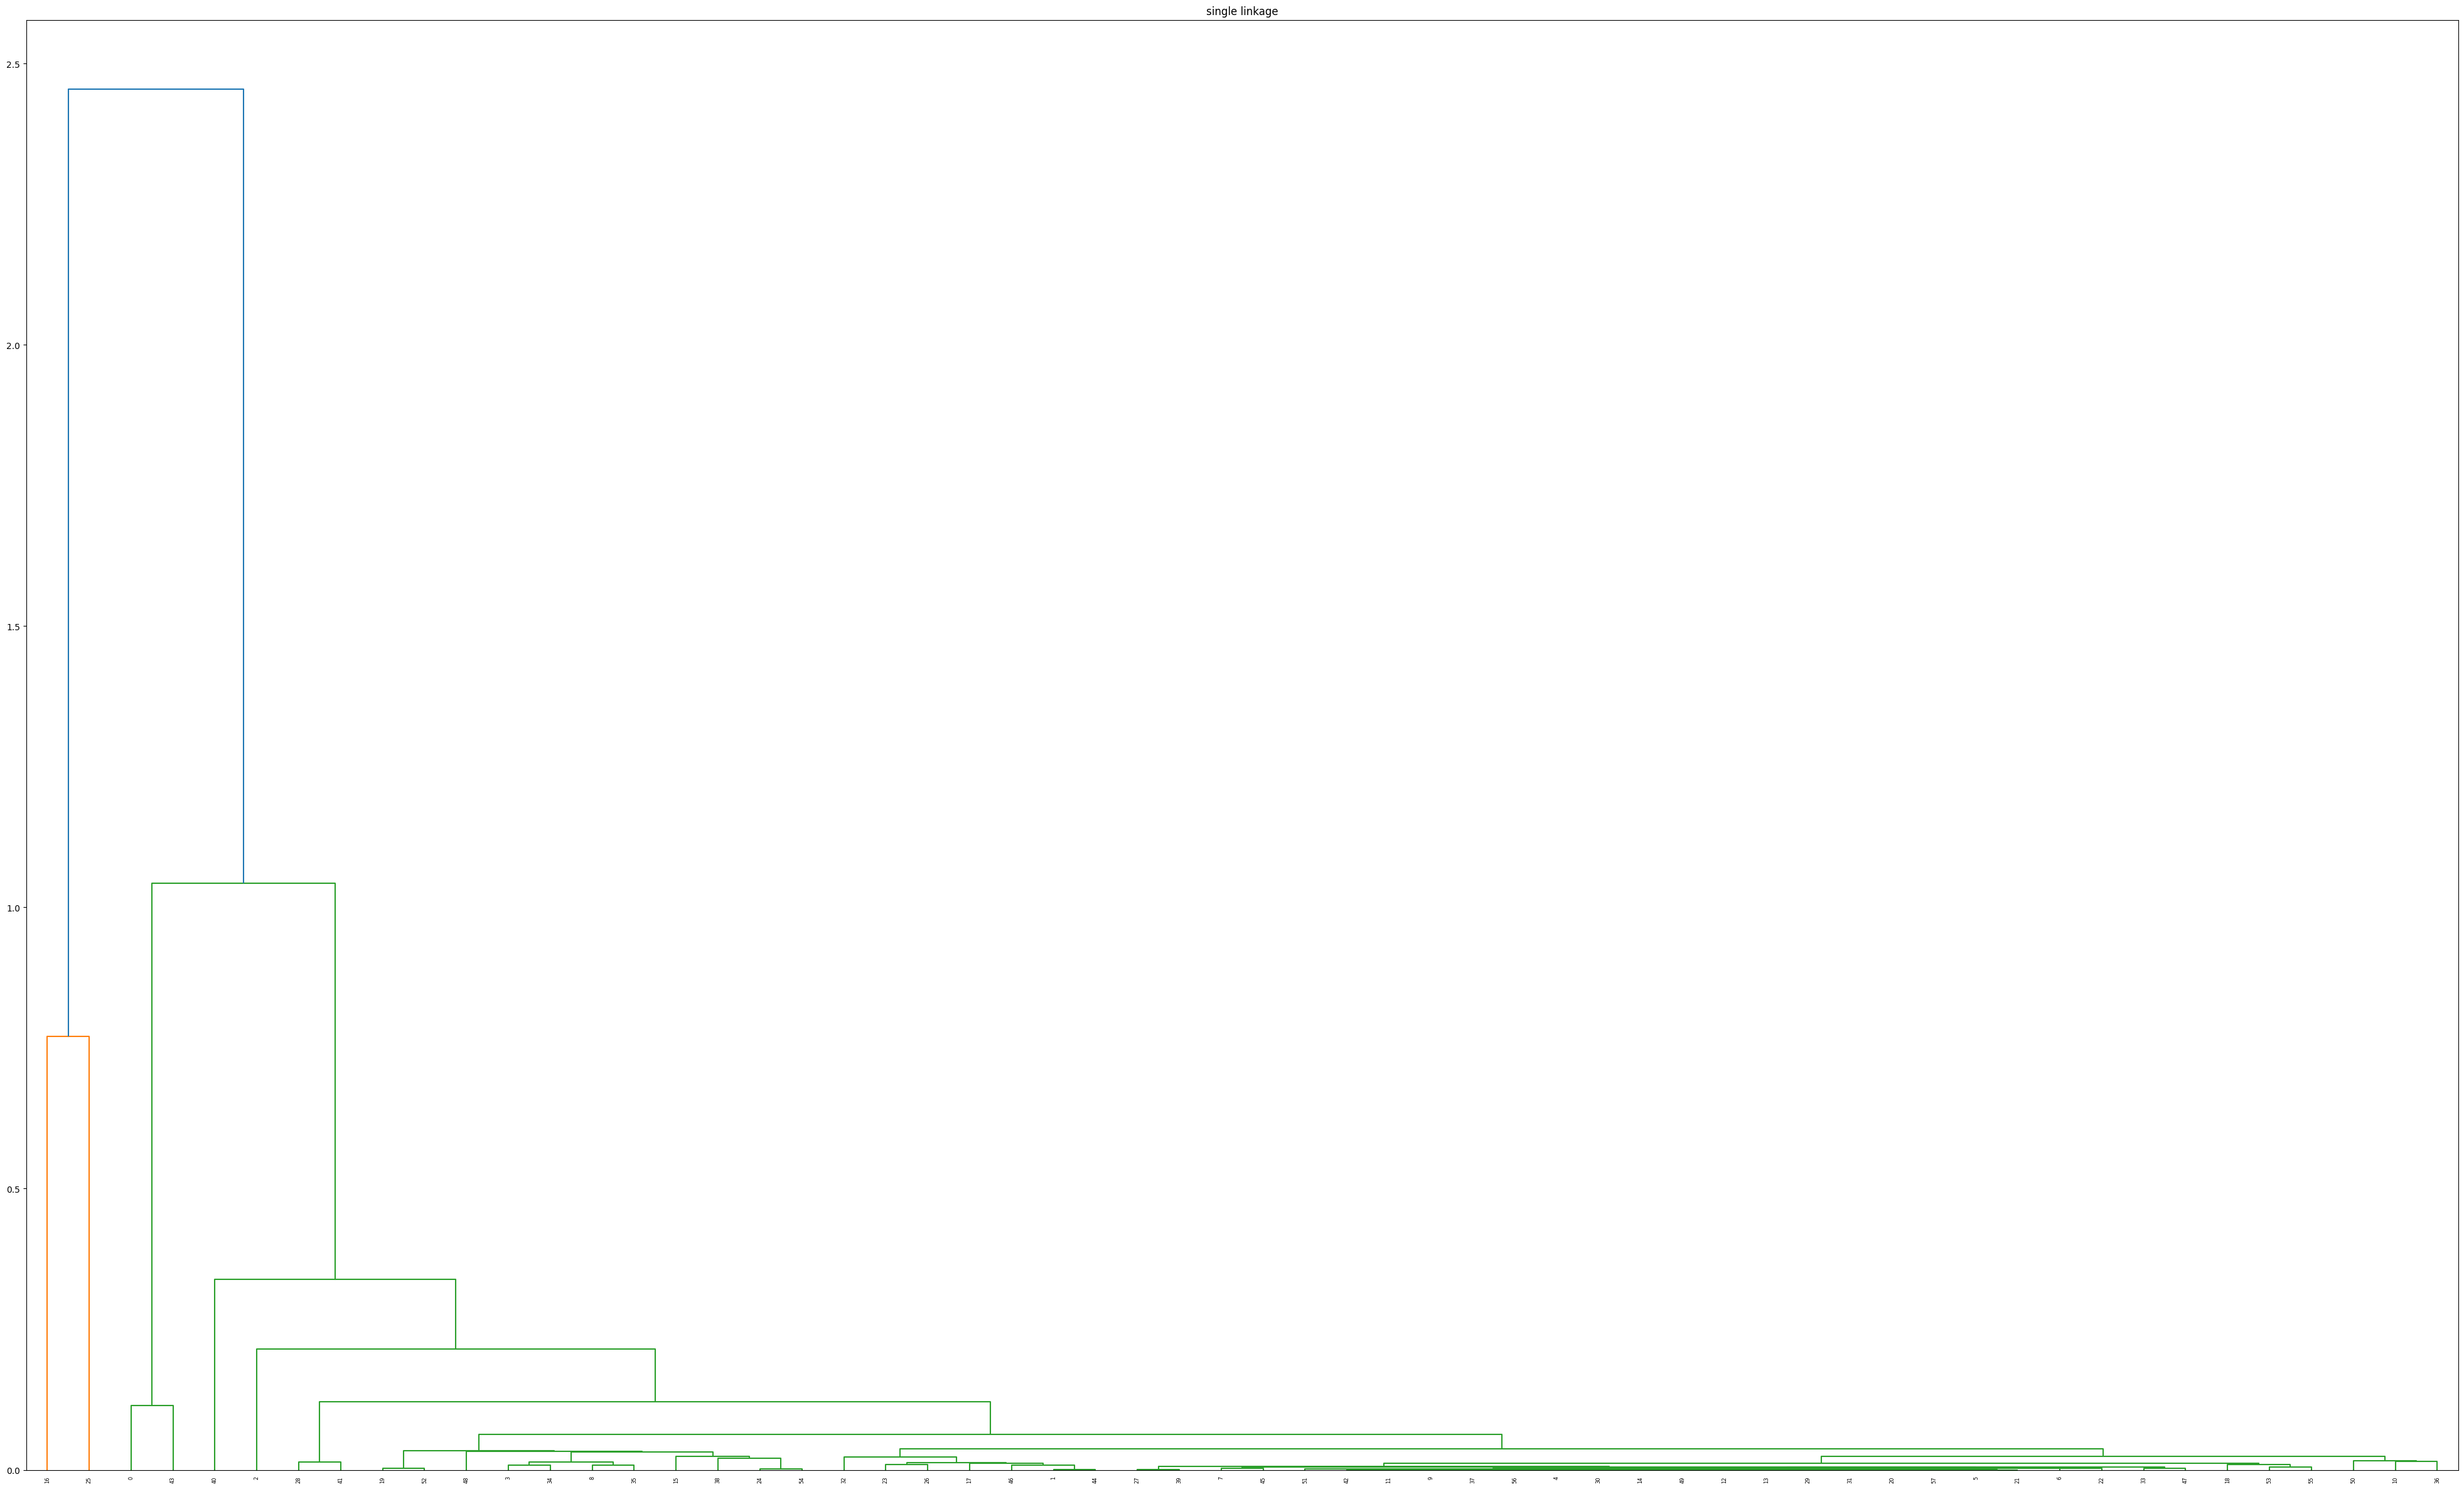

In [34]:
for i in range(dataset.shape[1]):
    hc = HC(dataset[:, [i]])
    hc.fit('single', 'euclidean')

- Single Linkage:
  - Forms clusters by grouping together the closest data points.
  - Results in dendrograms with short branches and a high cluster count, indicating strong similarity within clusters.

- Complete Linkage:
  - Creates clusters by pairing the farthest-apart data points.
  - Leads to dendrograms with long branches and many clusters, implying close relationships among cluster members.

- Average Linkage:
  - Computes the average similarity between all pairs of data points in two clusters before merging.
  - Results in dendrograms with branches of uniform length and a large number of clusters, suggesting high similarity among cluster members.

- Ward's Linkage:
  - Aims to minimize variance in distances within clusters.
  - Dendrograms exhibit a gradual increase in distance as clusters merge, often resulting in well-balanced clusters with similar sizes.

- Centroid Linkage:
  - Combines clusters by calculating the distance between their centroids, which are the average points of the data within each cluster. 
  - It then merges the clusters with the centroids that are closest to each other.

- The clusters in all four plots look nearly identical, with distinguishable long branches. This suggests that the data points are not tightly connected, have substantial variability, and may contain outliers.